In [1]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=405bb4823623761529445d81130d77a99f097254f7744fcf2ed2ca90f3031844
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [2]:
#data
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
urllist = ['https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/art_blocks_art.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/axie_infinity_game.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/bored_ape_yacht_club_collection.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/creepz_game.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/crypto_punk_collection.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/decentraland_metaverse.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/superrare_art.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/the_sandbox_metaverse.csv']
urllist2 = ['https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/external_data/ETH_price.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/external_data/NASDAQ.csv','https://raw.githubusercontent.com/qwqw3535/CS370_Machine_Learning/main/refined_data_daily/external_data/csv_usd_index.csv']
urllist_name = ['art_blocks_art','axie_infinity_game','bored_ape_yacht_club_collection','creepz_game','crypto_punk_collection','decentraland_metaverse','superrare_art','the_sandbox_metaverse']
original_dataset = []
dataset_name = ['art_blocks_art']
for i in range(len(urllist)):
  original_dataset.append(pd.read_csv(urllist[i],index_col=0))

ETH = pd.read_csv(urllist2[0],index_col=0)
NASDAQ = pd.read_csv(urllist2[1],index_col=0)
USD = pd.read_csv(urllist2[2],index_col=0)

ETH = ETH[['close']]
NASDAQ = NASDAQ[['close']]
USD = USD[['close']]
NASDAQ['close'] = NASDAQ['close'].str.replace(',', '').astype(float)
n = len(urllist)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [3]:
for i in range(n):
  print(original_dataset[i].head())
# # print(original_dataset[0].info())

            Number of sales  Average USD  Sales USD  Active market wallets  \
DateTime                                                                     
2020-11-27           1577.0        32.21   50793.59                  111.0   
2020-11-28            923.0        23.80   21966.60                  184.0   
2020-11-29            324.0        25.57    8285.57                   74.0   
2020-11-30             63.0        39.63    2496.48                   22.0   
2020-12-01             80.0        26.13    2090.09                   20.0   

            Unique buyers  
DateTime                   
2020-11-27          110.0  
2020-11-28          180.0  
2020-11-29           72.0  
2020-11-30           17.0  
2020-12-01           17.0  
            Number of sales  Average USD  Sales USD  Active market wallets  \
DateTime                                                                     
2018-02-15              0.0          0.0        0.0                    0.0   
2018-02-16             

In [4]:
cnt = 0;
for i in range(n):
  df = original_dataset[i]
  cnt = 0
  for j in range(len(original_dataset[i])):
    if (df.iloc[j, 0]==0) and (df.iloc[j, 1]==0) and (df.iloc[j,2]==0) and (df.iloc[j,3]==0) and (df.iloc[j,4]==0):
      cnt = cnt+1
    else:
      break
  original_dataset[i] = original_dataset[i].iloc[cnt:]

In [5]:
ETH.rename(columns = {'close' : 'ETH'}, inplace = True)
NASDAQ.rename(columns = {'close' : 'NASDAQ'}, inplace = True)
USD.rename(columns = {'close' : 'USD'},inplace = True)
new_index = ETH.index.to_series().str.split(" ").str[0]
ETH.set_index(new_index, inplace = True)
print(ETH.head())
print(NASDAQ.head())
print(USD.head() )


              ETH
date             
2017-01-01   8.18
2017-01-02   8.36
2017-01-03   9.69
2017-01-04  10.98
2017-01-05  10.28
             NASDAQ
2017-01-01  5429.08
2017-01-02  5429.08
2017-01-03  5429.08
2017-01-04  5477.01
2017-01-05  5487.94
               USD
2017-01-01  102.83
2017-01-02  102.83
2017-01-03  103.21
2017-01-04  102.70
2017-01-05  101.52


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
extended_dataset = []
for i in range(n):
  extended_dataset.append(original_dataset[i].copy())
  extended_dataset[i]=extended_dataset[i].join(ETH, how='inner')
  extended_dataset[i]=extended_dataset[i].join(NASDAQ, how='inner')
  extended_dataset[i]=extended_dataset[i].join(USD, how='inner')
print(extended_dataset[0].head())

            Number of sales  Average USD  Sales USD  Active market wallets  \
2020-11-27           1577.0        32.21   50793.59                  111.0   
2020-11-28            923.0        23.80   21966.60                  184.0   
2020-11-29            324.0        25.57    8285.57                   74.0   
2020-11-30             63.0        39.63    2496.48                   22.0   
2020-12-01             80.0        26.13    2090.09                   20.0   

            Unique buyers     ETH    NASDAQ    USD  
2020-11-27          110.0  519.07  12205.85  91.79  
2020-11-28          180.0  538.11  12205.85  91.79  
2020-11-29           72.0  576.76  12205.85  91.79  
2020-11-30           17.0  617.00  12198.74  91.87  
2020-12-01           17.0  586.03  12355.11  91.31  


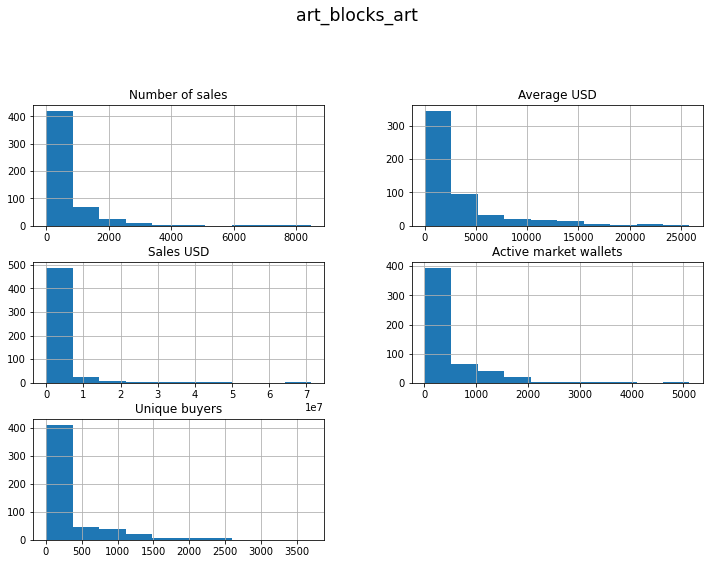

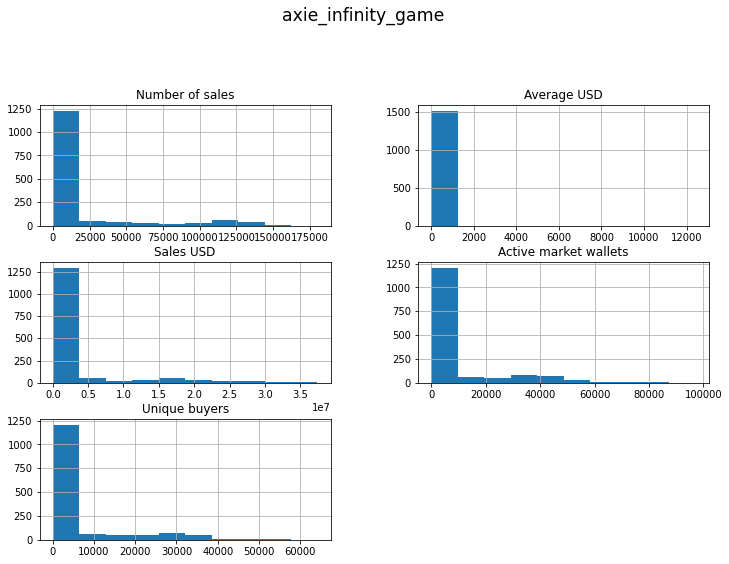

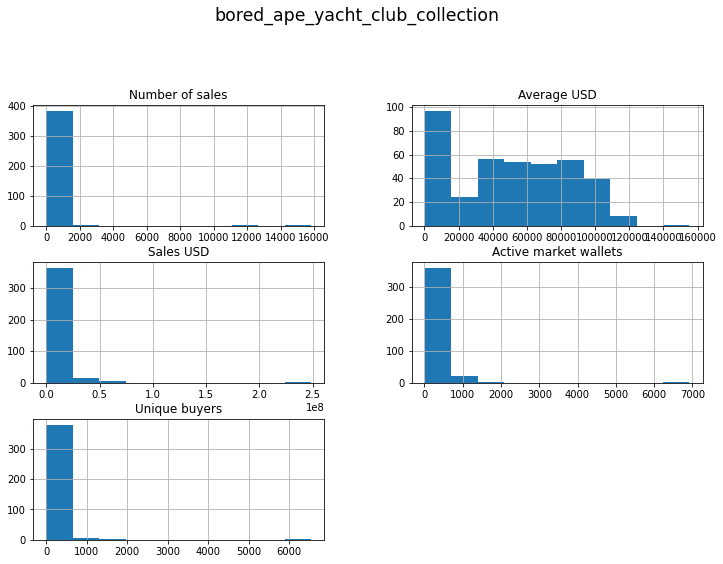

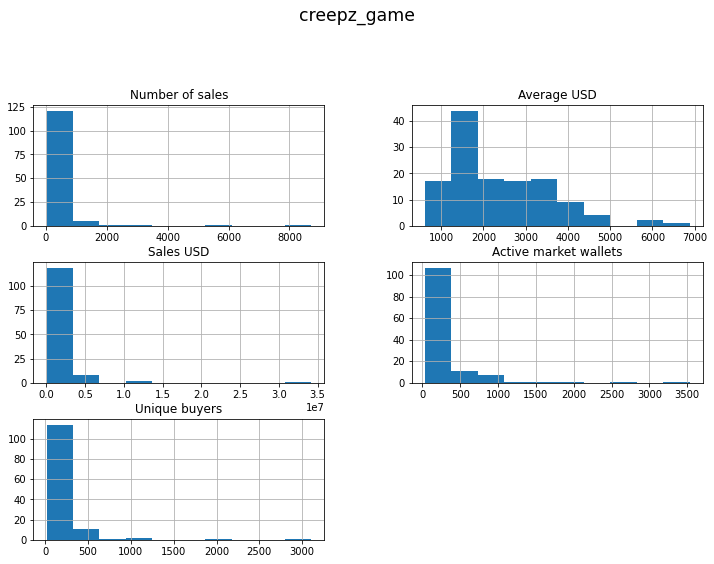

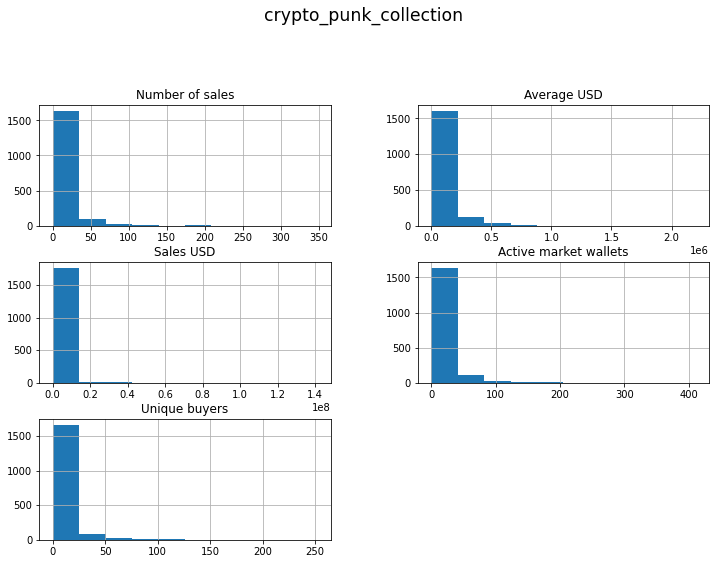

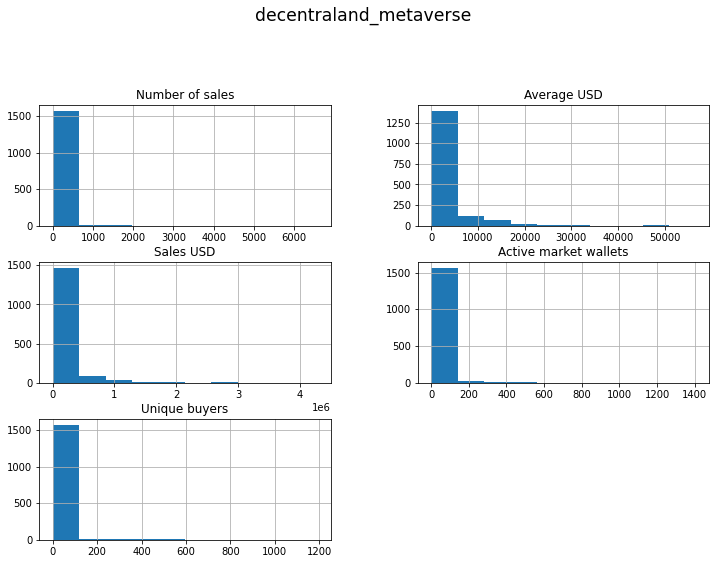

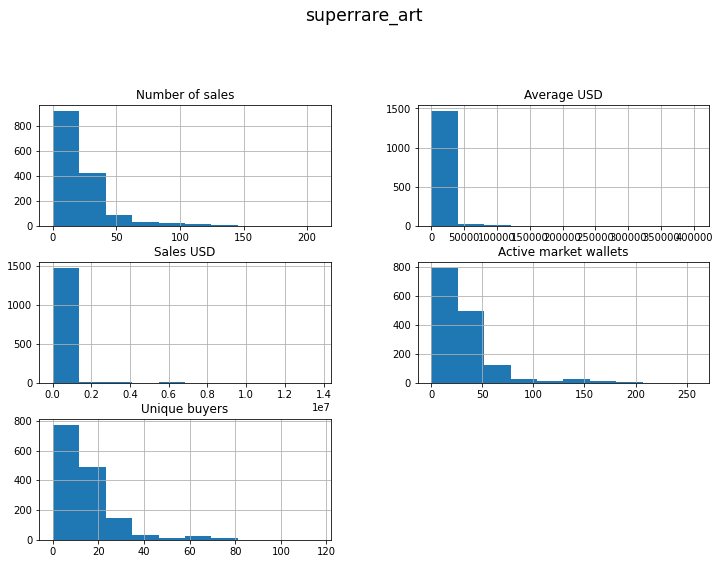

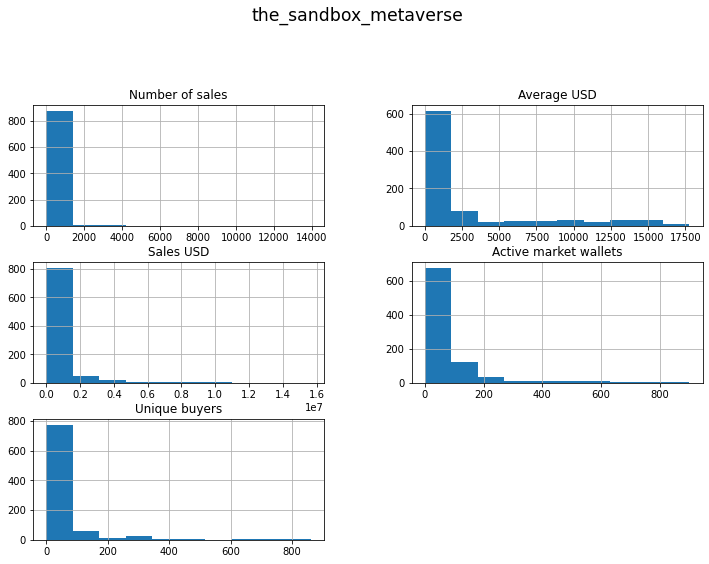

In [7]:

for i in range(n):  
  original_dataset[i].hist(bins = 10, figsize = (12,8))
  plt.suptitle(urllist_name[i], x=0.5, y=1.05, ha='center', fontsize='xx-large')



In [8]:
std_original_dataset = []
minmax_original_dataset = []
std_scaler_list = []
minmax_scaler_list = []
for i in range(n):
  scaler = StandardScaler()
  minmaxscaler = MinMaxScaler()
  std = scaler.fit_transform(original_dataset[i])
  minmax = minmaxscaler.fit_transform(original_dataset[i])
  std_original_dataset.append(pd.DataFrame(std,columns=original_dataset[i].columns,index=list(original_dataset[i].index.values)))
  minmax_original_dataset.append(pd.DataFrame(minmax,columns=original_dataset[i].columns,index=list(original_dataset[i].index.values)))
  std_scaler_list.append(scaler)
  minmax_scaler_list.append(minmaxscaler)

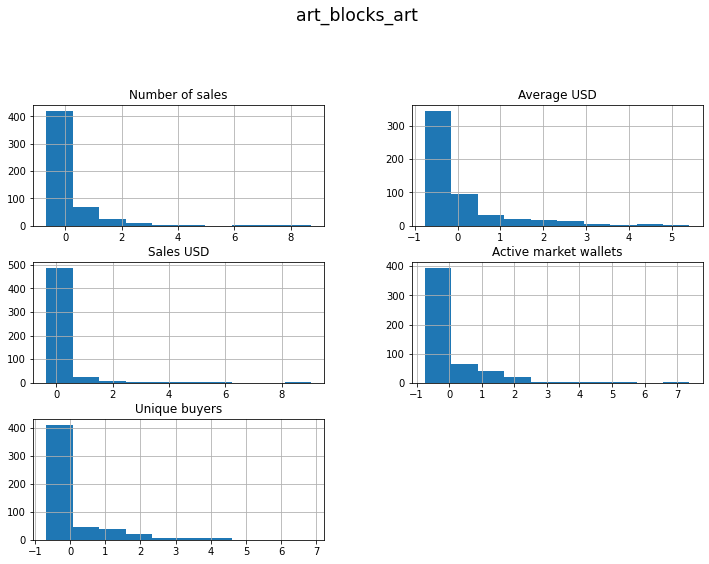

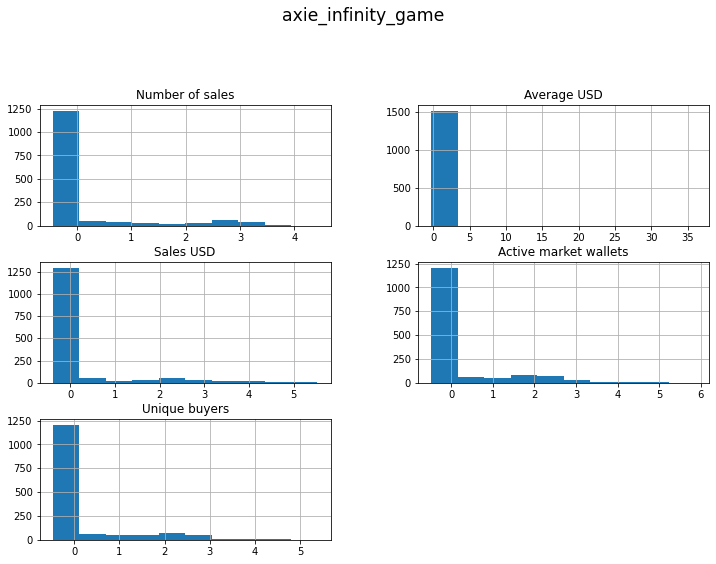

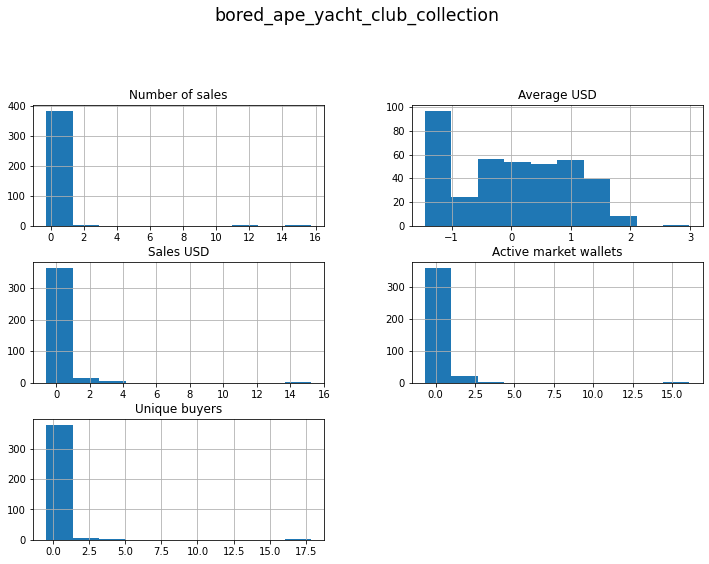

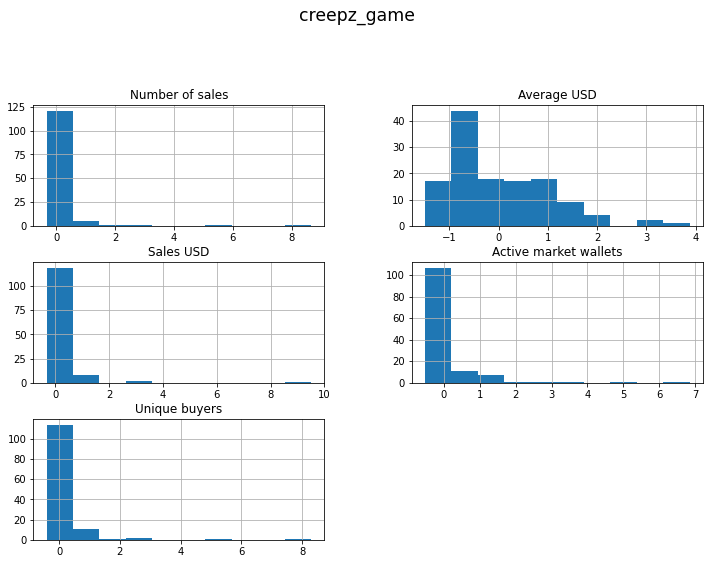

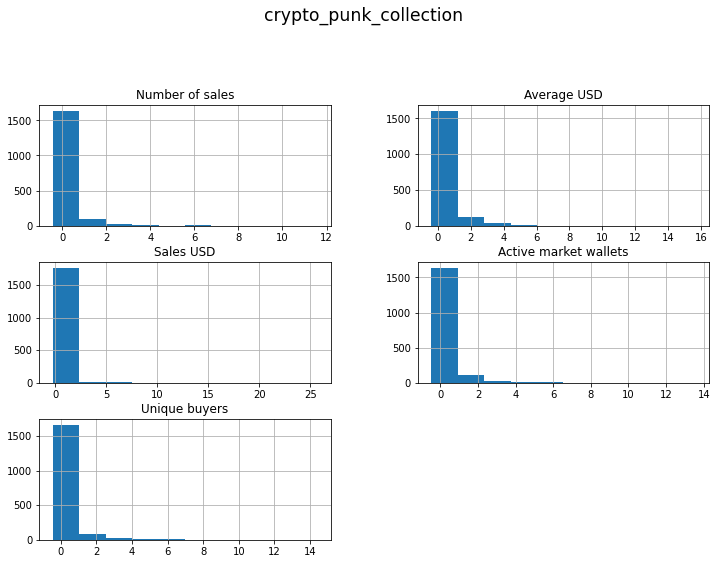

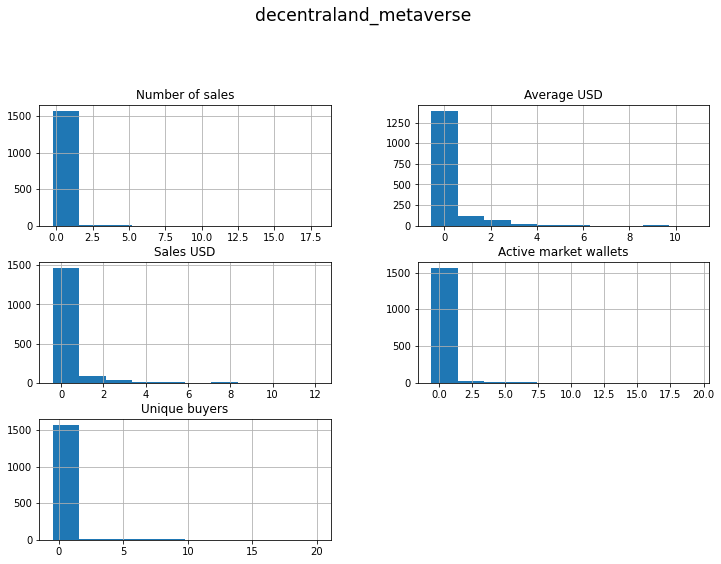

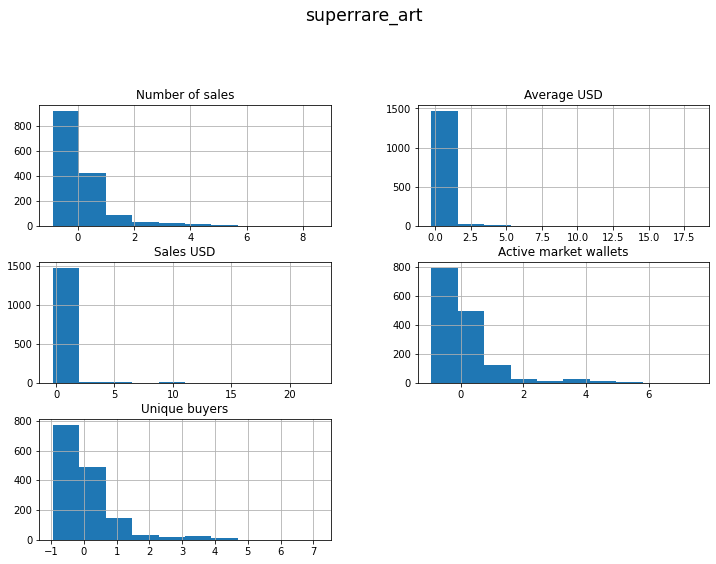

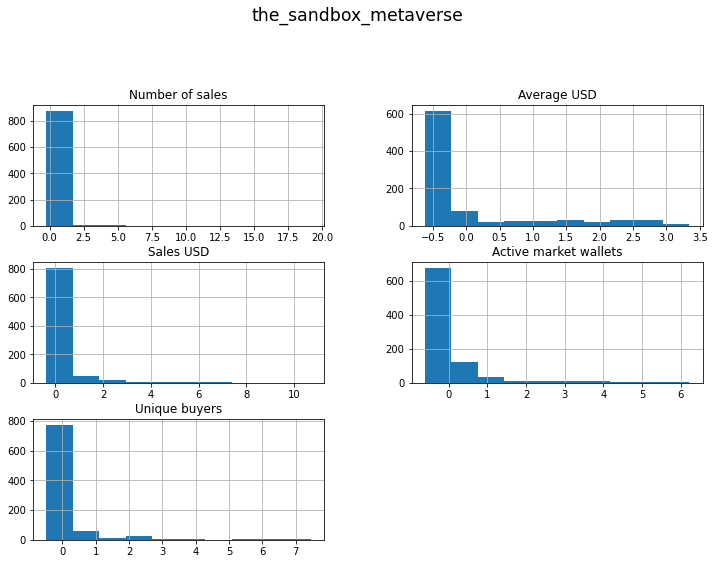

In [9]:
for i in range(n):
  std_original_dataset[i].hist(bins = 10, figsize = (12,8))
  plt.suptitle(urllist_name[i], x=0.5, y=1.05, ha='center', fontsize='xx-large')

In [10]:

X_train = []
Y_train = []
X_test = []
Y_test = []
#std
std_X_train = []
std_Y_train = []
std_X_test = []
std_Y_test = []
#minmax
minmax_X_train = []
minmax_Y_train = []
minmax_X_test = []
minmax_Y_test = []
for i in range(n):
  # train_x, test_x,train_y,test_y = train_test_split(original_dataset[i].drop(columns = ['Average USD']),original_dataset[i][['Average USD']],test_size=0.2,random_state=42)
  train_x, test_x,train_y,test_y = train_test_split(original_dataset[i].drop(columns = ['Average USD']),original_dataset[i][['Average USD']],test_size=0.25, shuffle=False) #순서대로 
  X_train.append(train_x.sort_index())
  Y_train.append(train_y.sort_index())
  X_test.append(test_x.sort_index())
  Y_test.append(test_y.sort_index())
  std_train_x, std_test_x,std_train_y,std_test_y = train_test_split(std_original_dataset[i].drop(columns = ['Average USD']),std_original_dataset[i][['Average USD']],test_size=0.25, shuffle=False) #순서대로 
  # std_train_x, std_test_x,std_train_y,std_test_y = train_test_split(std_original_dataset[i].drop(columns = ['Average USD']),std_original_dataset[i][['Average USD']],test_size=0.25, random_state=42) #순서대로 

  std_X_train.append(std_train_x.sort_index())
  std_Y_train.append(std_train_y.sort_index())
  std_X_test.append(std_test_x.sort_index())
  std_Y_test.append(std_test_y.sort_index())
  minmax_train_x, minmax_test_x,minmax_train_y,minmax_test_y = train_test_split(minmax_original_dataset[i].drop(columns = ['Average USD']),minmax_original_dataset[i][['Average USD']],test_size=0.25, shuffle=False) #순서대로 
  # minmax_train_x, minmax_test_x,minmax_train_y,minmax_test_y = train_test_split(minmax_original_dataset[i].drop(columns = ['Average USD']),minmax_original_dataset[i][['Average USD']],test_size=0.2, random_state=42) #순서대로 
  minmax_X_train.append(minmax_train_x.sort_index())
  minmax_Y_train.append(minmax_train_y.sort_index())
  minmax_X_test.append(minmax_test_x.sort_index())
  minmax_Y_test.append(minmax_test_y.sort_index())
  

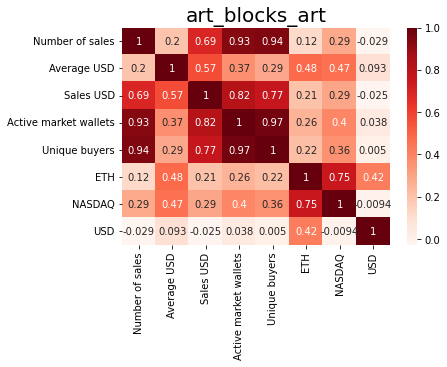

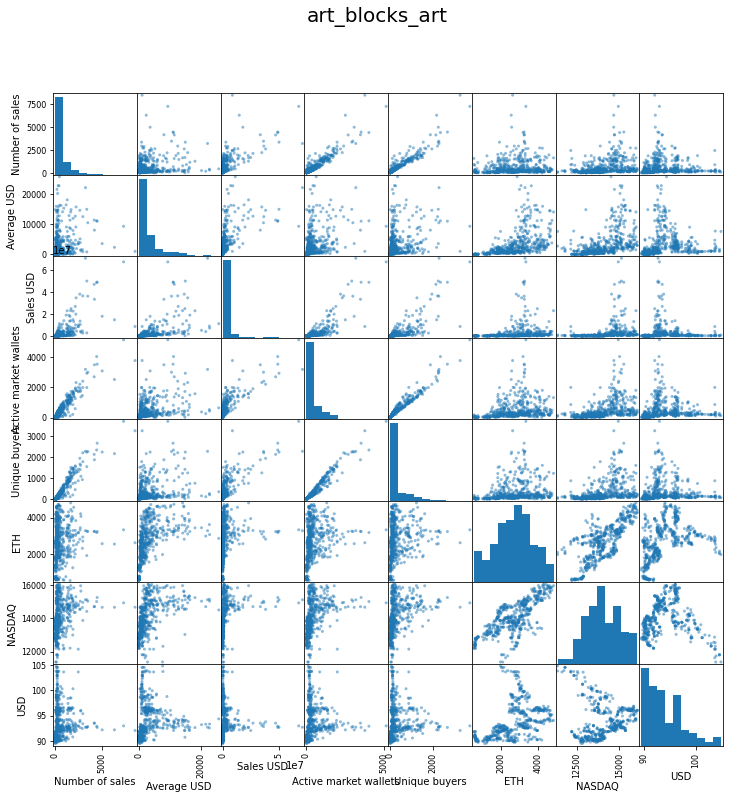

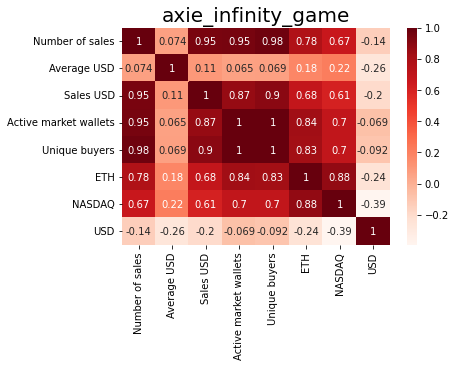

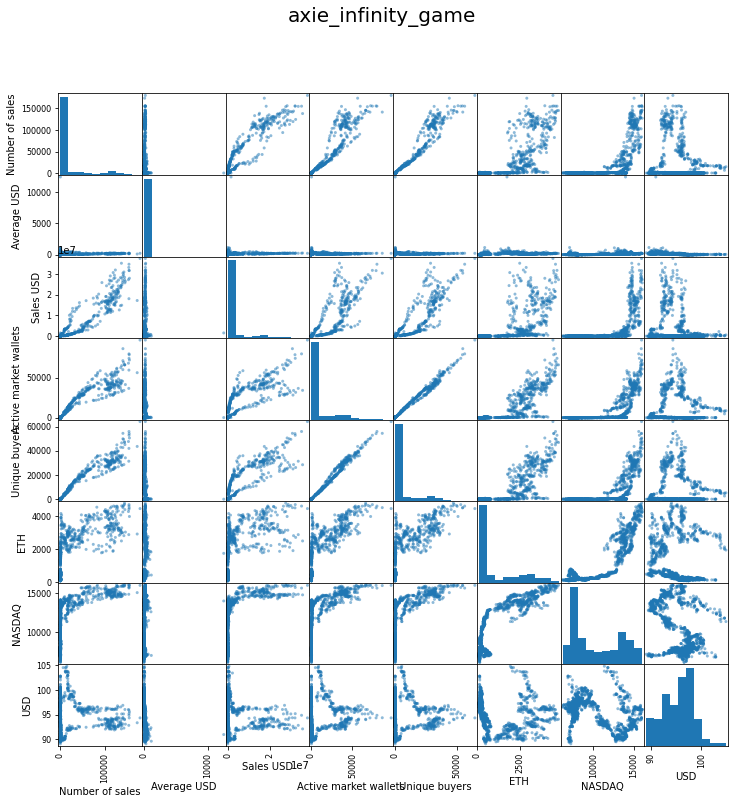

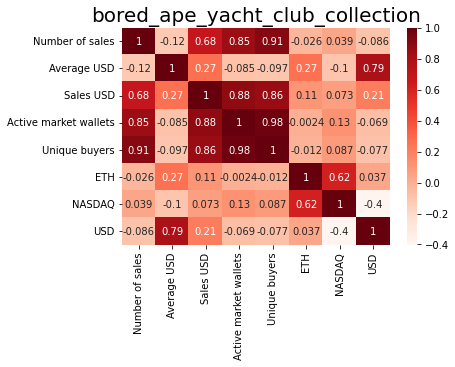

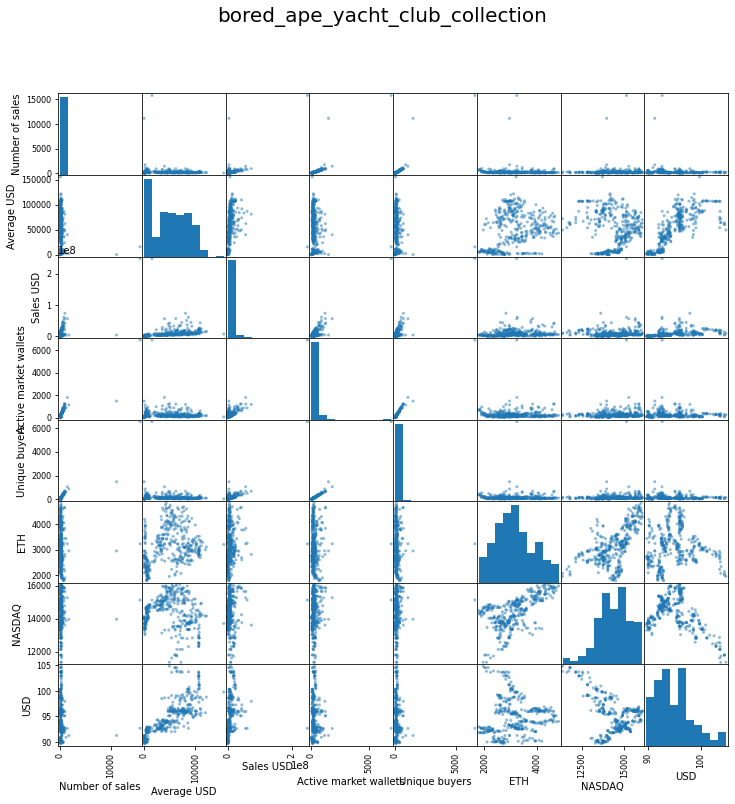

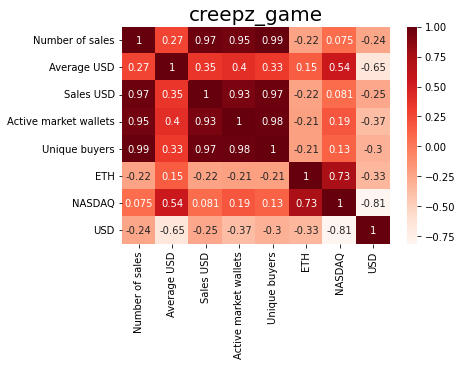

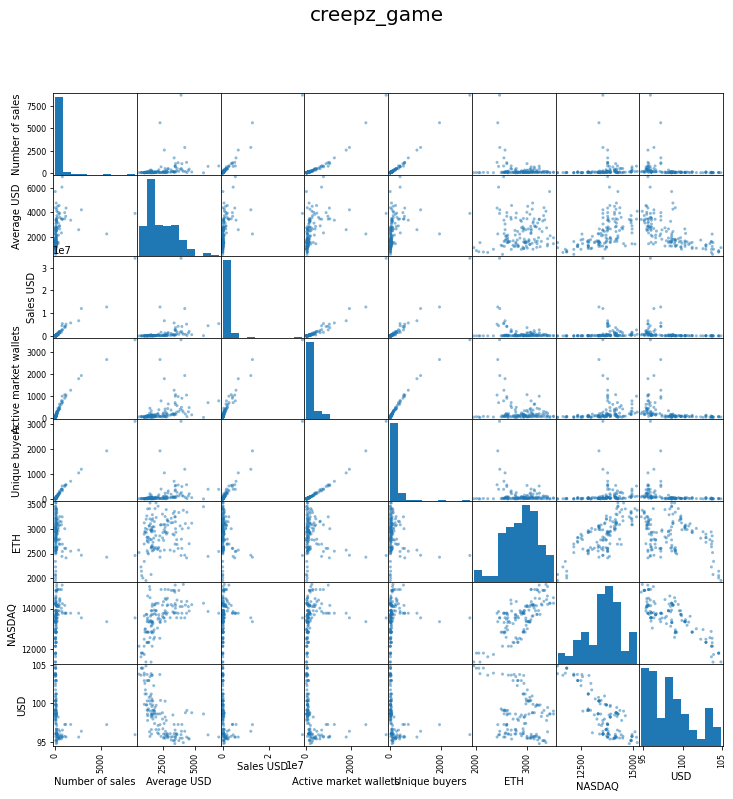

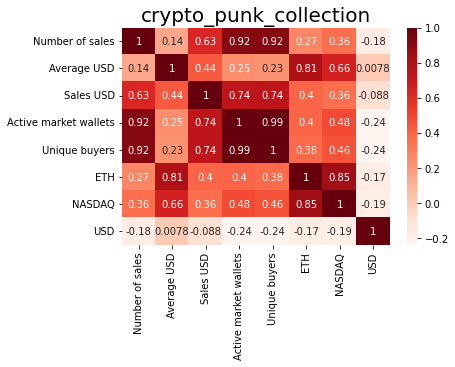

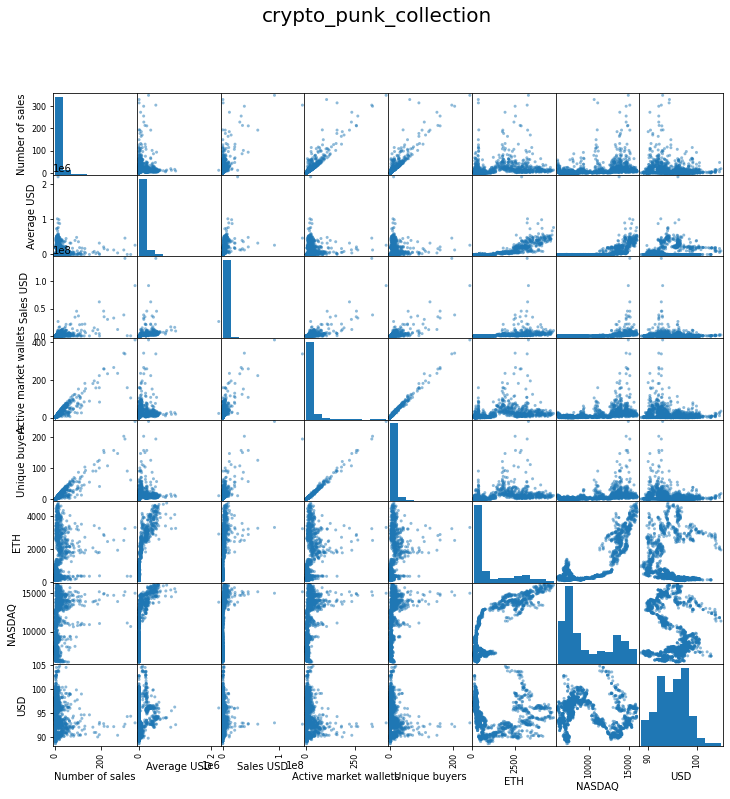

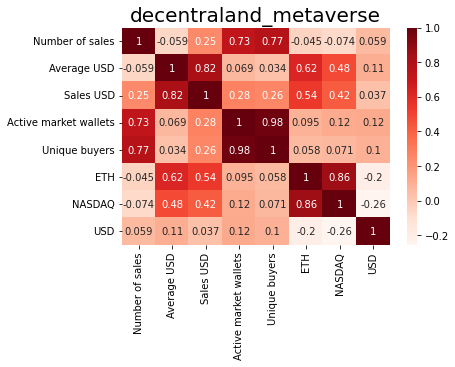

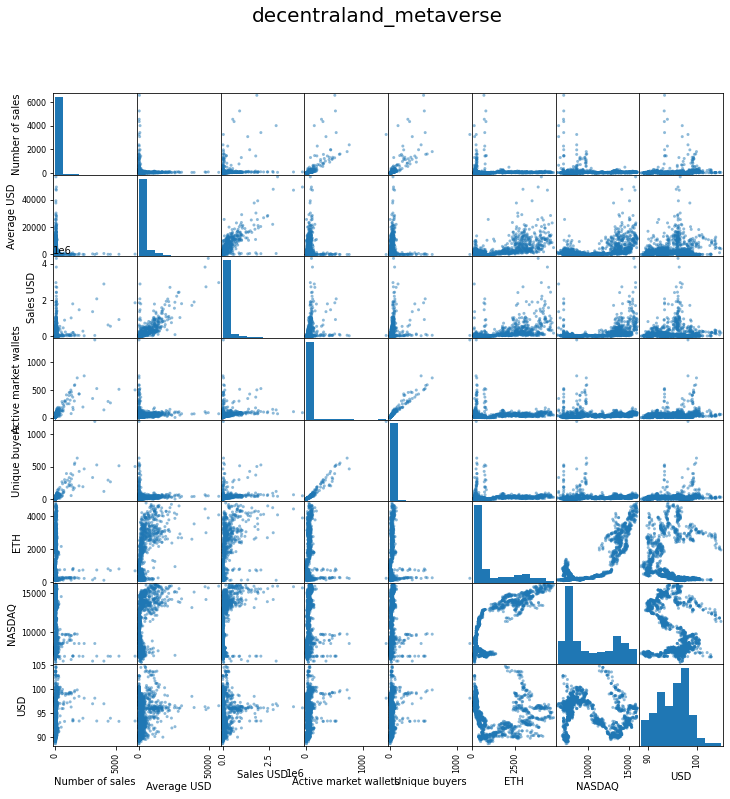

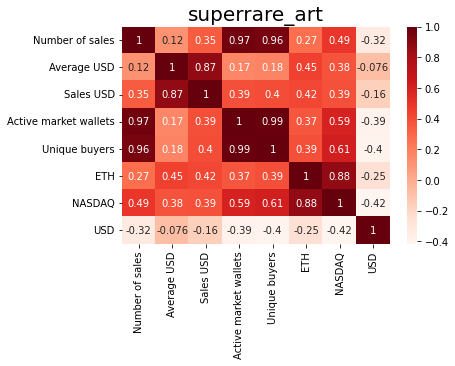

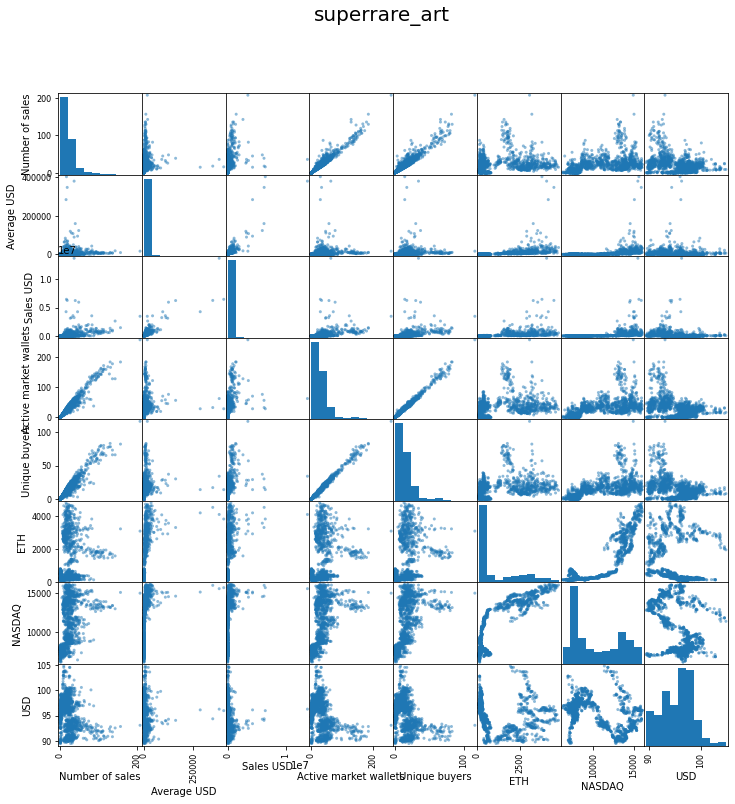

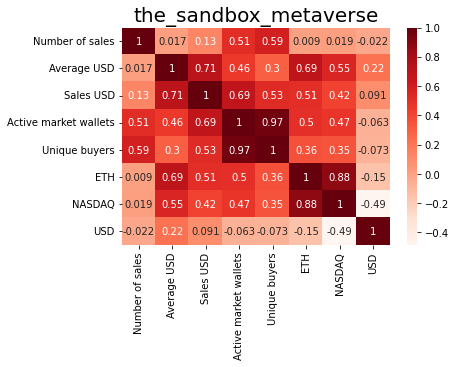

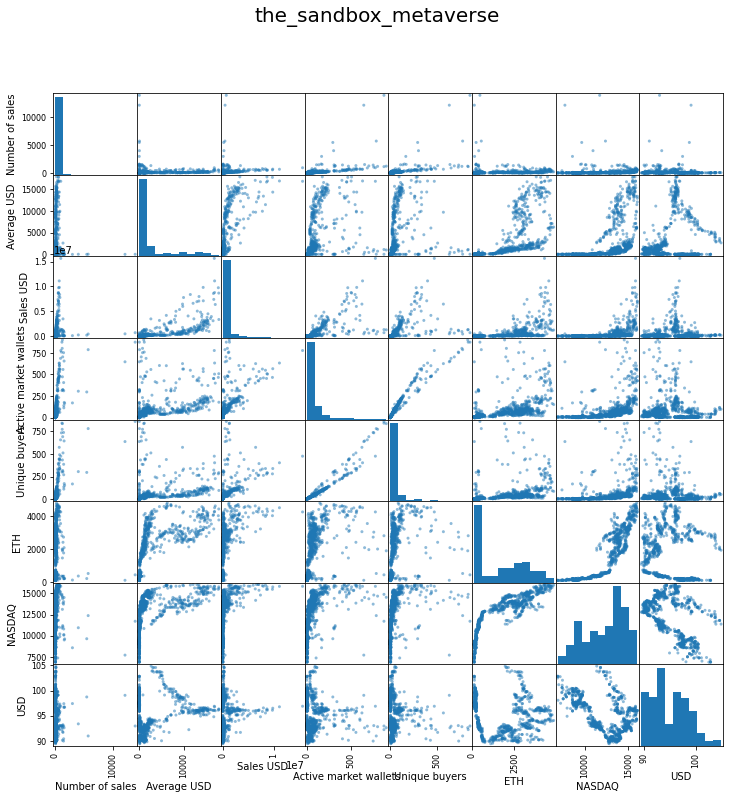

In [11]:
from pandas.plotting import scatter_matrix
import seaborn as sns
#correlation between different features
for i in range(n):
  plt.title(urllist_name[i], fontsize=20)
  sns.heatmap(extended_dataset[i].corr(),annot=True,cmap =plt.cm.Reds)
  plt.show()
  scatter_matrix(extended_dataset[i],figsize = (12,12))
  plt.suptitle(urllist_name[i], fontsize=20)
  plt.show()

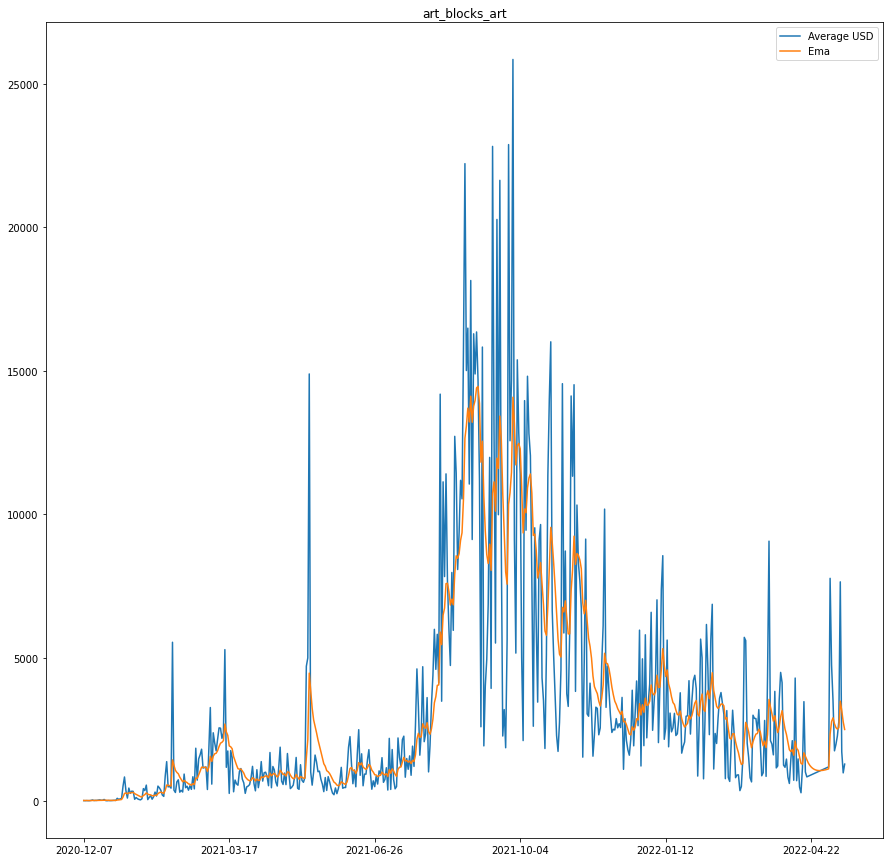

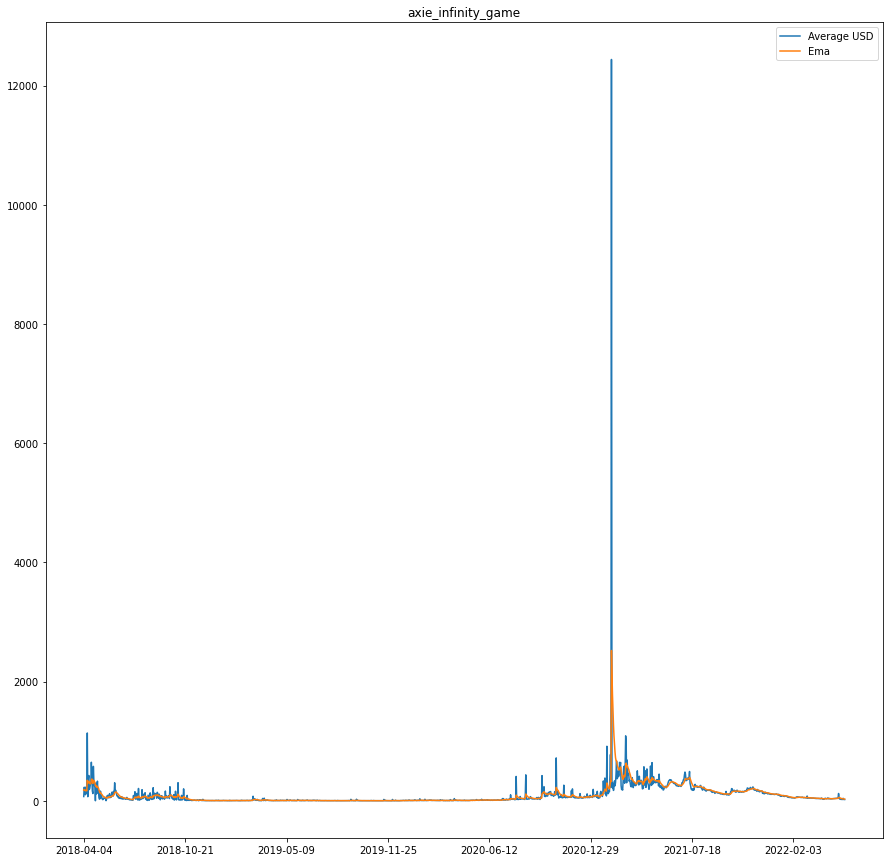

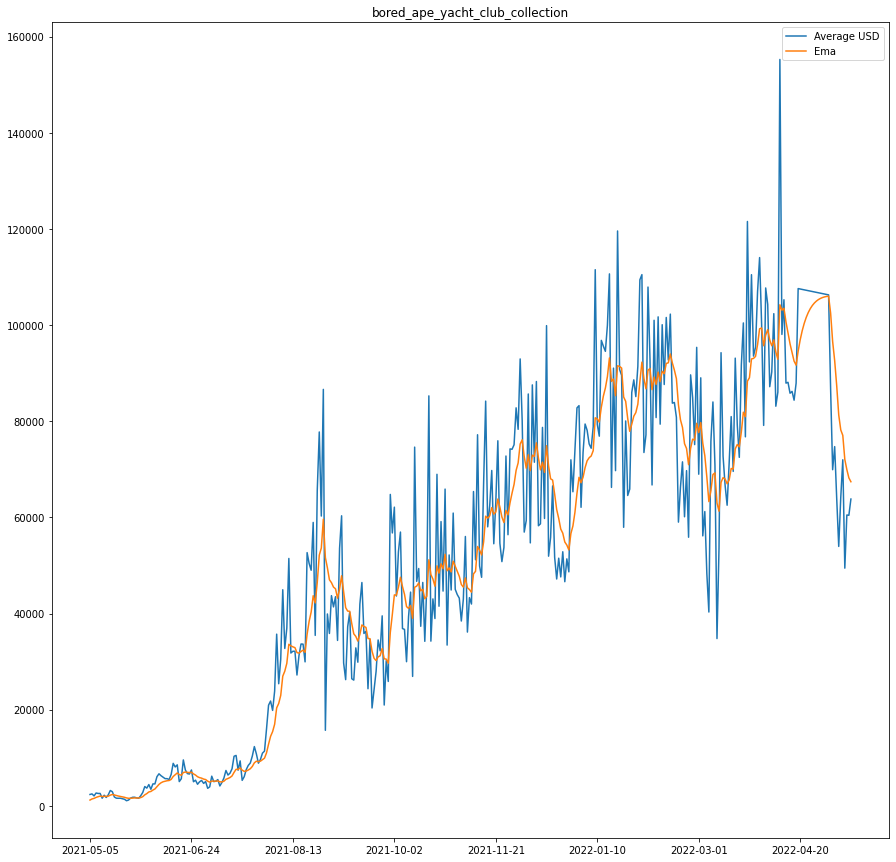

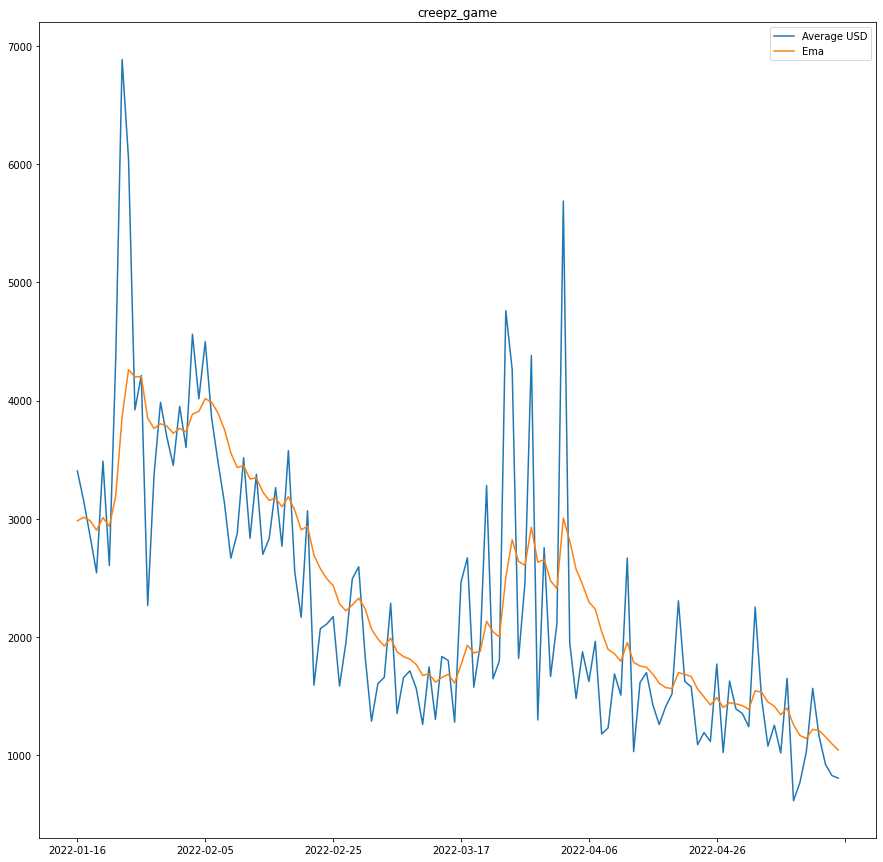

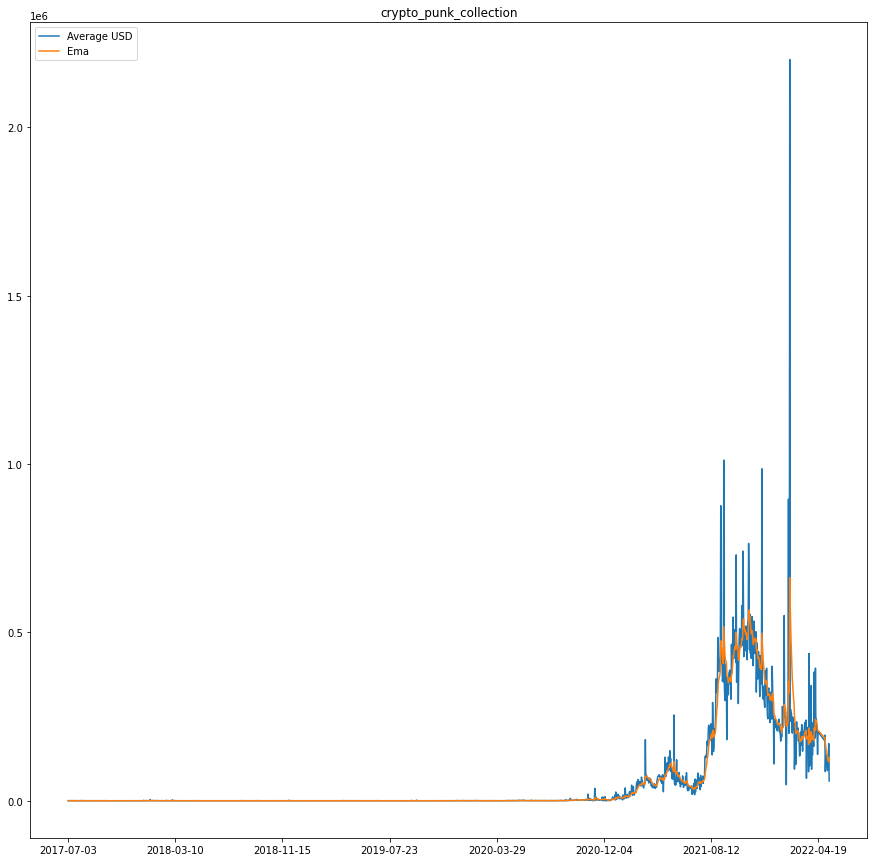

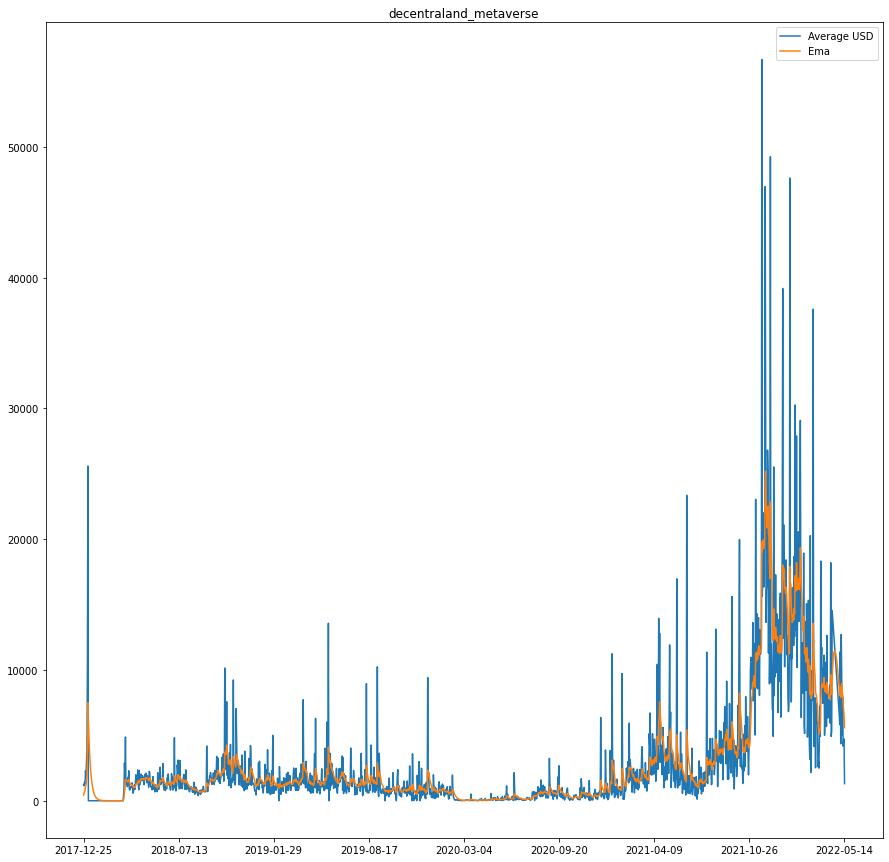

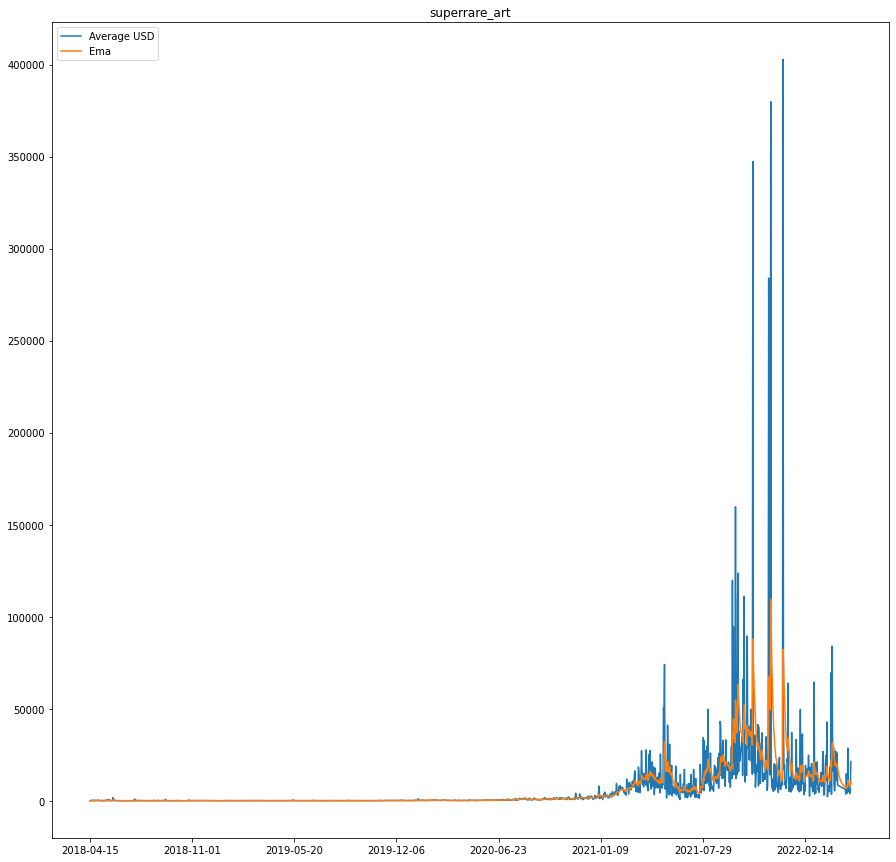

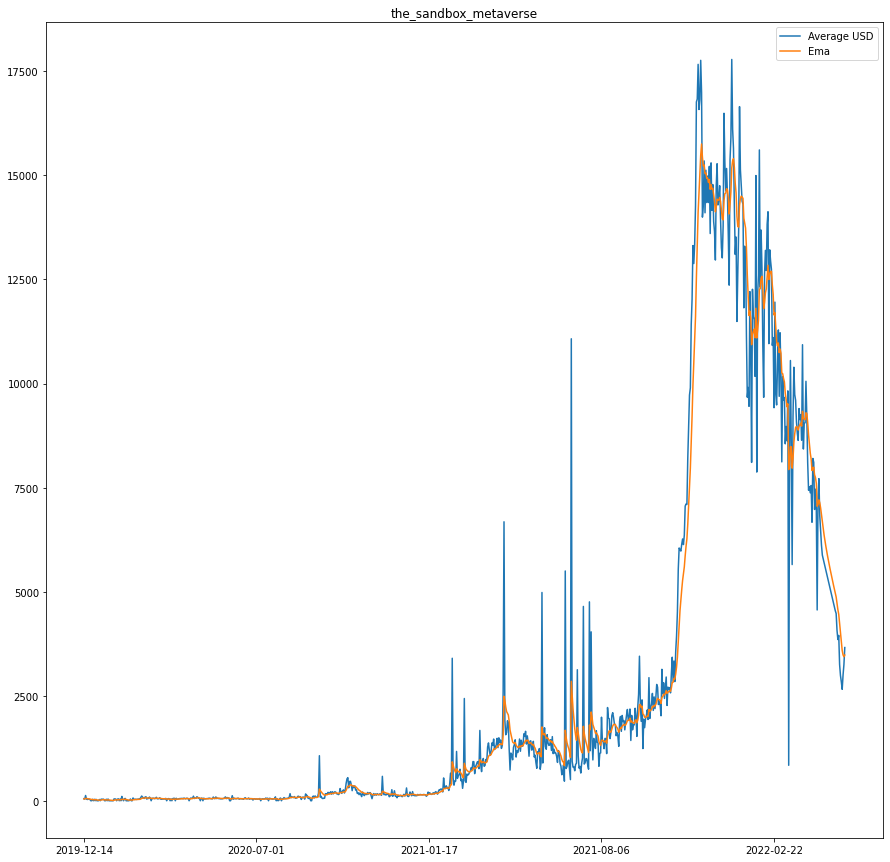

In [12]:
import pandas_ta as ta
ema_dataset = []
for i in range(n):
  
  ema_data = extended_dataset[i].copy()
  ema_data['Ema'] = ema_data.ta.ema(close='Average USD', length=10)
  # print(ema_data.head(15))
  ema_data = ema_data.iloc[10:]
  ema_data.plot.line(y=['Average USD','Ema'],use_index=True,figsize=(15,15),title=urllist_name[i])
  ema_data = ema_data.drop(columns=['Average USD'])
  # print(ema_data.head())
  ema_dataset.append(ema_data)

In [13]:
#training the Model

from sklearn.linear_model import LinearRegression
model = [] #for std datatset
Y_train_pred = []
Y_test_pred = []
for i in range(n):
  model.append(LinearRegression())
  model[i].fit(X_train[i],Y_train[i])
  pred = model[i].predict(X_test[i])
  pred2 = model[i].predict(X_train[i])
  Y_train_pred.append(pd.DataFrame(pred2,columns=Y_train[i].columns, index=list(Y_train[i].index.values)))
  Y_test_pred.append(pd.DataFrame(pred, columns=Y_test[i].columns, index=list(Y_test[i].index.values)))

In [14]:
#validating the fit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
for i in range(n):
  print('dataset name:',urllist_name[i])
  print('Model Coefficients:', model[i].coef_)
  print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],Y_test_pred[i])))
  print('Coefficient of Determination:',r2_score(Y_test[i],Y_test_pred[i]))

dataset name: art_blocks_art
Model Coefficients: [[-3.16583405e+00  3.22198006e-04  7.26629231e+00 -4.97717658e+00]]
RMSE: 1716.8893388316112
Coefficient of Determination: 0.15170165831779292
dataset name: axie_infinity_game
Model Coefficients: [[-0.2465567   0.0037304  -1.65030091  1.89651903]]
RMSE: 26837.011415394452
Coefficient of Determination: -73390.40486717146
dataset name: bored_ape_yacht_club_collection
Model Coefficients: [[ 1.78169202e+01  3.29463547e-03 -2.53518854e+01 -1.44638392e+02]]
RMSE: 32121.64780308081
Coefficient of Determination: -1.580855760226556
dataset name: creepz_game
Model Coefficients: [[-1.03932602e+00  6.45867791e-04  5.84886353e+00 -1.01640392e+01]]
RMSE: 1016.1557938128836
Coefficient of Determination: -6.076062268081653
dataset name: crypto_punk_collection
Model Coefficients: [[-1.17778115e+02  4.09586134e-03  4.15057602e+02 -3.12278180e+02]]
RMSE: 274124.68542146723
Coefficient of Determination: -1.0082118841269048
dataset name: decentraland_metaver

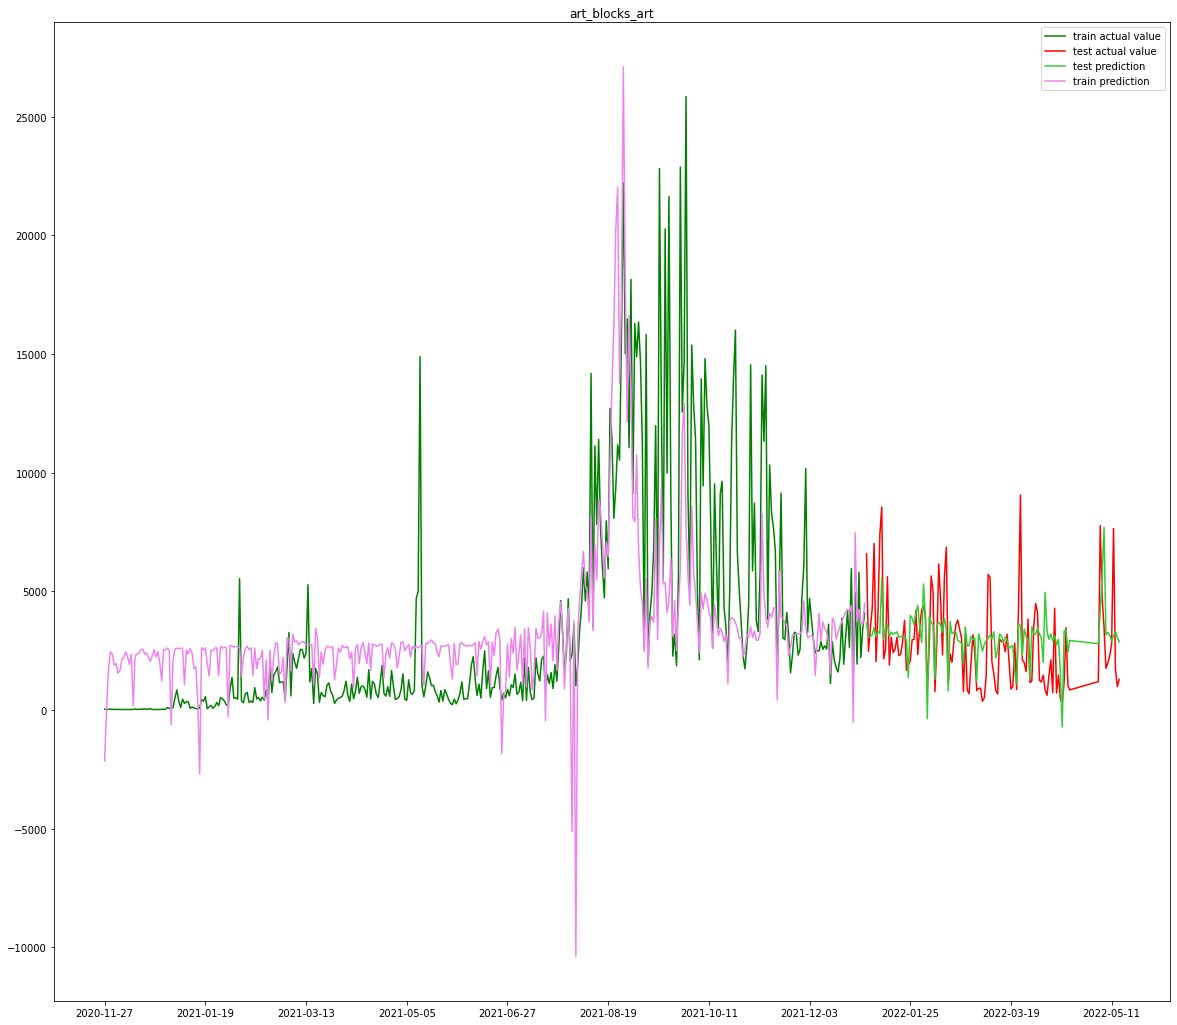

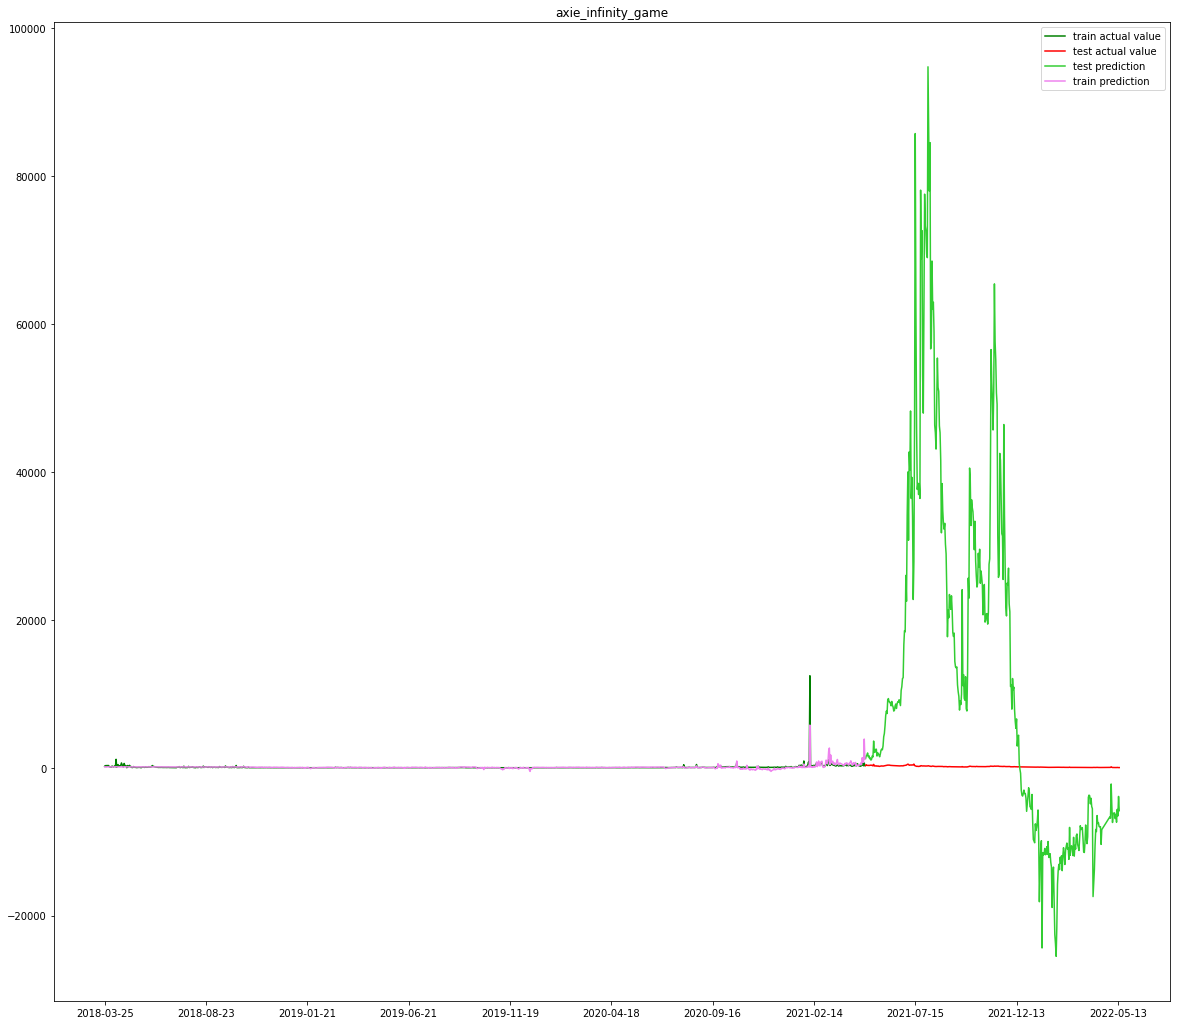

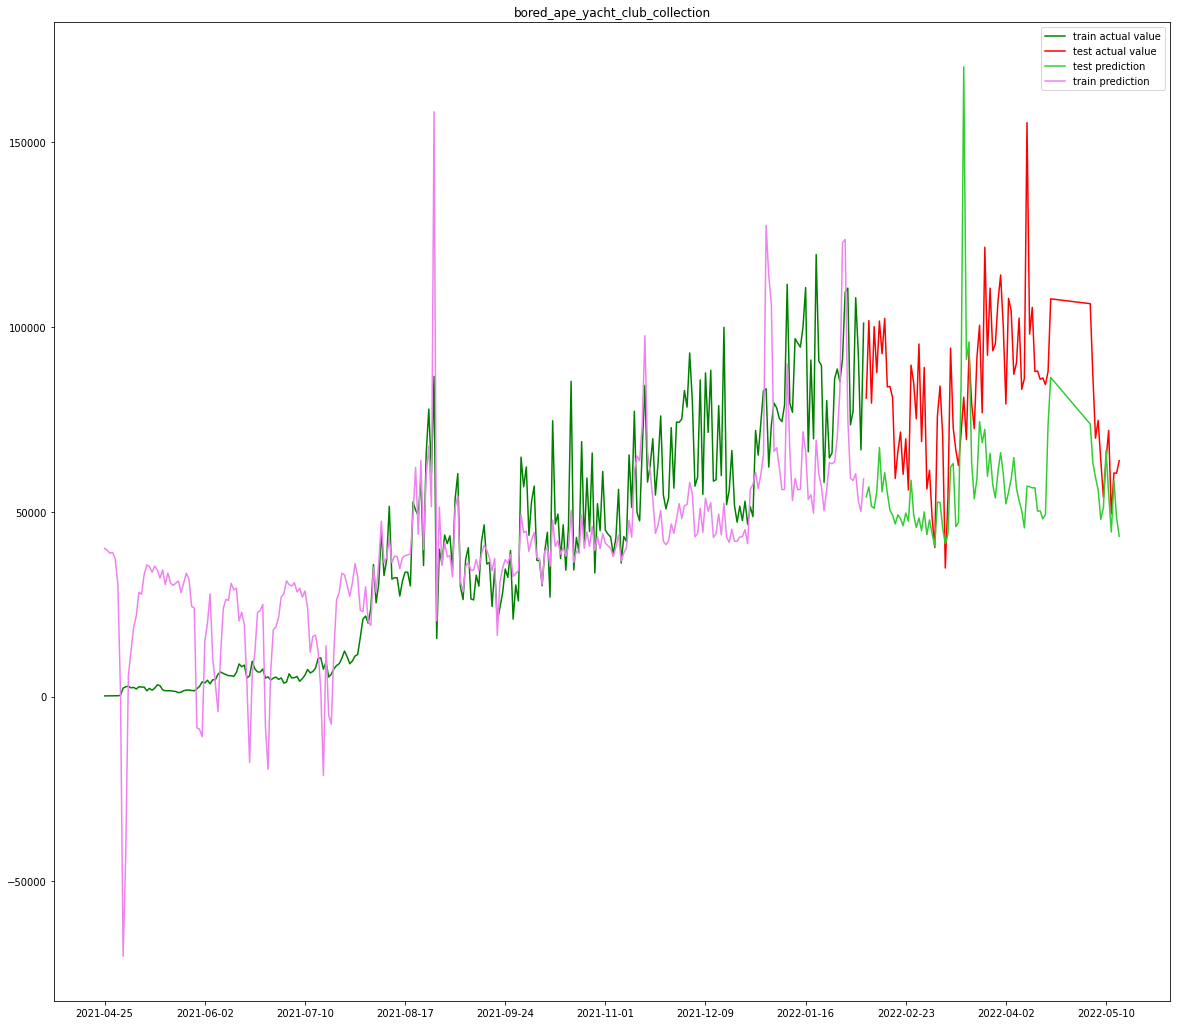

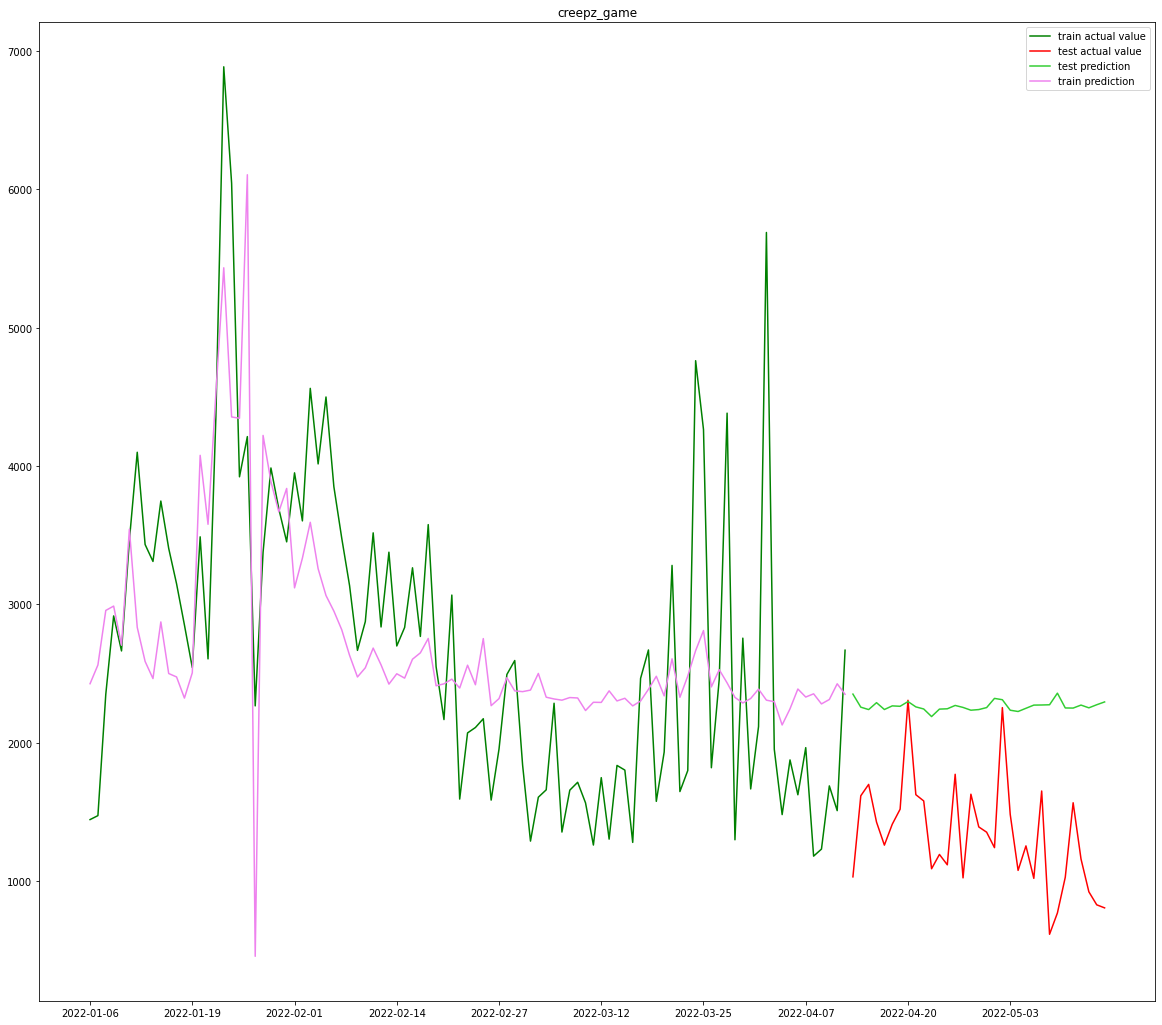

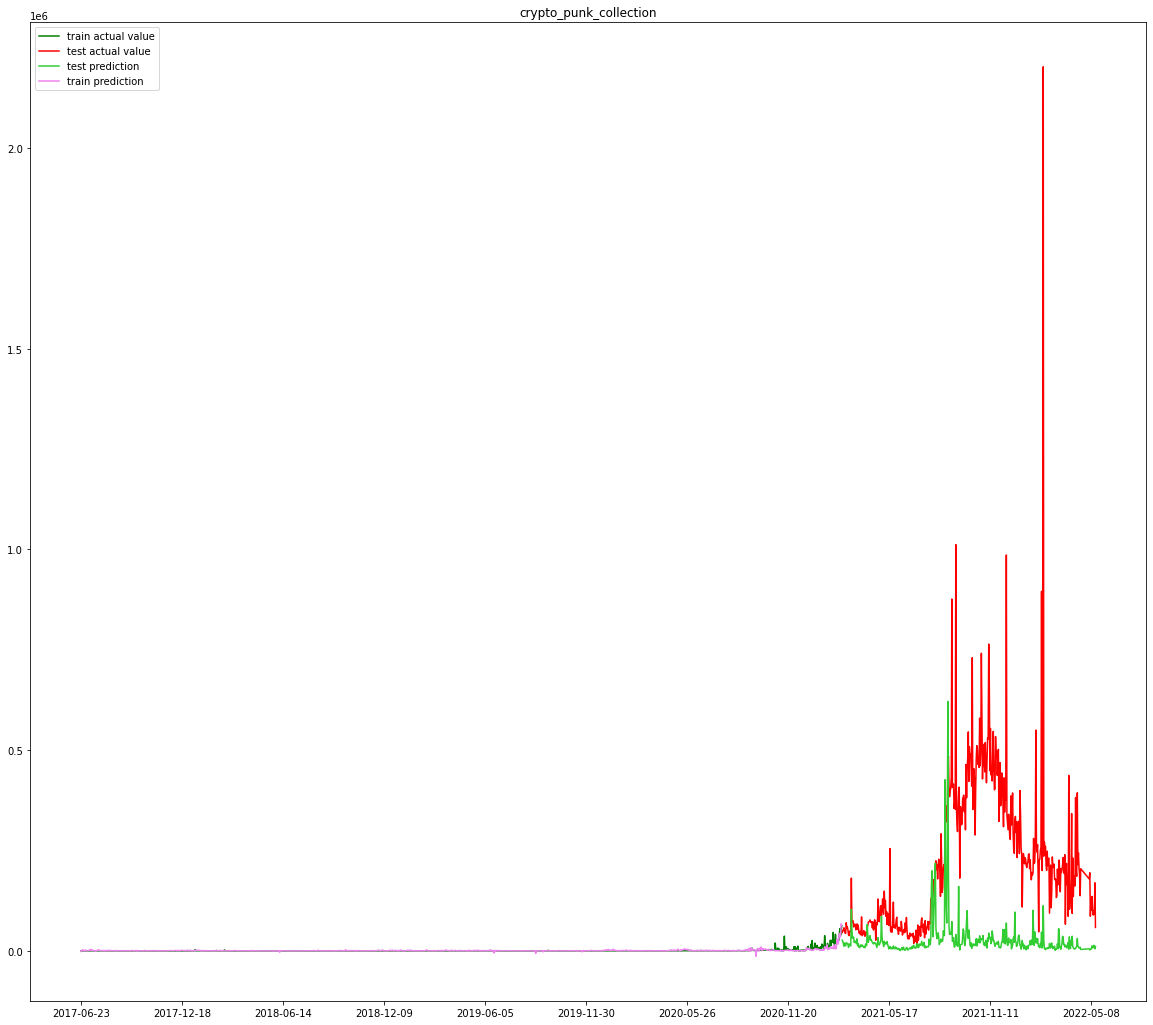

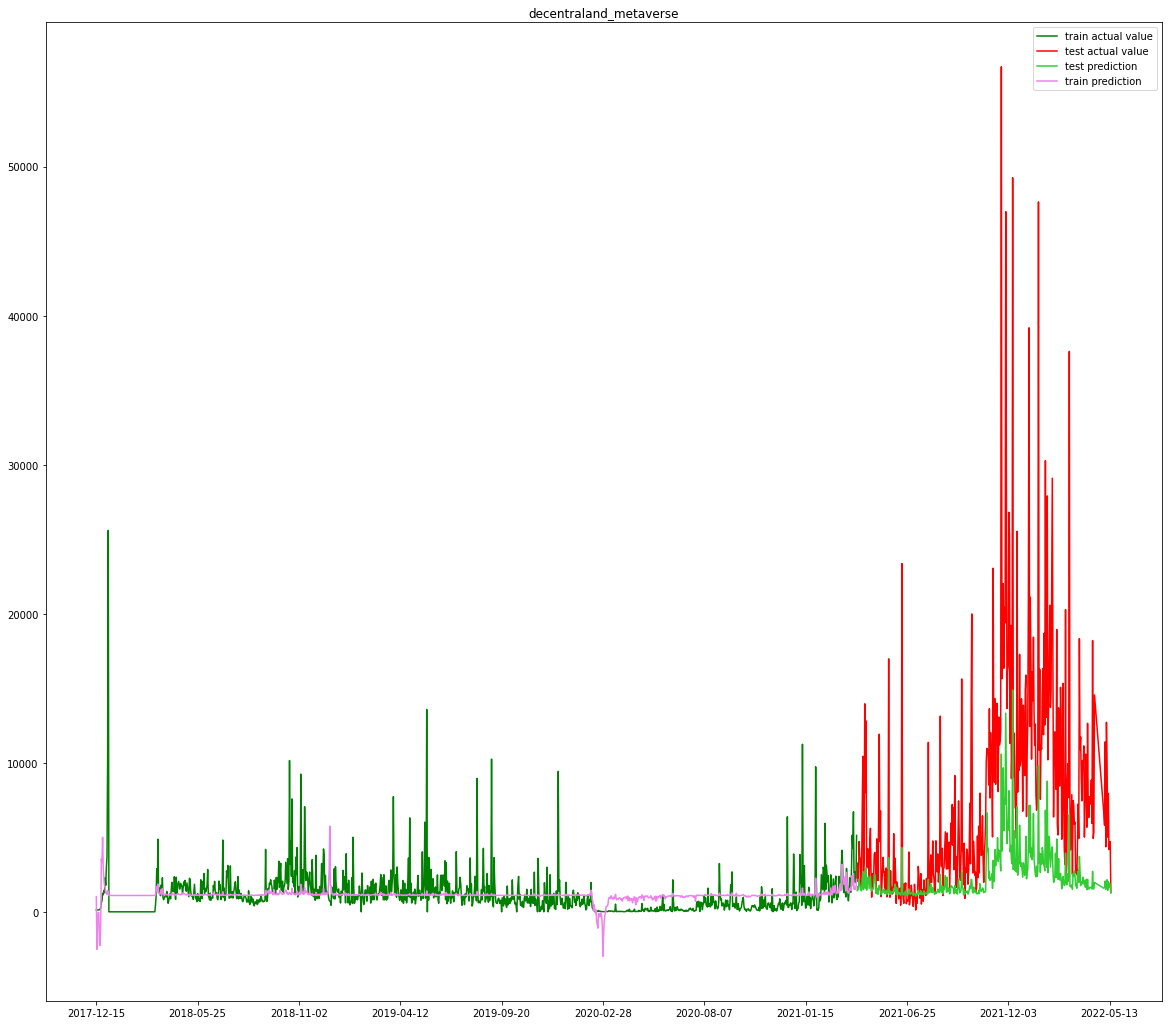

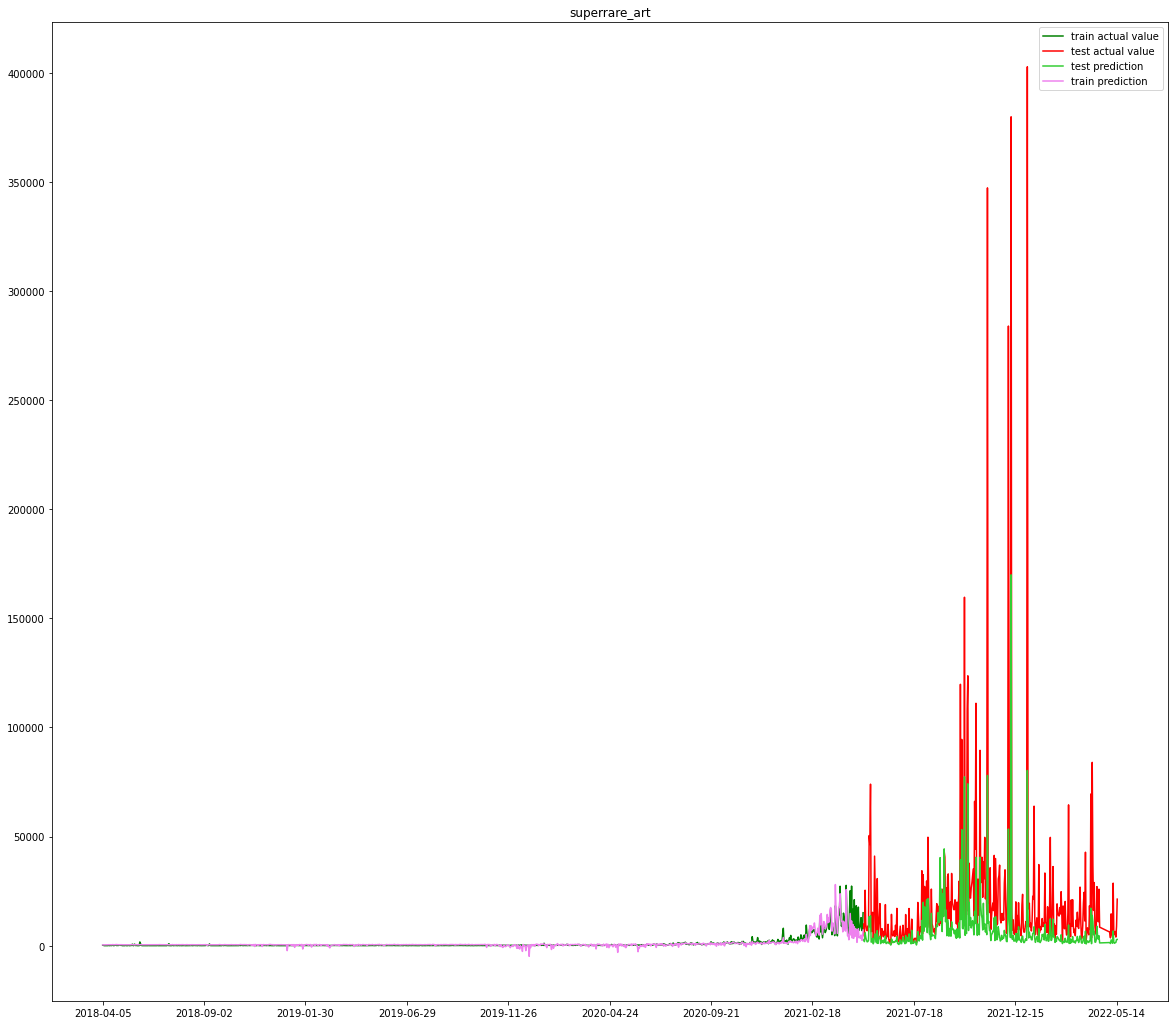

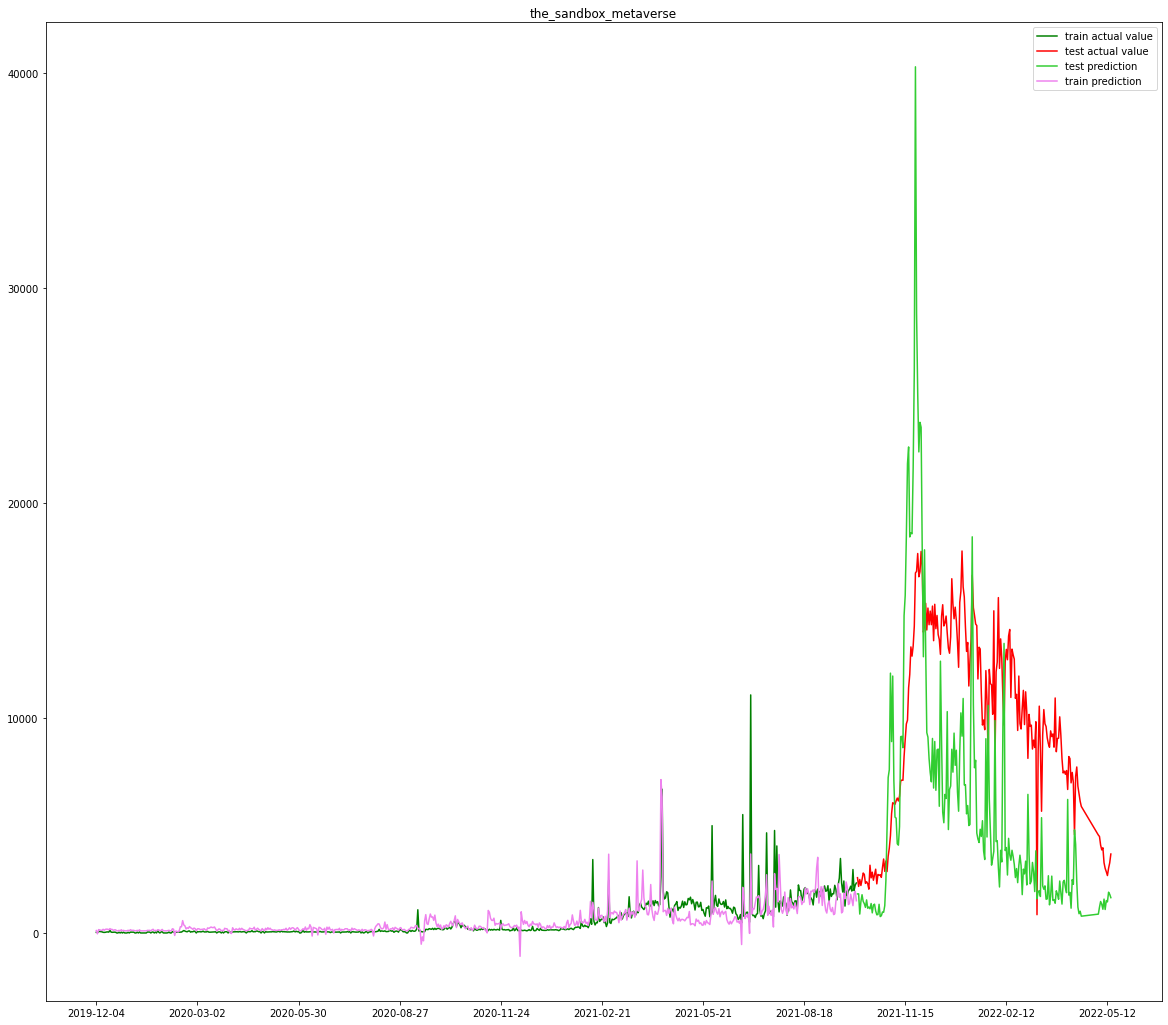

In [15]:
for i in range(n):
  a = Y_train[i].copy()
  a.rename(columns = {'Average USD':'train actual value'})
  b = Y_test[i].copy()
  b.rename(columns = {'Average USD':'test actual value'})
  # a.plot.line(y=['train actual value'],use_index=True,figsize=(15,15),title=urllist_name[i])
  # b.plot.line(y=['test actual value'],use_index=True,figsize=(15,15),title=urllist_name[i])
  fig,ax = plt.subplots(figsize=(20,18))
  ax.plot(a,label='train actual value',color='g')
  ax.plot(b,label='test actual value',color='r')
  ax.plot(Y_test_pred[i],label='test prediction',color='limegreen')
  ax.plot(Y_train_pred[i],label='train prediction',color='violet')
  plt.xticks(range(0,len(original_dataset[i].index),len(original_dataset[i].index)//10))
  plt.legend()
  plt.title(urllist_name[i])
  plt.show()

Best alpha using built-in LassoCV: 1418431045.719116
Best score using built-in LassoCV: 0.139841
1728.8503341547337
Lasso picked 1 variables and eliminated the other 3 variables


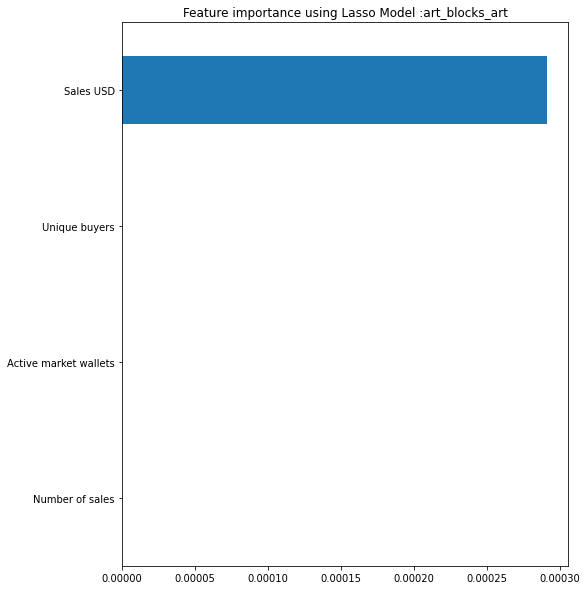

Best alpha using built-in LassoCV: 48899.083275
Best score using built-in LassoCV: -137176.442410
36690.43840677007
Lasso picked 1 variables and eliminated the other 3 variables


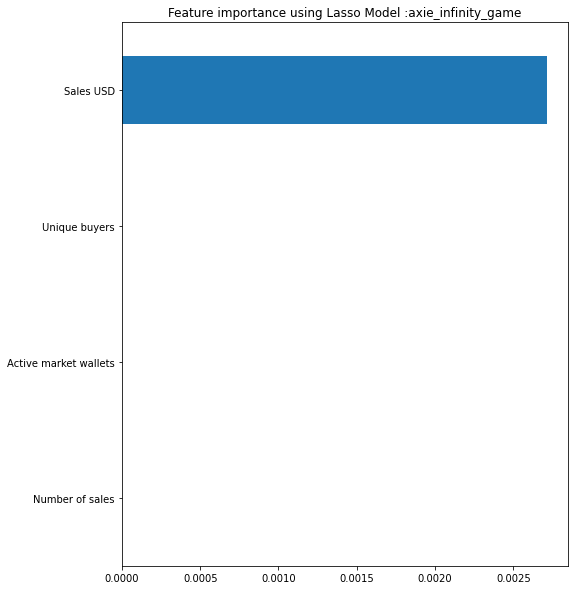

Best alpha using built-in LassoCV: 144588662743.863007
Best score using built-in LassoCV: -5.443885
50756.288240510534
Lasso picked 0 variables and eliminated the other 4 variables


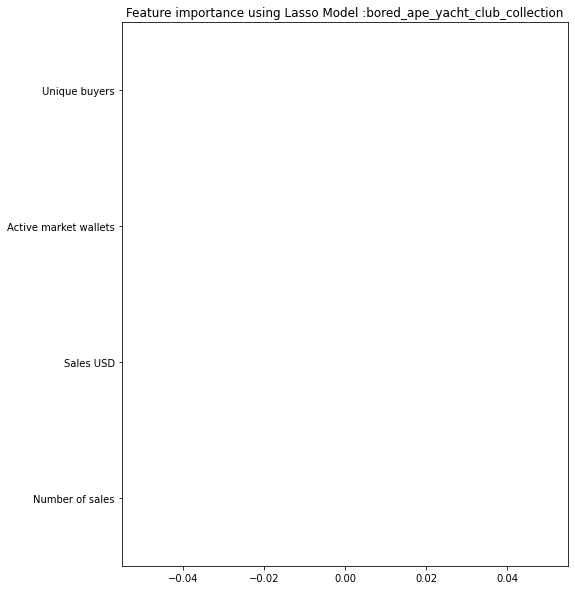

Best alpha using built-in LassoCV: 322724992.544618
Best score using built-in LassoCV: -11.403600
1345.359489072392
Lasso picked 1 variables and eliminated the other 3 variables


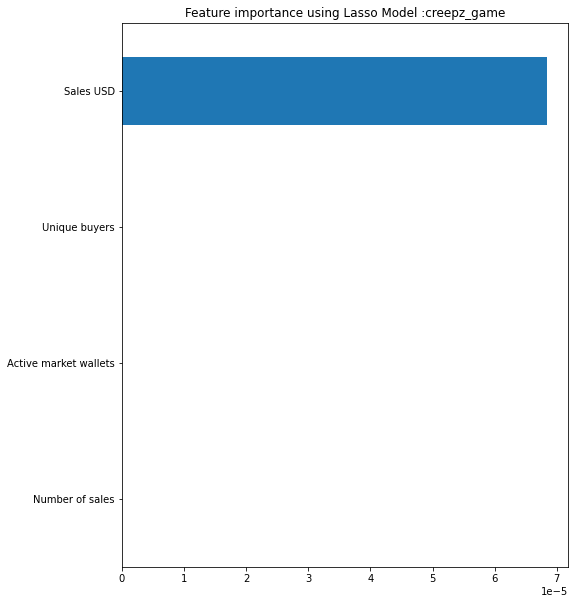

Best alpha using built-in LassoCV: 1950441.422992
Best score using built-in LassoCV: -0.940144
269438.9253920352
Lasso picked 1 variables and eliminated the other 3 variables


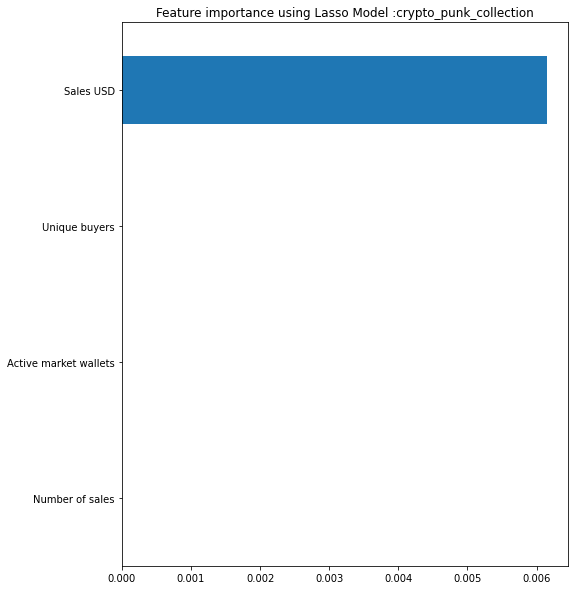

Best alpha using built-in LassoCV: 26900.499035
Best score using built-in LassoCV: -0.255510
8502.98289983506
Lasso picked 2 variables and eliminated the other 2 variables


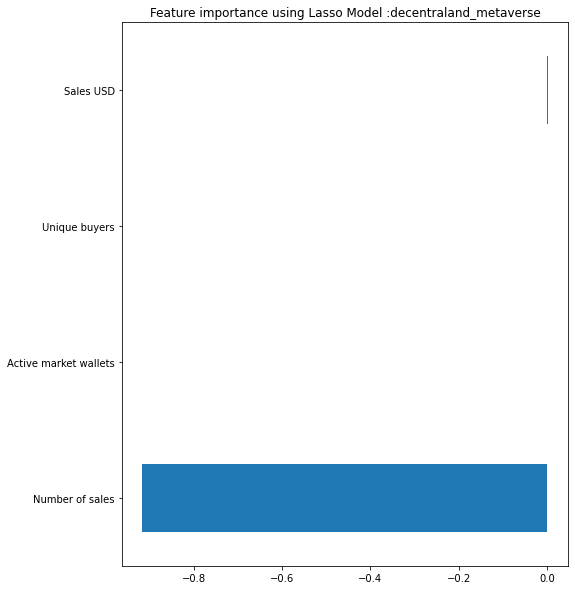

Best alpha using built-in LassoCV: 750856.430629
Best score using built-in LassoCV: 0.351997
31868.42830316815
Lasso picked 1 variables and eliminated the other 3 variables


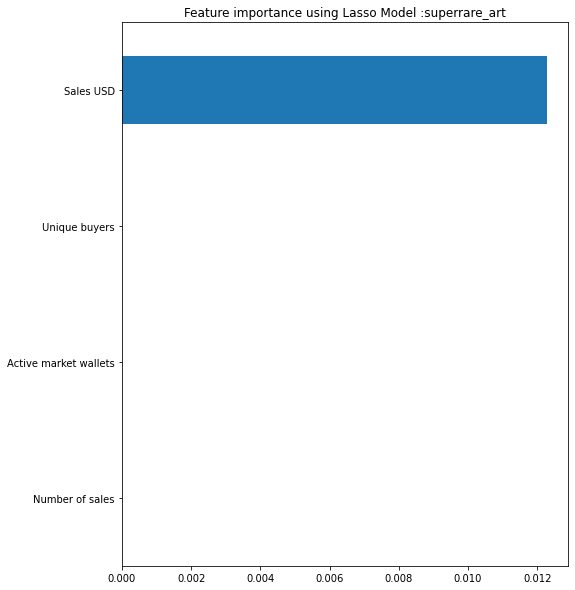

Best alpha using built-in LassoCV: 1408280.244246
Best score using built-in LassoCV: -1.299792
6734.437692464876
Lasso picked 1 variables and eliminated the other 3 variables


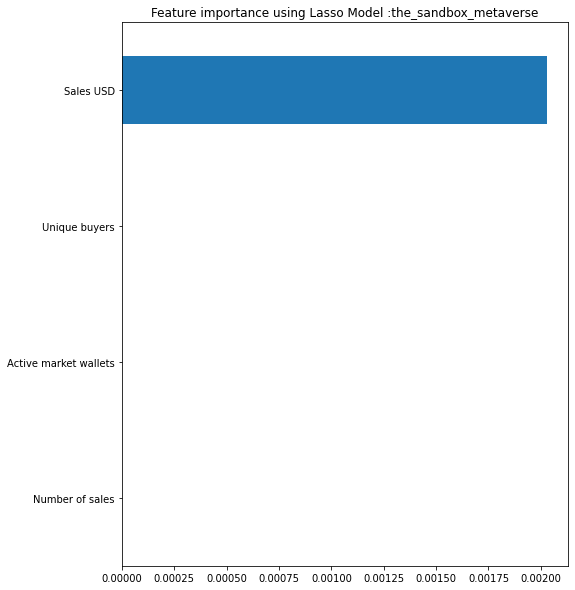

In [16]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')
#lienar regression + Lasso
# from sklearn.linear_model import Lasso

Y_pred_Lasso = []
Y_pred_Lasso_train = []
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
for i in range(n):
  reg = LassoCV()
  reg.fit(X_train[i],Y_train[i])
  print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
  print("Best score using built-in LassoCV: %f" %reg.score(X_test[i],Y_test[i]))
  print(np.sqrt(mean_squared_error(Y_test[i],reg.predict(X_test[i]))))
  coef = pd.Series(reg.coef_, index = X_test[i].columns)
  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  imp_coef = coef.sort_values()
  matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using Lasso Model :"+urllist_name[i])
  plt.show()
  pred = reg.predict(X_test[i])
  pred2 = reg.predict(X_train[i])
  Y_pred_Lasso.append(pd.DataFrame(pred, columns=Y_test[i].columns, index=list(Y_test[i].index.values)))
  Y_pred_Lasso_train.append(pd.DataFrame(pred2, columns=Y_train[i].columns, index=list(Y_train[i].index.values)))
  


In [17]:
model_std = []
std_Y_pred = []
std_Y_pred_train = []
model_minmax = []
minmax_Y_pred = []
minmax_Y_pred_train = []
for i in range(n):
  model_std.append(LinearRegression())
  model_std[i].fit(std_X_train[i],std_Y_train[i])
  pred = model_std[i].predict(std_X_test[i])
  pred2 = model_std[i].predict(std_X_train[i])
  std_Y_pred.append(pd.DataFrame(pred, columns=std_Y_test[i].columns, index=list(std_Y_test[i].index.values)))
  std_Y_pred_train.append(pd.DataFrame(pred2, columns=std_Y_train[i].columns, index=list(std_Y_train[i].index.values)))
  model_minmax.append(LinearRegression())
  model_minmax[i].fit(minmax_X_train[i],minmax_Y_train[i])
  pred = model_minmax[i].predict(minmax_X_test[i])
  pred2 = model_minmax[i].predict(minmax_X_train[i])
  minmax_Y_pred.append(pd.DataFrame(pred, columns=minmax_Y_test[i].columns, index=list(minmax_Y_test[i].index.values)))
  minmax_Y_pred_train.append(pd.DataFrame(pred2, columns=minmax_Y_train[i].columns, index=list(minmax_Y_train[i].index.values)))


In [18]:
#validating the fit
for i in range(n):
  print('dataset name',urllist_name[i])
  print('std Model Coefficients:', model_std[i].coef_)
  print('RMSE:',np.sqrt(mean_squared_error(std_Y_test[i],std_Y_pred[i])))
  print('Coefficient of Determination:',r2_score(std_Y_test[i],std_Y_pred[i]))

  print('dataset name',urllist_name[i])
  print('minmax Model Coefficients:', model_minmax[i].coef_)
  print('RMSE:',np.sqrt(mean_squared_error(minmax_Y_test[i],minmax_Y_pred[i])))
  print('Coefficient of Determination:',r2_score(minmax_Y_test[i],minmax_Y_pred[i]))

dataset name art_blocks_art
std Model Coefficients: [[-0.68274143  0.58435674  1.09121351 -0.58418496]]
RMSE: 0.4105184421360938
Coefficient of Determination: 0.15170165831779325
dataset name art_blocks_art
minmax Model Coefficients: [[-1.03821423  0.88843322  1.43673488 -0.71169321]]
RMSE: 0.06645921200042006
Coefficient of Determination: 0.15170165831779248
dataset name axie_infinity_game
std Model Coefficients: [[-26.68231915  68.94876159 -73.87487508  60.87476802]]
RMSE: 78.55120162980465
Coefficient of Determination: -73390.40486717236
dataset name axie_infinity_game
minmax Model Coefficients: [[ -3.57238295  11.22802543 -12.90586352   9.78786564]]
RMSE: 2.1574634452831902
Coefficient of Determination: -73390.40486717116
dataset name bored_ape_yacht_club_collection
std Model Coefficients: [[ 0.50508547  1.48208704 -0.29954664 -1.47917415]]
RMSE: 0.9202378186810771
Coefficient of Determination: -1.5808557602265592
dataset name bored_ape_yacht_club_collection
minmax Model Coefficien

In [19]:
# for i in range(n):
#   inversed_Y = std_scaler_list[i].inverse_transform(std_X_test[i].join(std_Y_pred[i]))
#   result = pd.DataFrame(inversed_Y[:,[4]], columns=std_Y_pred[i].columns, index=list(std_Y_pred[i].index.values))
#   result.rename(columns = {'Average USD' : 'predict Average USD'}, inplace = True)
#   fig, ax = plt.subplots(figsize=(20,18))
#   for j in range(len(result.index)):
#     ax.plot([j,j],[result.iloc[j], Y_test[i][['Average USD']].iloc[j]], c="k", linewidth=0.5)
#   ax.plot(result,'o', label='Prediction', color = 'g')
#   ax.plot(Y_test[i][['Average USD']],'^', label='Average USD', color = 'r' )
#   plt.xticks(range(0,len(result.index),len(result.index)//10))
#   plt.legend()
#   plt.title(urllist_name[i])
#   plt.show()
#   print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],result)))
#   print('Coefficient of Determination:',r2_score(Y_test[i],result))

RMSE: 2920.7048660522487
Coefficient of Determination: -1.4549313883860453


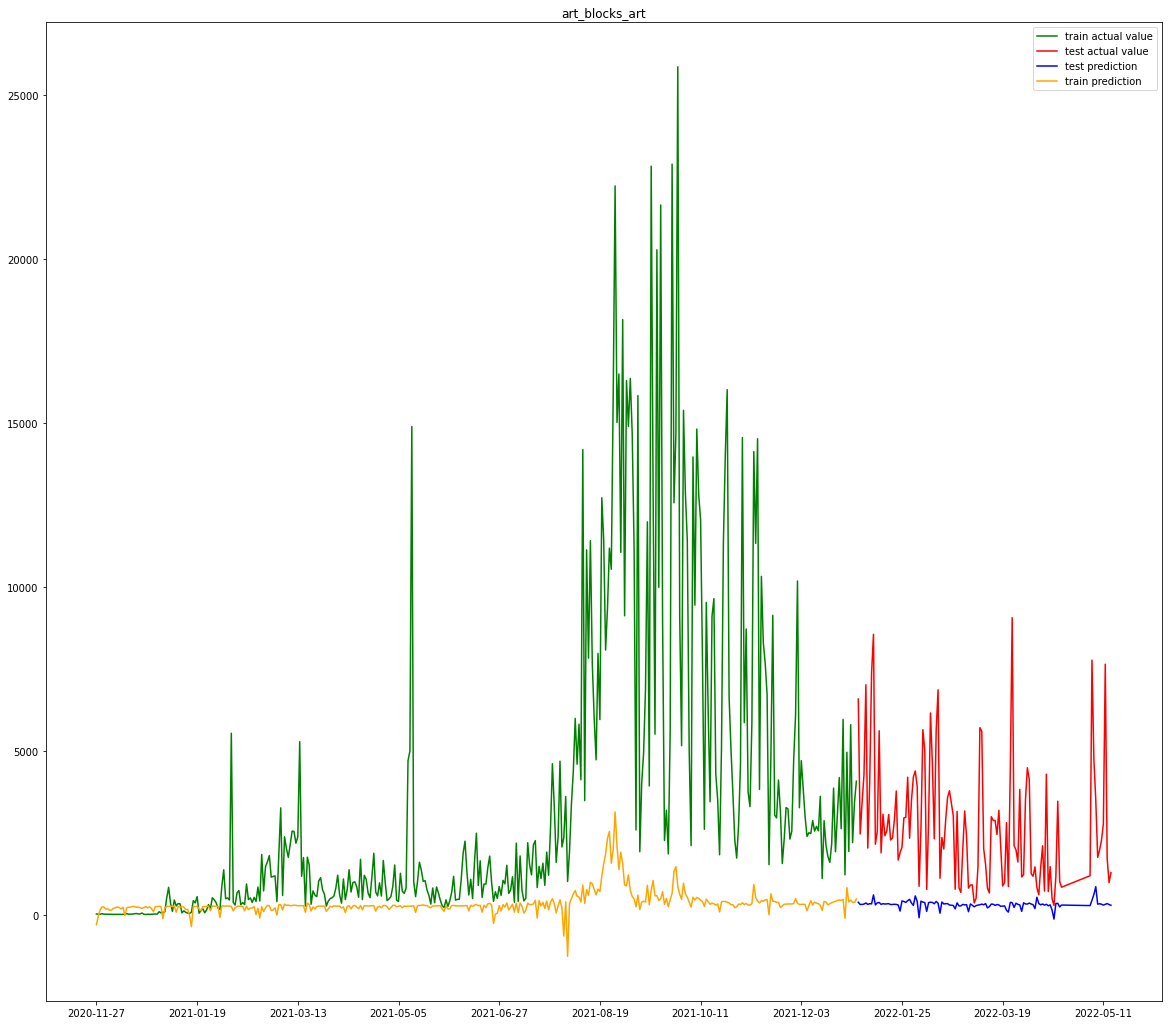

RMSE: 866012.9579481835
Coefficient of Determination: -76423280.1822877


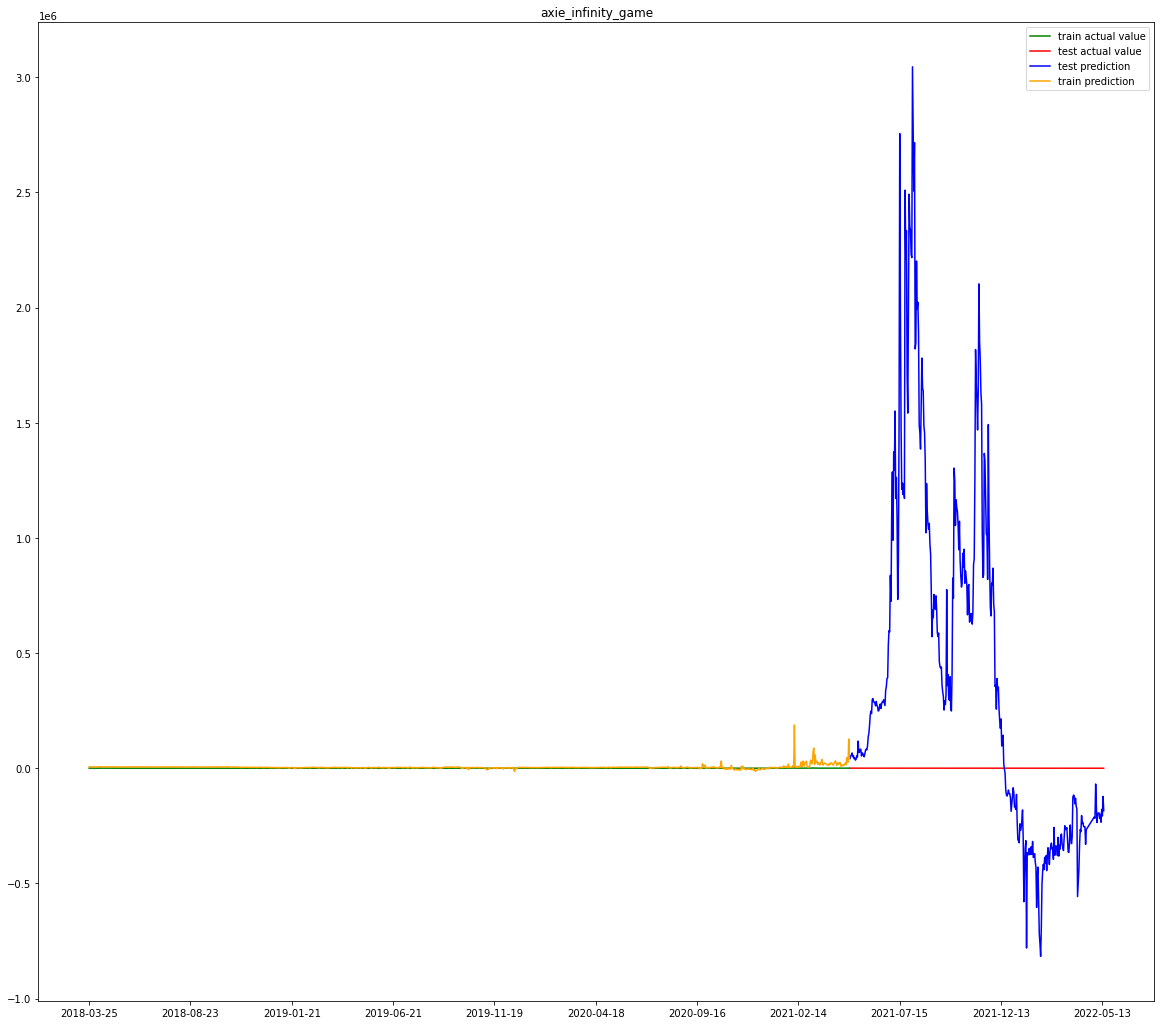

RMSE: 87804.92182866952
Coefficient of Determination: -18.284386293911933


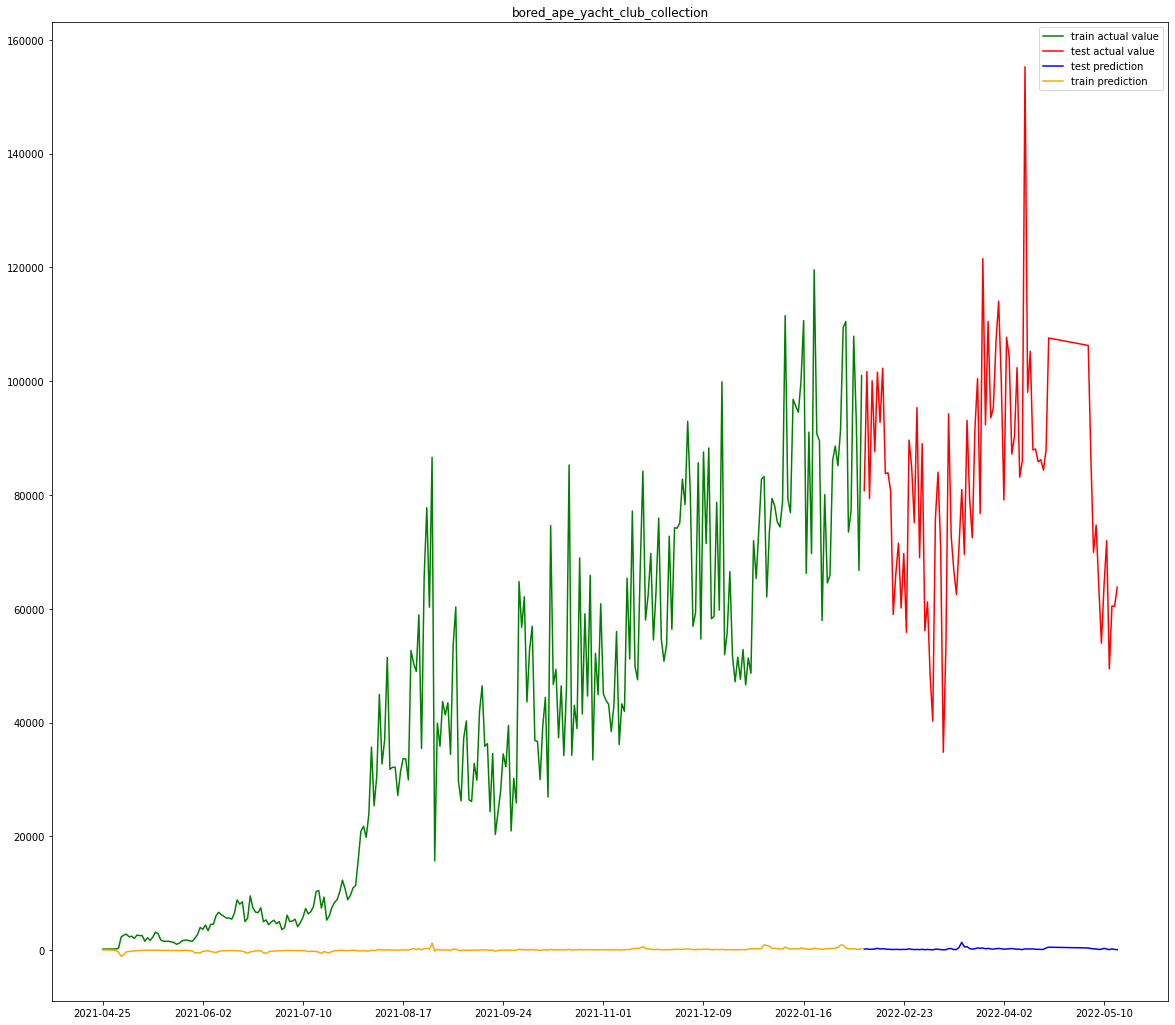

RMSE: 1251.5585104515967
Coefficient of Determination: -9.734291034648429


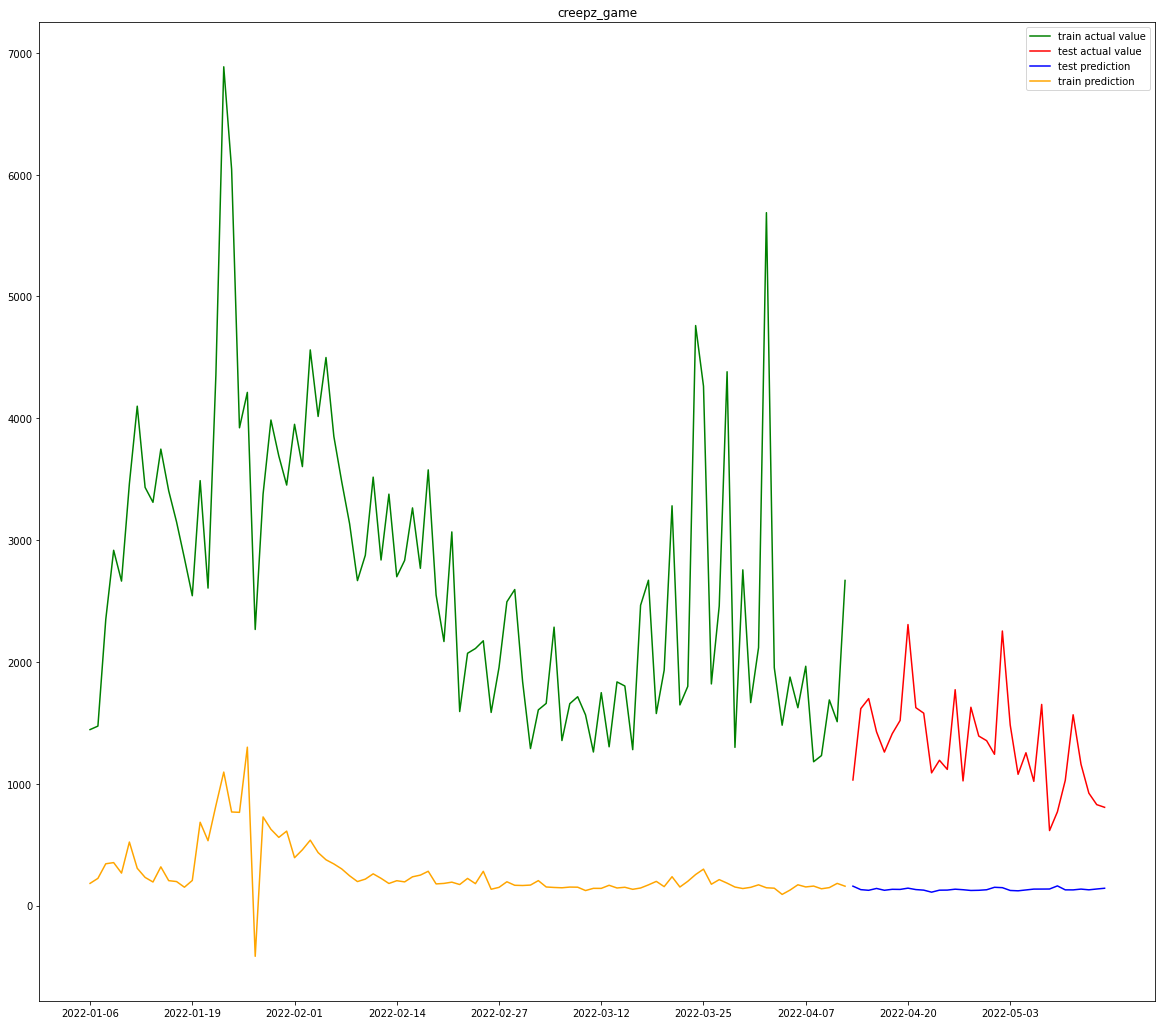

RMSE: 296089.35369467456
Coefficient of Determination: -1.34292736136215


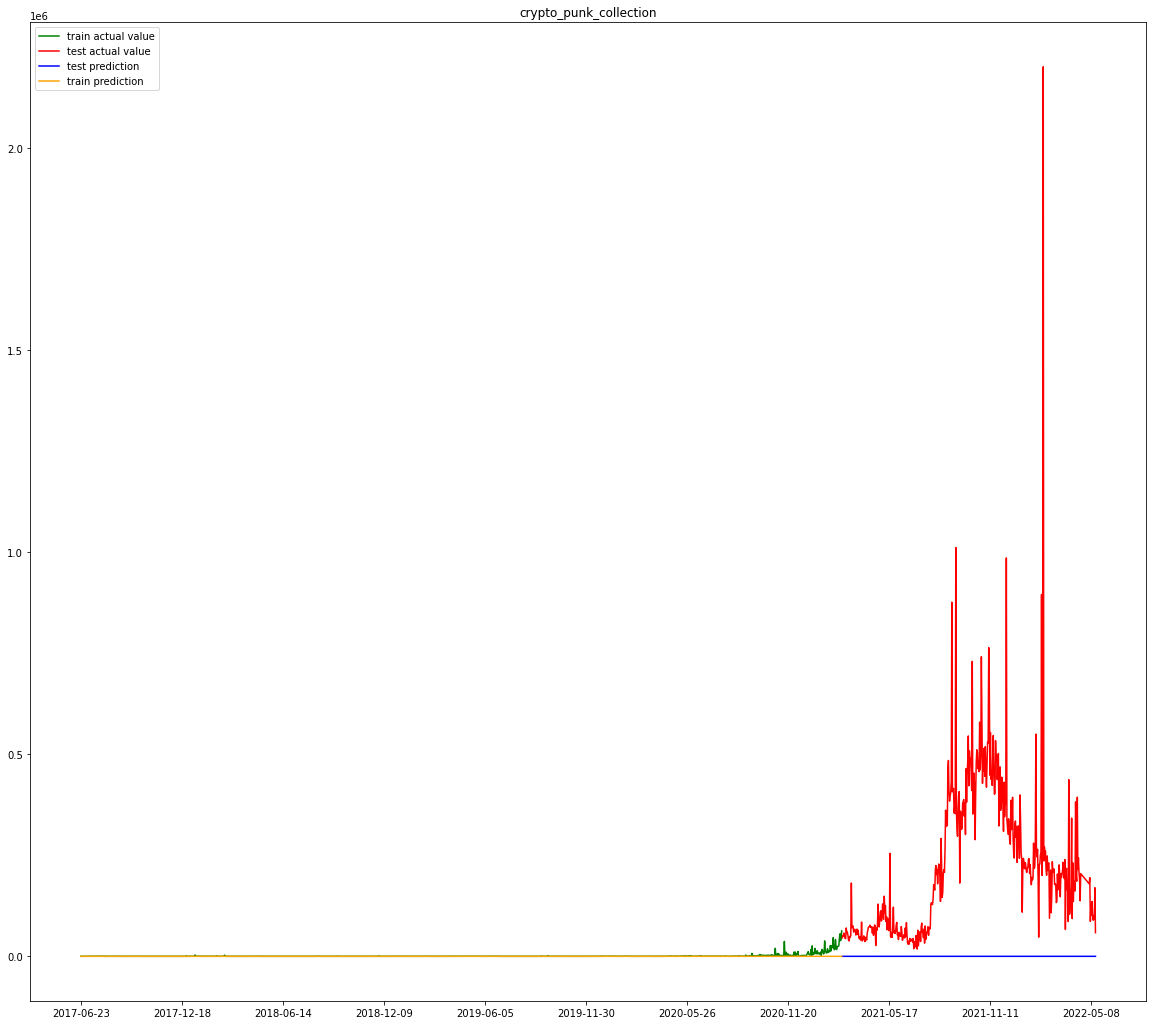

RMSE: 10890.41082289882
Coefficient of Determination: -1.0595202531951782


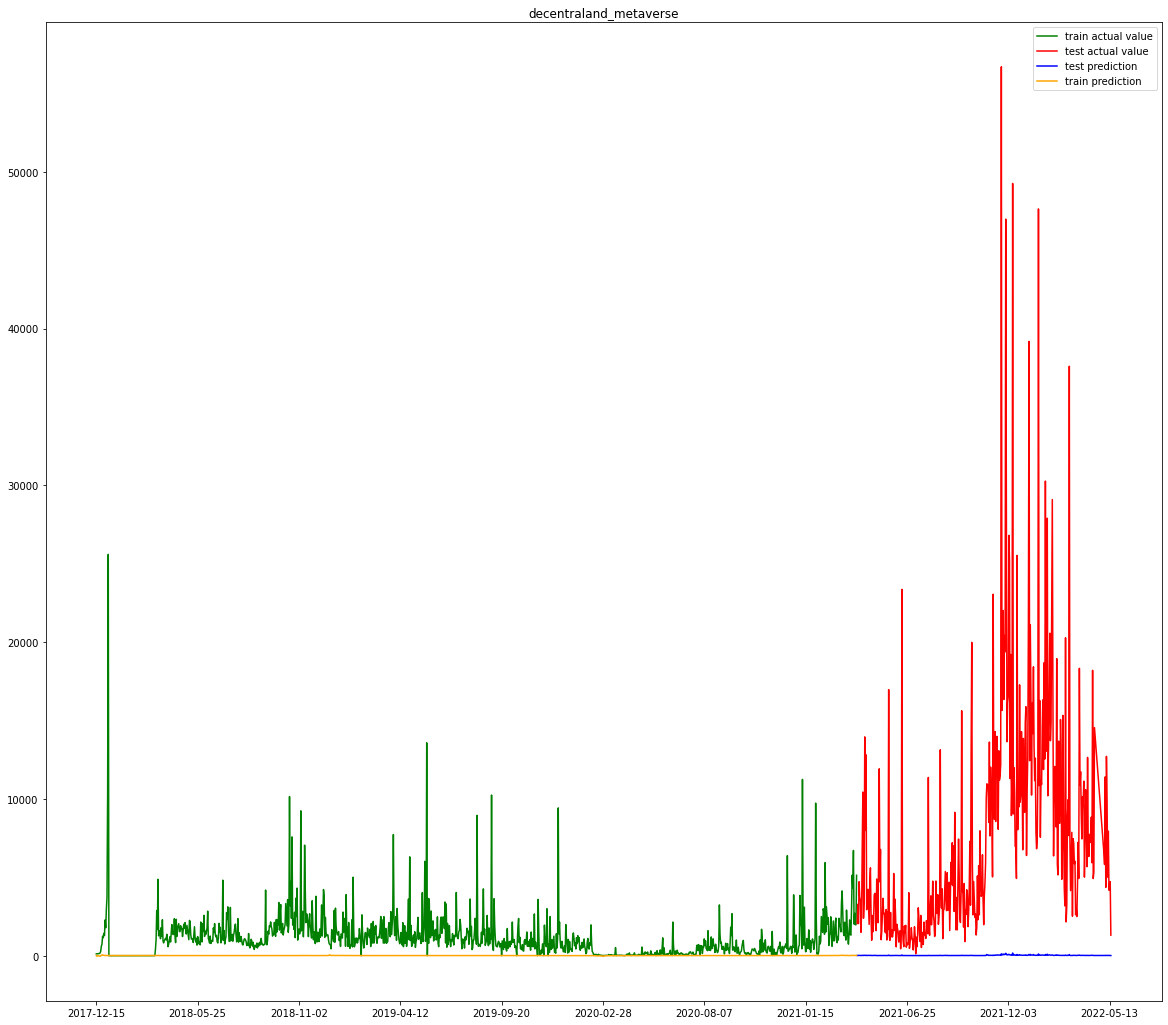

RMSE: 44565.40808295746
Coefficient of Determination: -0.26721774199726855


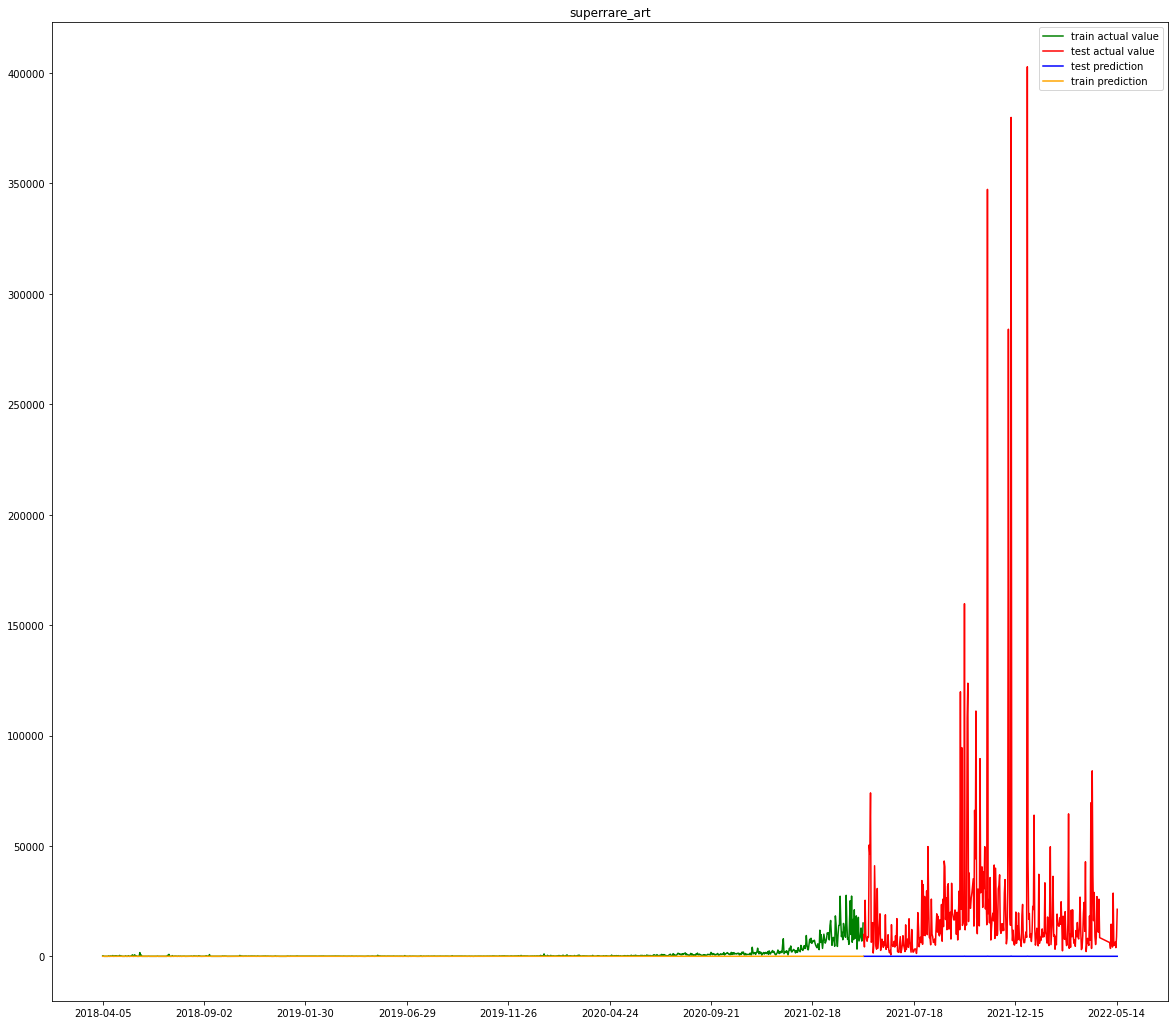

RMSE: 10230.06454879531
Coefficient of Determination: -4.306920908521693


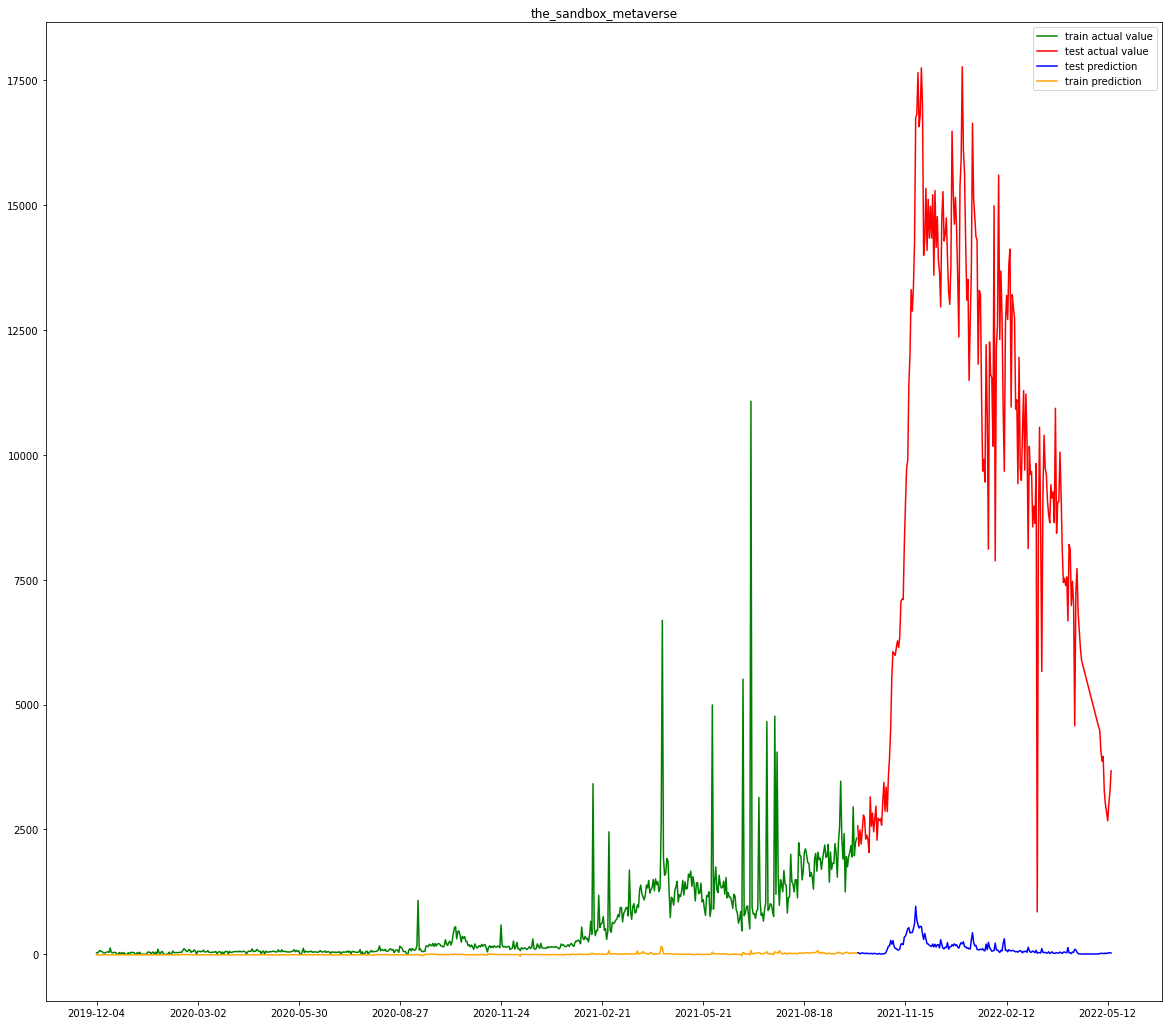

In [20]:
for i in range(n):

  a = Y_train[i].copy()
  b = Y_test[i].copy()
  inversed_Y = std_scaler_list[i].inverse_transform(std_X_test[i].join(std_Y_pred[i]))
  inversed_Y_train = std_scaler_list[i].inverse_transform(std_X_train[i].join(std_Y_pred_train[i]))
  result = pd.DataFrame(inversed_Y[:,[4]], columns=std_Y_pred[i].columns, index=list(std_Y_pred[i].index.values))
  result2 = pd.DataFrame(inversed_Y_train[:,[4]], columns=std_Y_pred_train[i].columns, index=list(std_Y_pred_train[i].index.values))
  fig, ax = plt.subplots(figsize=(20,18))
  print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],result)))
  print('Coefficient of Determination:',r2_score(Y_test[i],result))
  ax.plot(a,label='train actual value',color='g')
  ax.plot(b,label='test actual value',color='r')
  ax.plot(result,label='test prediction',color='b')
  ax.plot(result2,label='train prediction',color='orange')
  plt.xticks(range(0,len(original_dataset[i].index),len(original_dataset[i].index)//10))
  plt.legend()
  plt.title(urllist_name[i])
  plt.show()

RMSE: 2820.257206777646
Coefficient of Determination: -1.2889770887137226


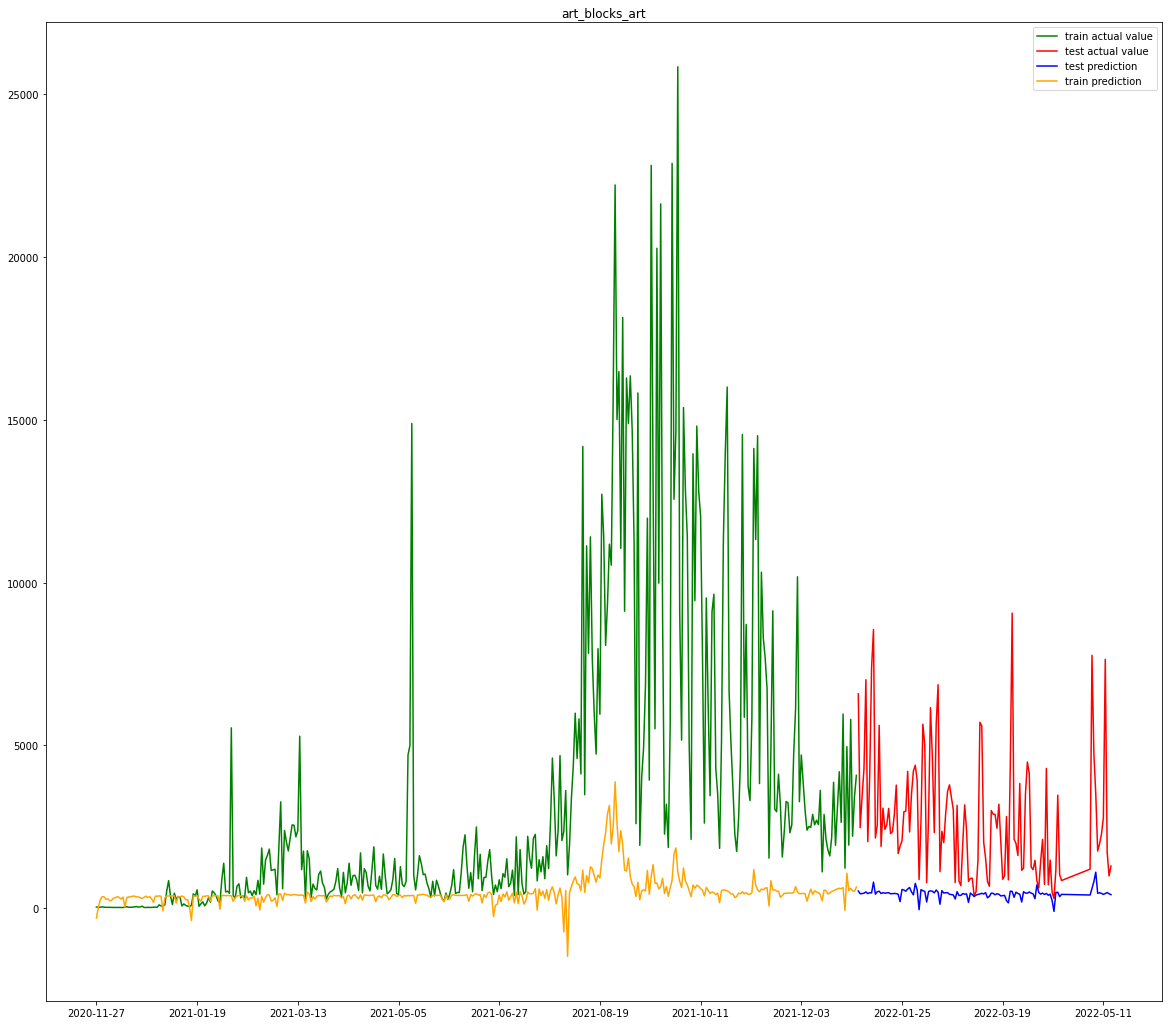

RMSE: 138987.22647386804
Coefficient of Determination: -1968459.372648347


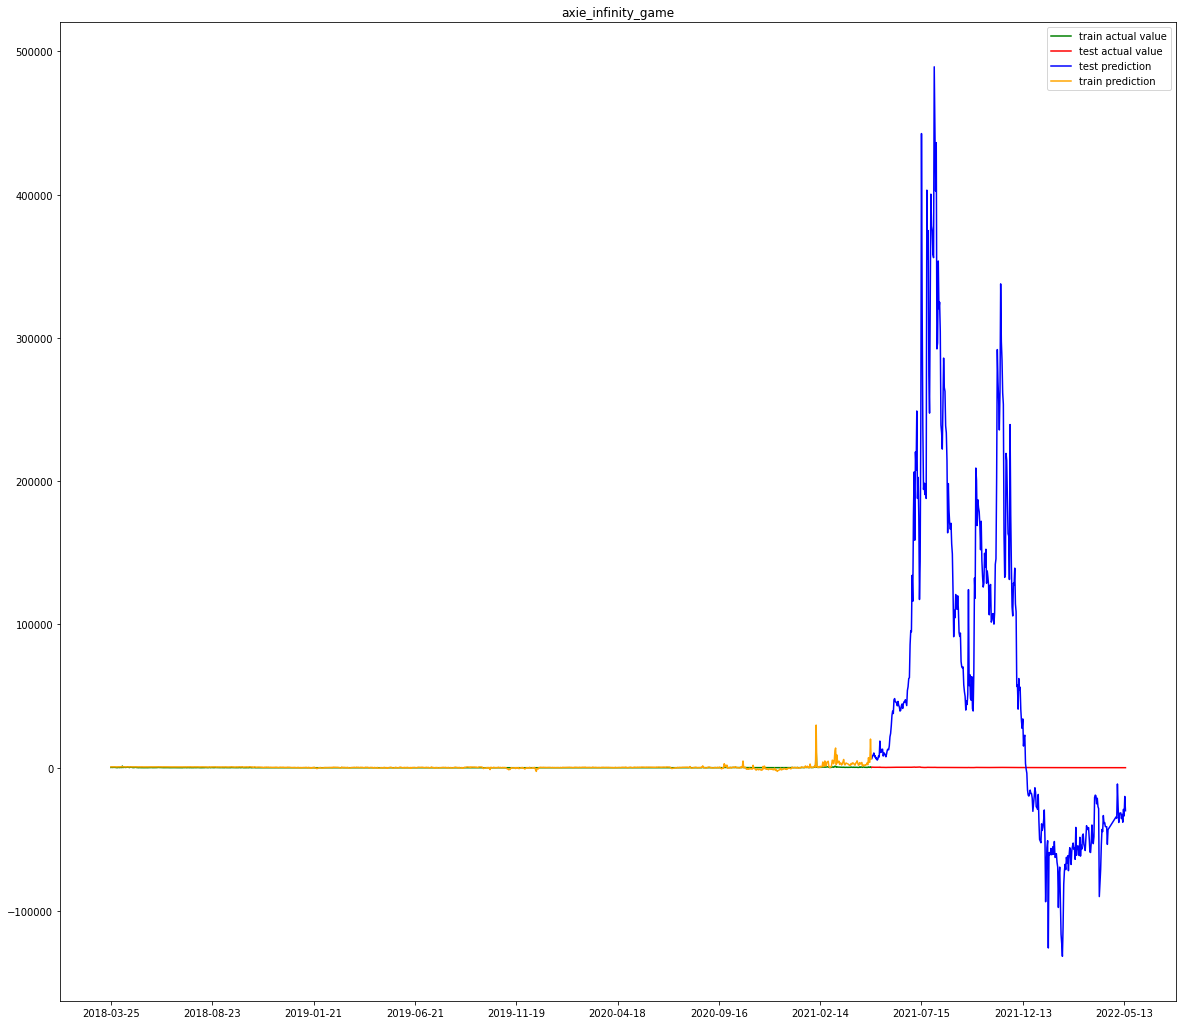

RMSE: 85526.85466676218
Coefficient of Determination: -17.296714131748022


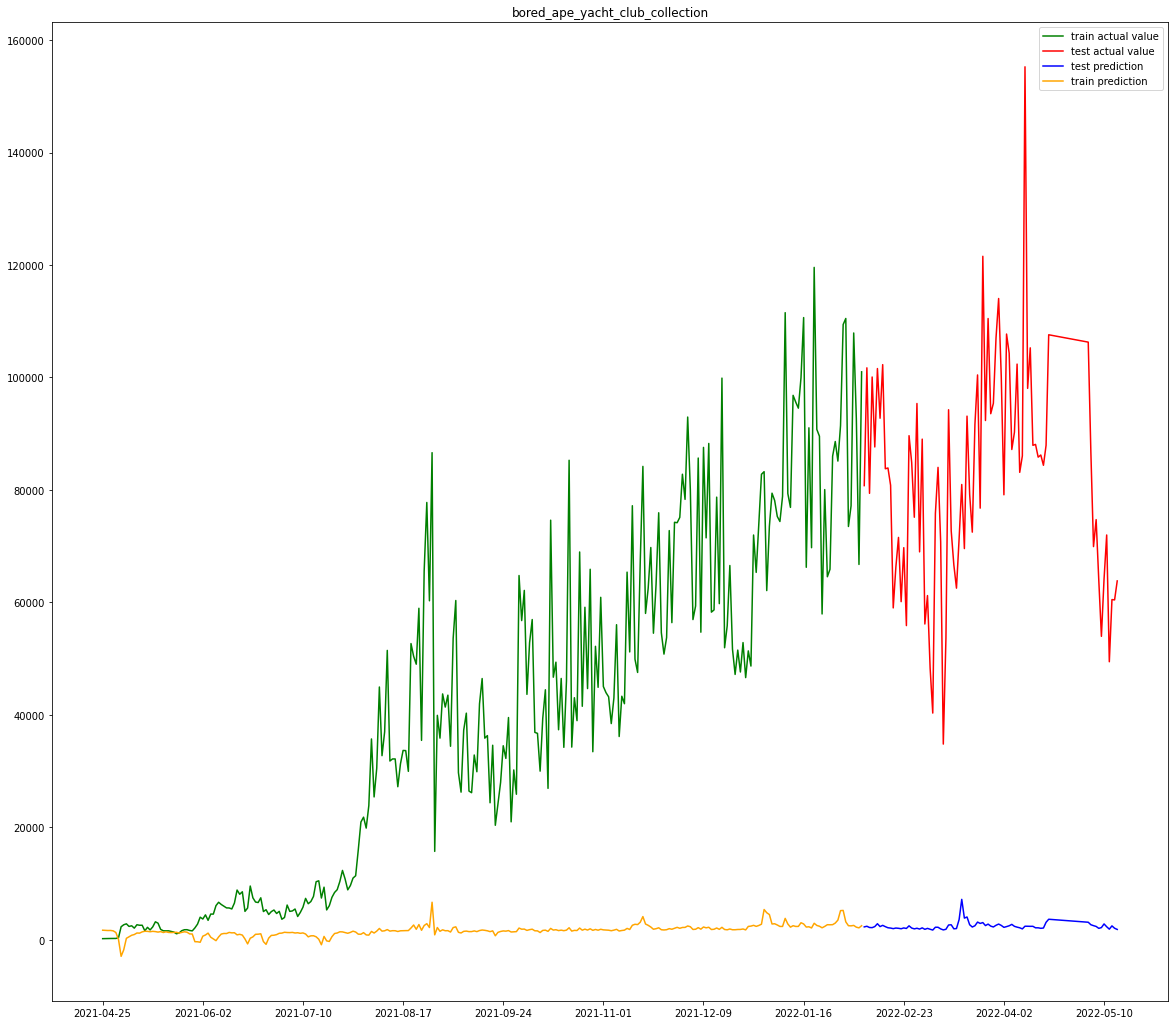

RMSE: 627.4735641930355
Coefficient of Determination: -1.6981240772808004


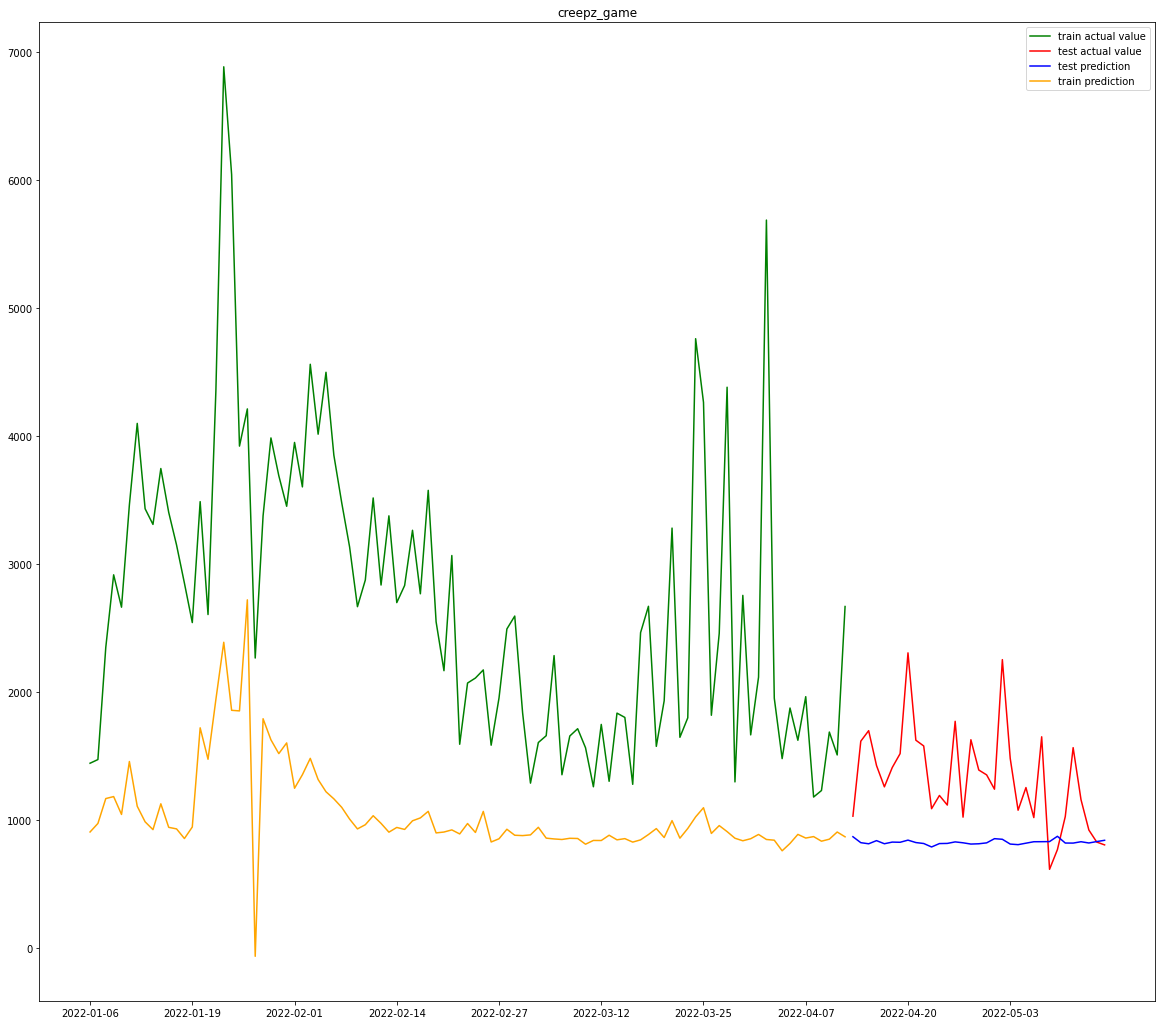

RMSE: 296090.13974265225
Coefficient of Determination: -1.3429398012269127


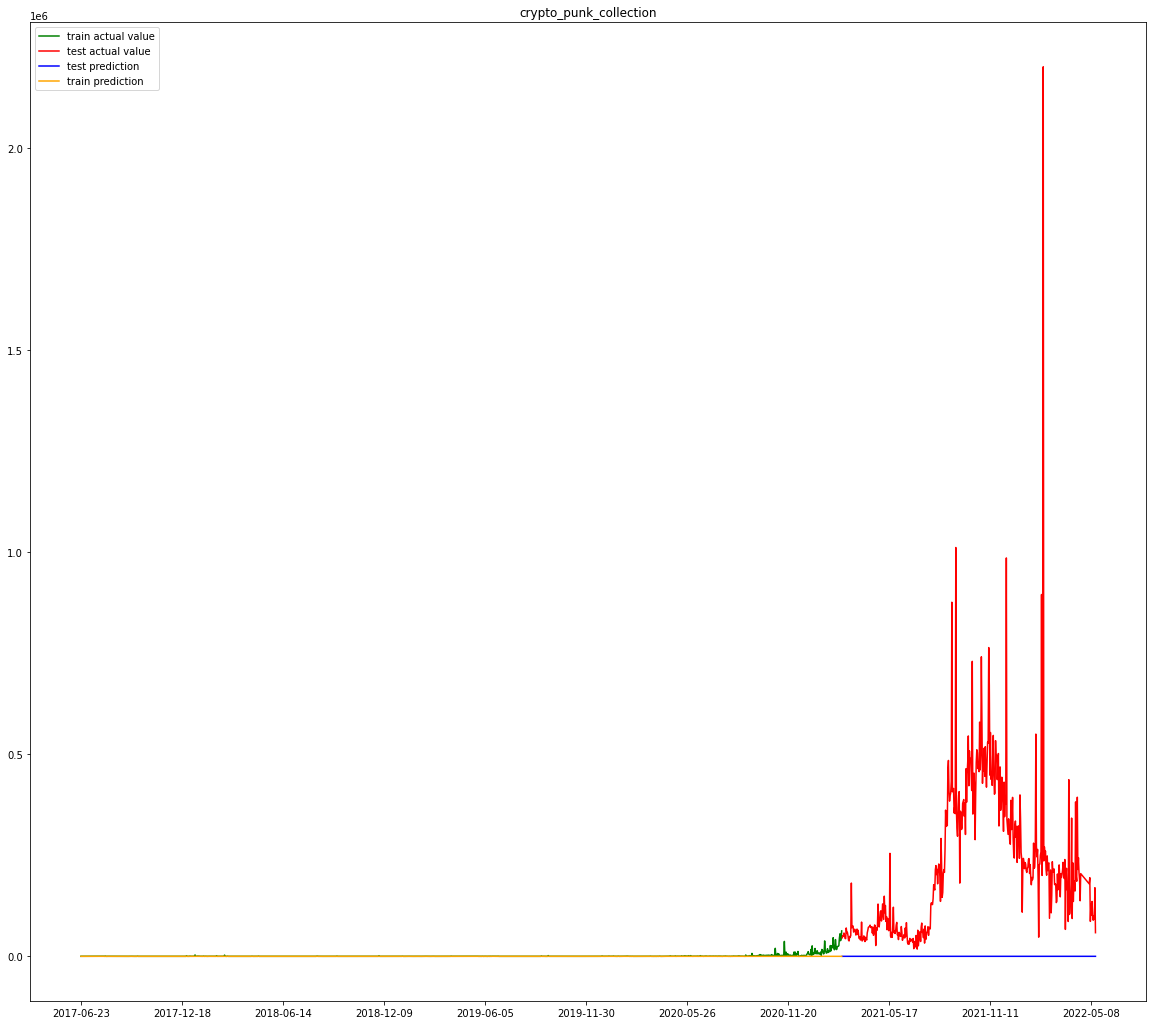

RMSE: 10860.278969929723
Coefficient of Determination: -1.0481393582346965


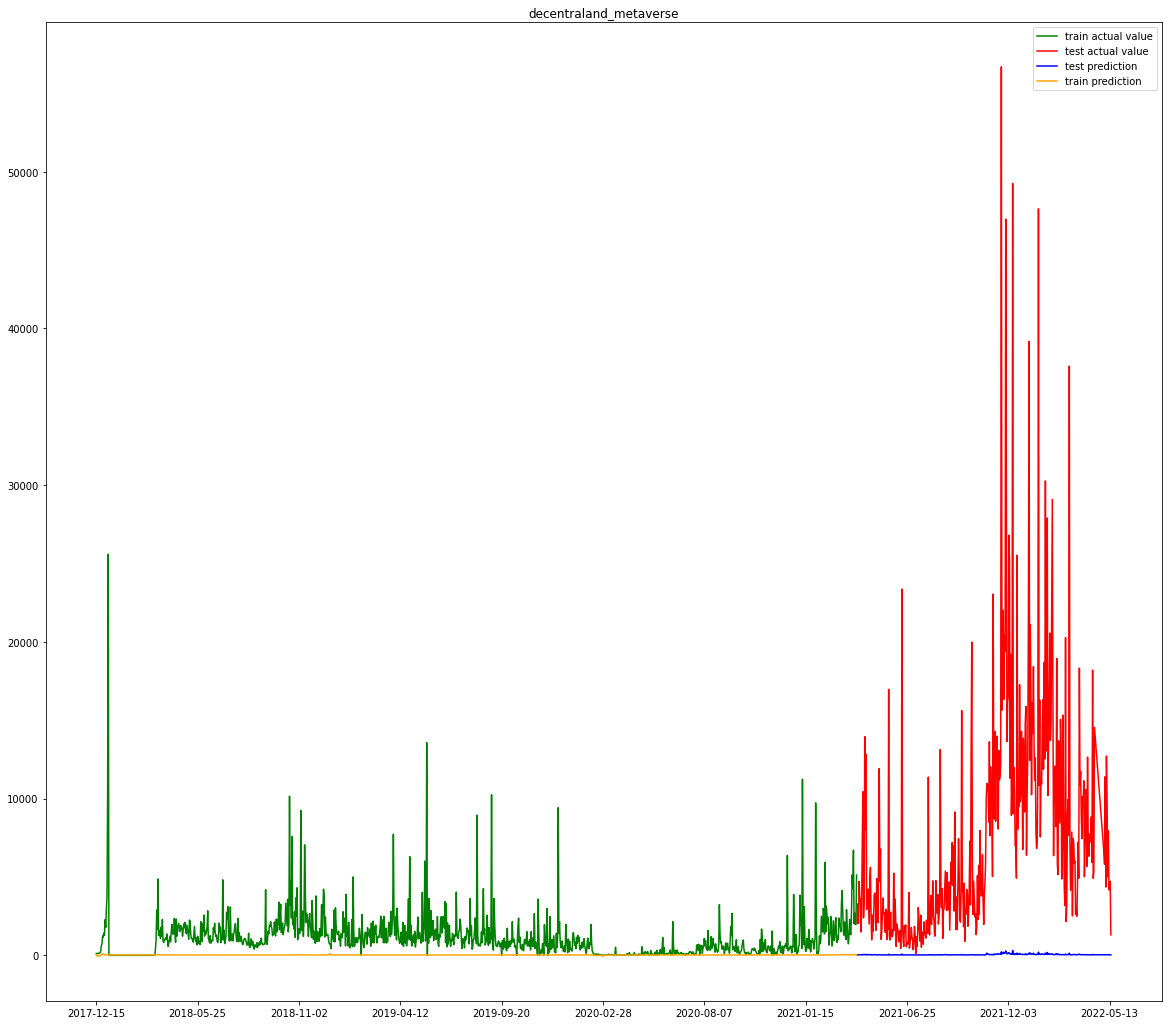

RMSE: 44574.994231627126
Coefficient of Determination: -0.26776296506157093


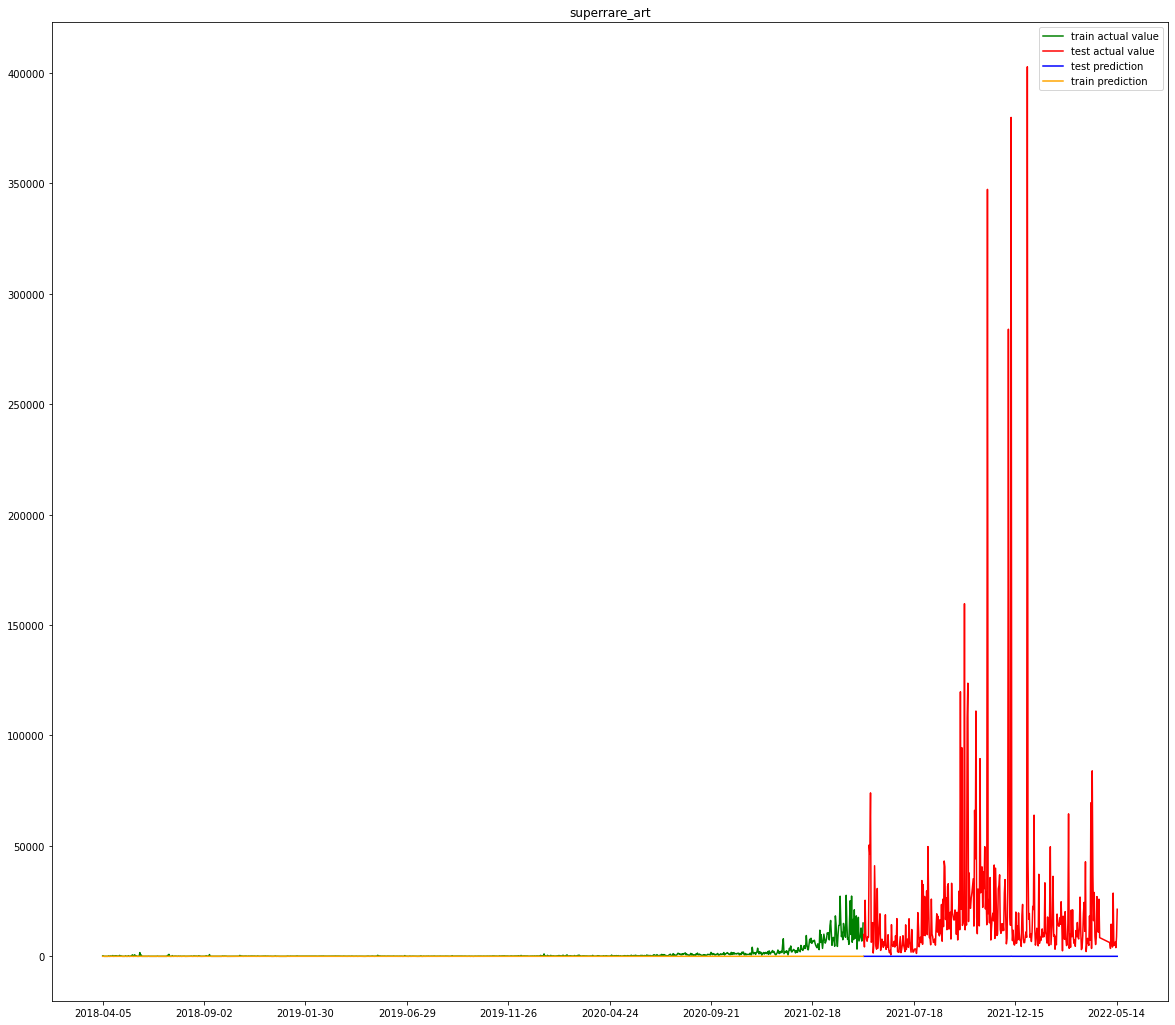

RMSE: 10060.452001559093
Coefficient of Determination: -4.132404226691835


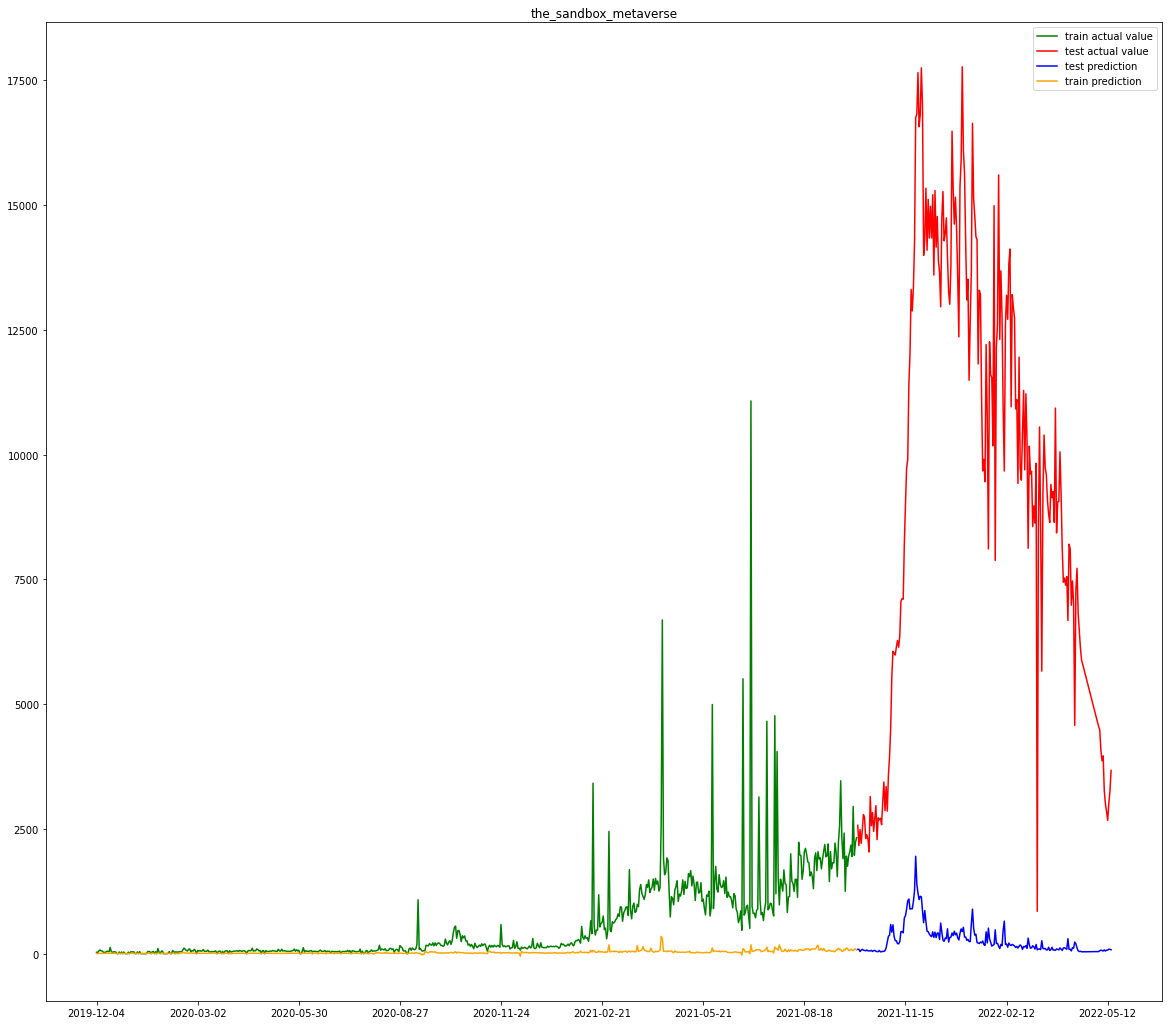

In [21]:
for i in range(n):
  a = Y_train[i].copy()
  b = Y_test[i].copy()
  inversed_Y = minmax_scaler_list[i].inverse_transform(minmax_X_test[i].join(minmax_Y_pred[i]))
  inversed_Y_train = minmax_scaler_list[i].inverse_transform(minmax_X_train[i].join(minmax_Y_pred_train[i]))
  result = pd.DataFrame(inversed_Y[:,[4]], columns=minmax_Y_pred[i].columns, index=list(minmax_Y_pred[i].index.values))
  result2 = pd.DataFrame(inversed_Y_train[:,[4]], columns=minmax_Y_pred_train[i].columns, index=list(minmax_Y_pred_train[i].index.values))
  fig, ax = plt.subplots(figsize=(20,18))
  print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],result)))
  print('Coefficient of Determination:',r2_score(Y_test[i],result))
  ax.plot(a,label='train actual value',color='g')
  ax.plot(b,label='test actual value',color='r')
  ax.plot(result,label='test prediction',color='b')
  ax.plot(result2,label='train prediction',color='orange')
  plt.xticks(range(0,len(original_dataset[i].index),len(original_dataset[i].index)//10))
  plt.legend()
  plt.title(urllist_name[i])
  plt.show()

Best alpha using built-in LassoCV: 0.044713
Best score using built-in LassoCV: 0.247643
0.3866074546353733
Lasso picked 2 variables and eliminated the other 2 variables


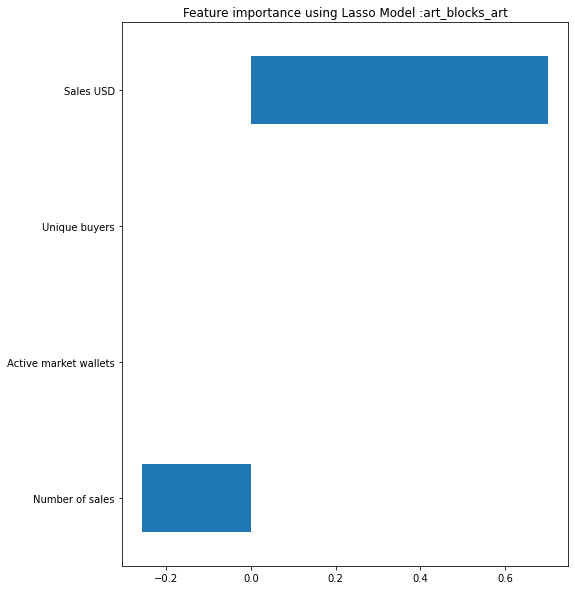

Best alpha using built-in LassoCV: 0.000024
Best score using built-in LassoCV: -65877.986719
74.42240284600781
Lasso picked 4 variables and eliminated the other 0 variables


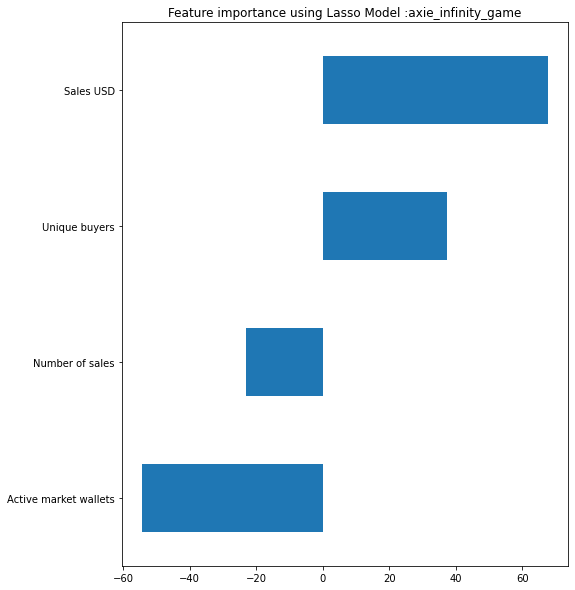

Best alpha using built-in LassoCV: 0.018610
Best score using built-in LassoCV: -2.012830
0.9942728025289529
Lasso picked 4 variables and eliminated the other 0 variables


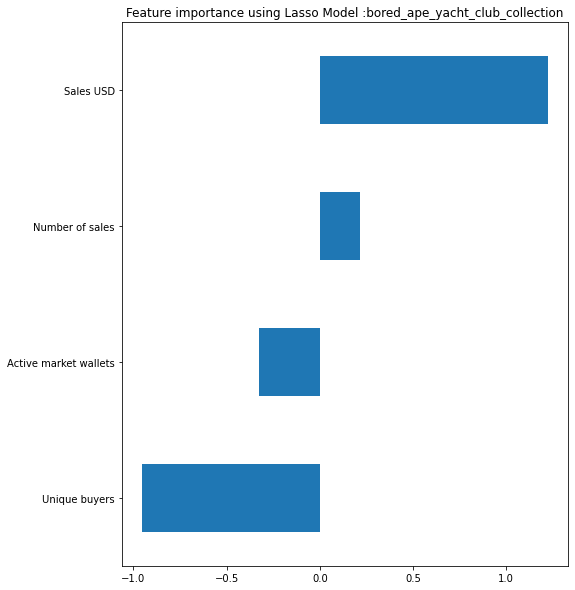

Best alpha using built-in LassoCV: 0.027381
Best score using built-in LassoCV: -8.060406
0.9851778559831669
Lasso picked 3 variables and eliminated the other 1 variables


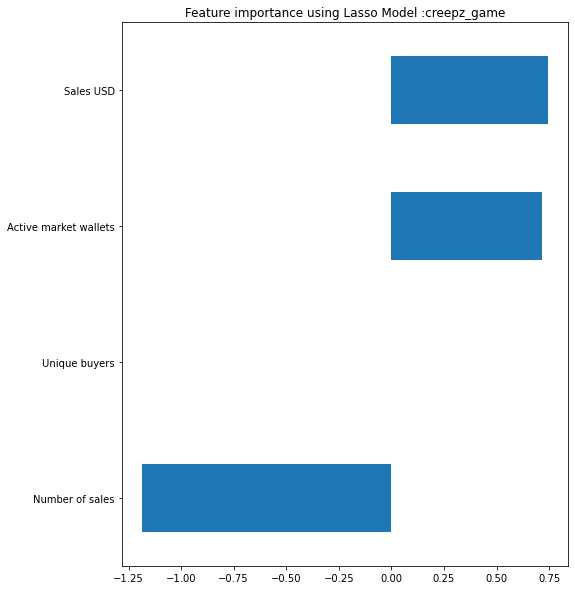

Best alpha using built-in LassoCV: 0.000013
Best score using built-in LassoCV: -1.016753
2.0088953548496526
Lasso picked 4 variables and eliminated the other 0 variables


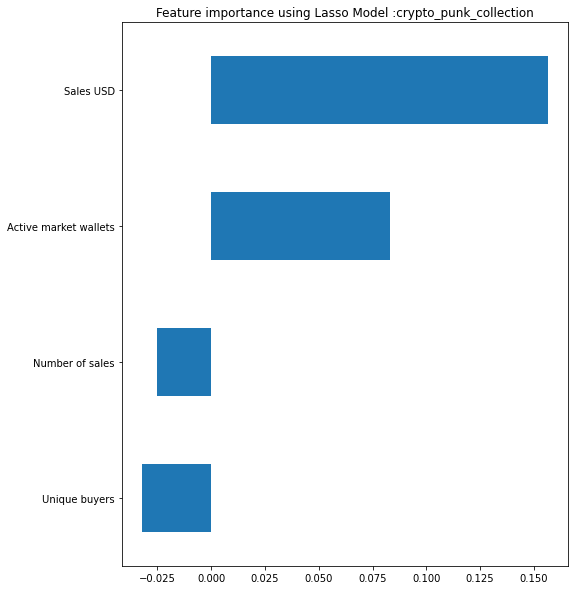

Best alpha using built-in LassoCV: 0.006952
Best score using built-in LassoCV: -0.376239
1.7958289867428612
Lasso picked 3 variables and eliminated the other 1 variables


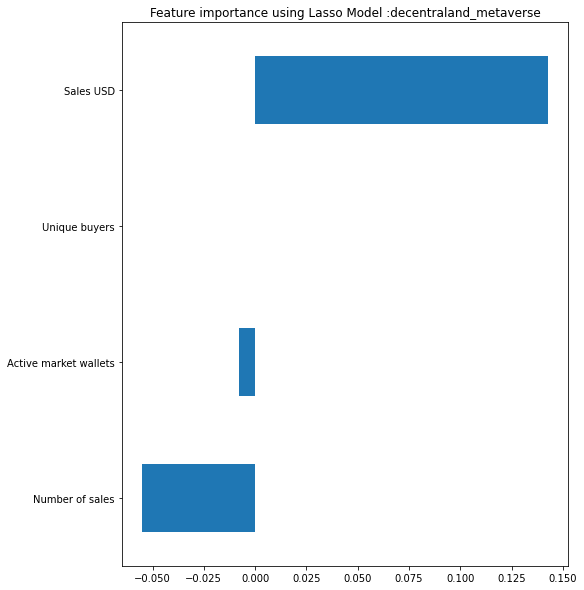

Best alpha using built-in LassoCV: 0.000094
Best score using built-in LassoCV: 0.360136
1.4610180386639386
Lasso picked 4 variables and eliminated the other 0 variables


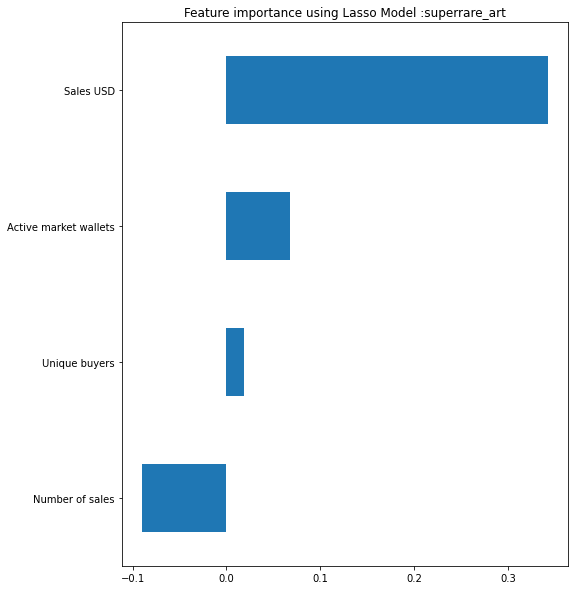

Best alpha using built-in LassoCV: 0.000275
Best score using built-in LassoCV: -1.025302
1.4102538333087131
Lasso picked 4 variables and eliminated the other 0 variables


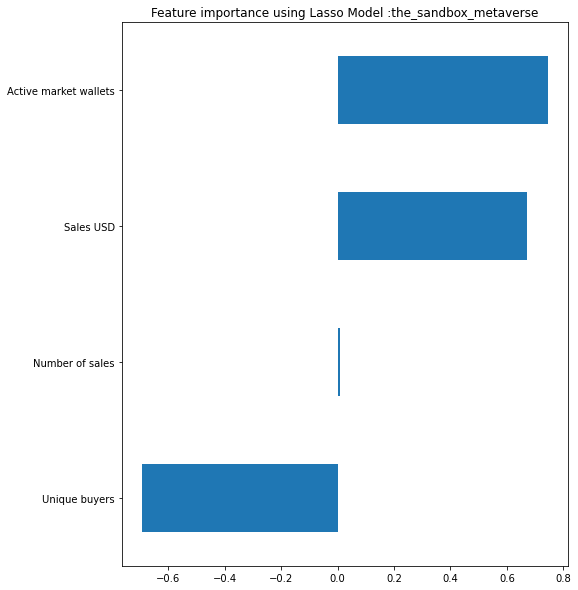

In [22]:
import matplotlib
import warnings
warnings.filterwarnings('ignore')
#lienar regression + Lasso
# from sklearn.linear_model import Lasso
std_Y_pred_Lasso = []
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
for i in range(n):
  reg = LassoCV()
  reg.fit(std_X_train[i],std_Y_train[i])
  print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
  print("Best score using built-in LassoCV: %f" %reg.score(std_X_test[i],std_Y_test[i]))
  print(np.sqrt(mean_squared_error(std_Y_test[i],reg.predict(std_X_test[i]))))
  coef = pd.Series(reg.coef_, index = std_X_test[i].columns)
  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  imp_coef = coef.sort_values()
  matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using Lasso Model :"+urllist_name[i])
  plt.show()
  pred = reg.predict(std_X_test[i])
  std_Y_pred_Lasso.append(pd.DataFrame(pred, columns=std_Y_test[i].columns, index=list(std_Y_test[i].index.values)))


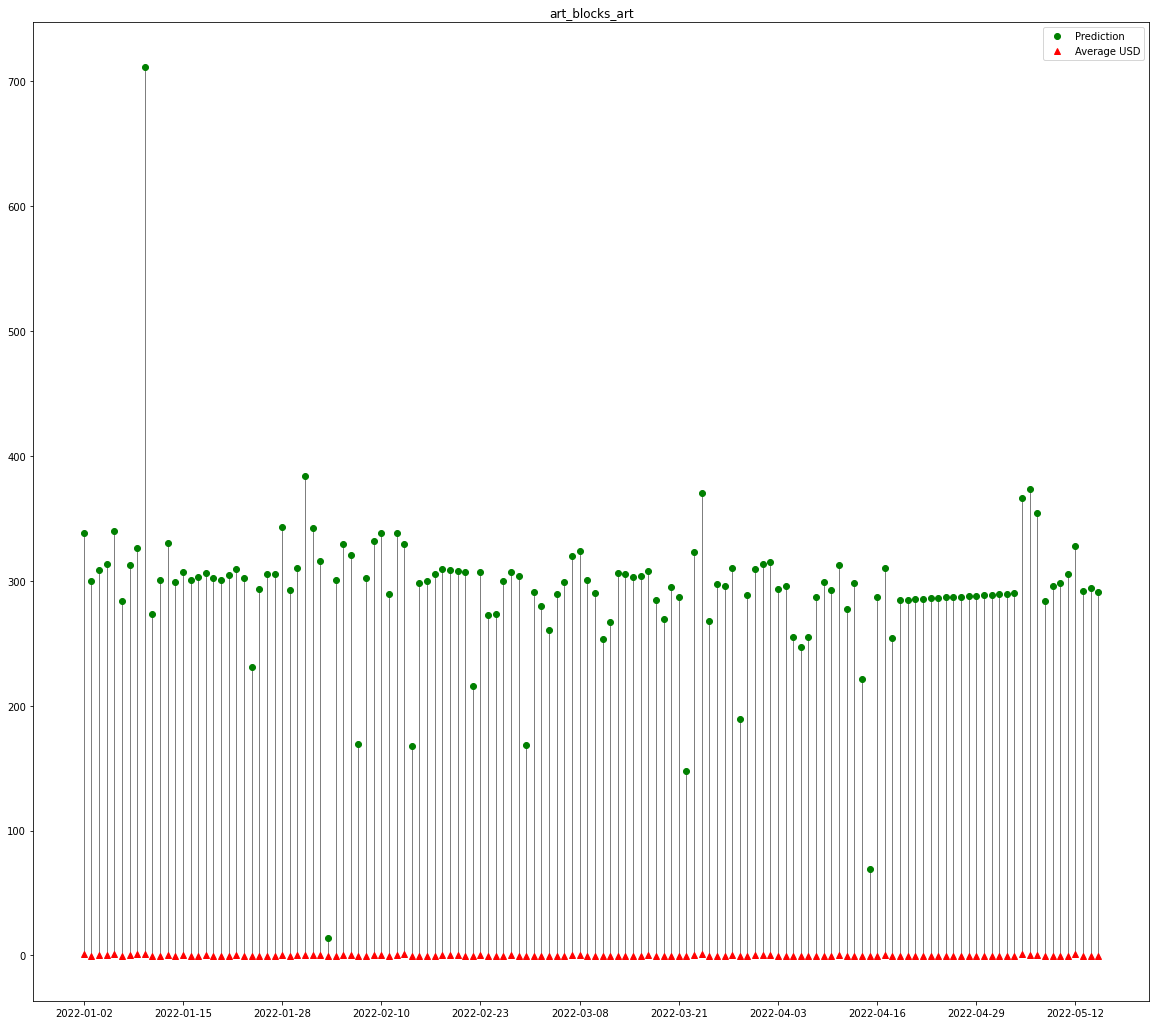

RMSE: 2948.0392880561258
Coefficient of Determination: -1.5010970519546292


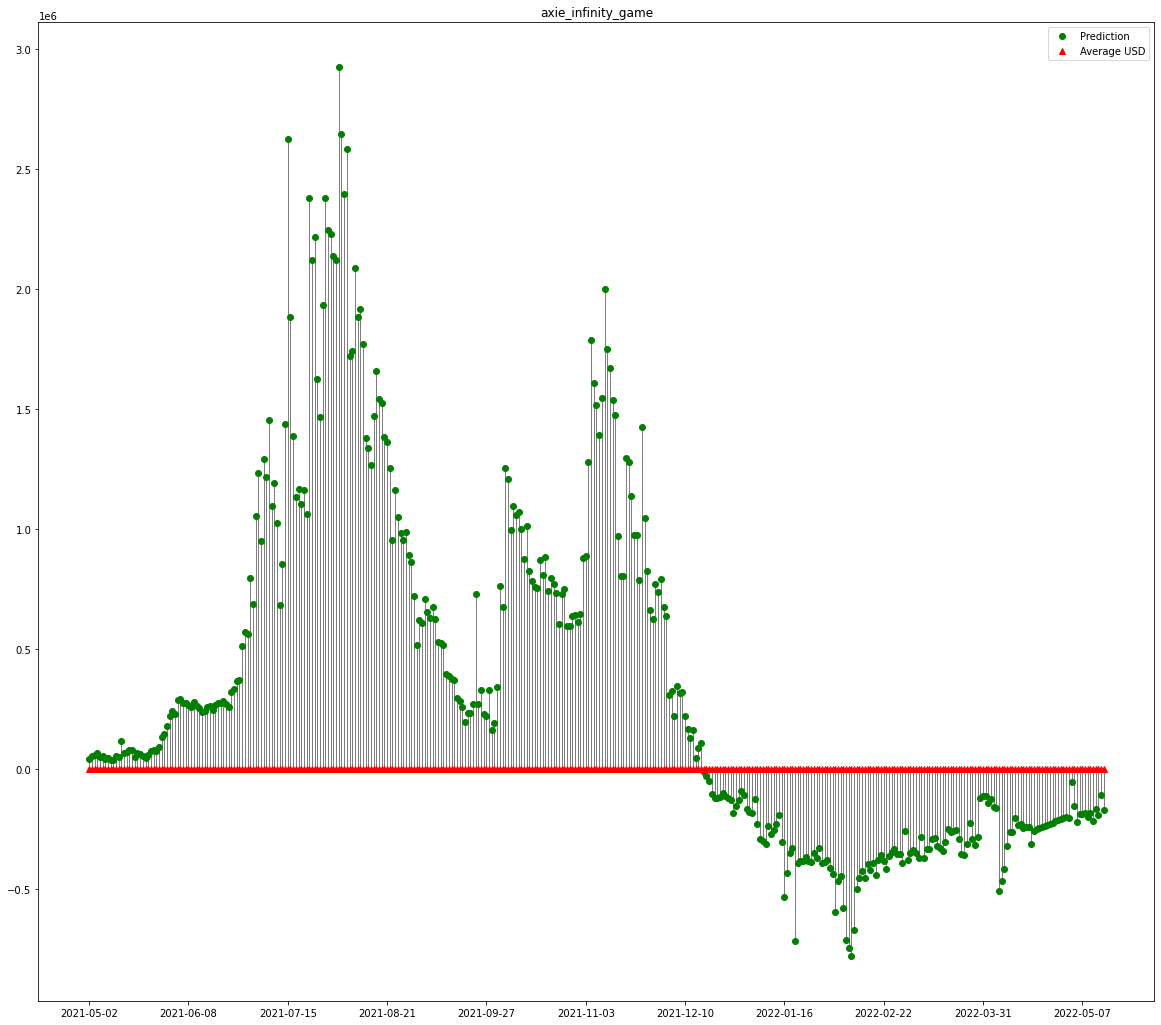

RMSE: 820674.4236579394
Coefficient of Determination: -68630741.41970691


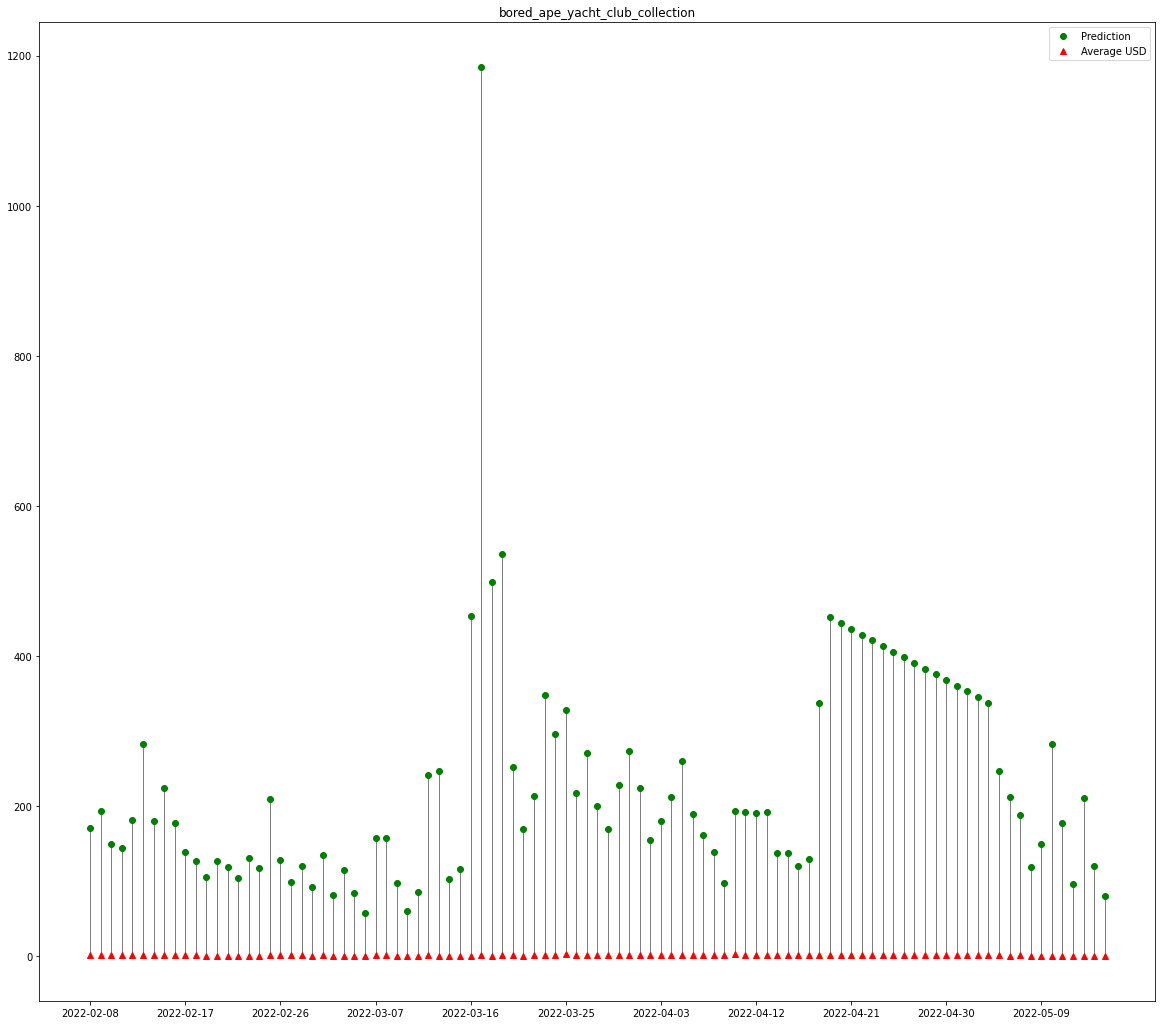

RMSE: 87845.79759164495
Coefficient of Determination: -18.302345366520786


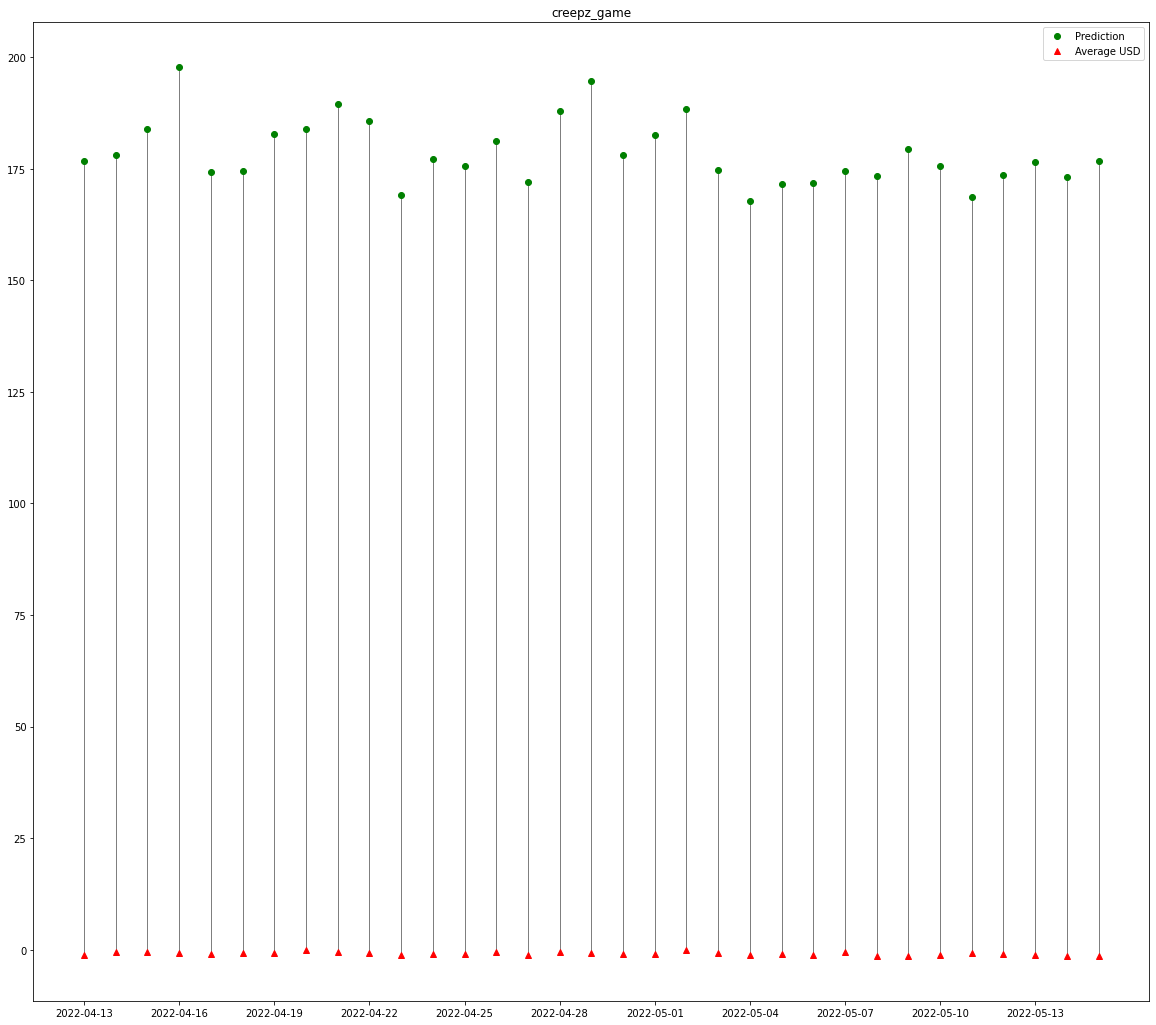

RMSE: 1207.5182107935348
Coefficient of Determination: -8.992138125017439


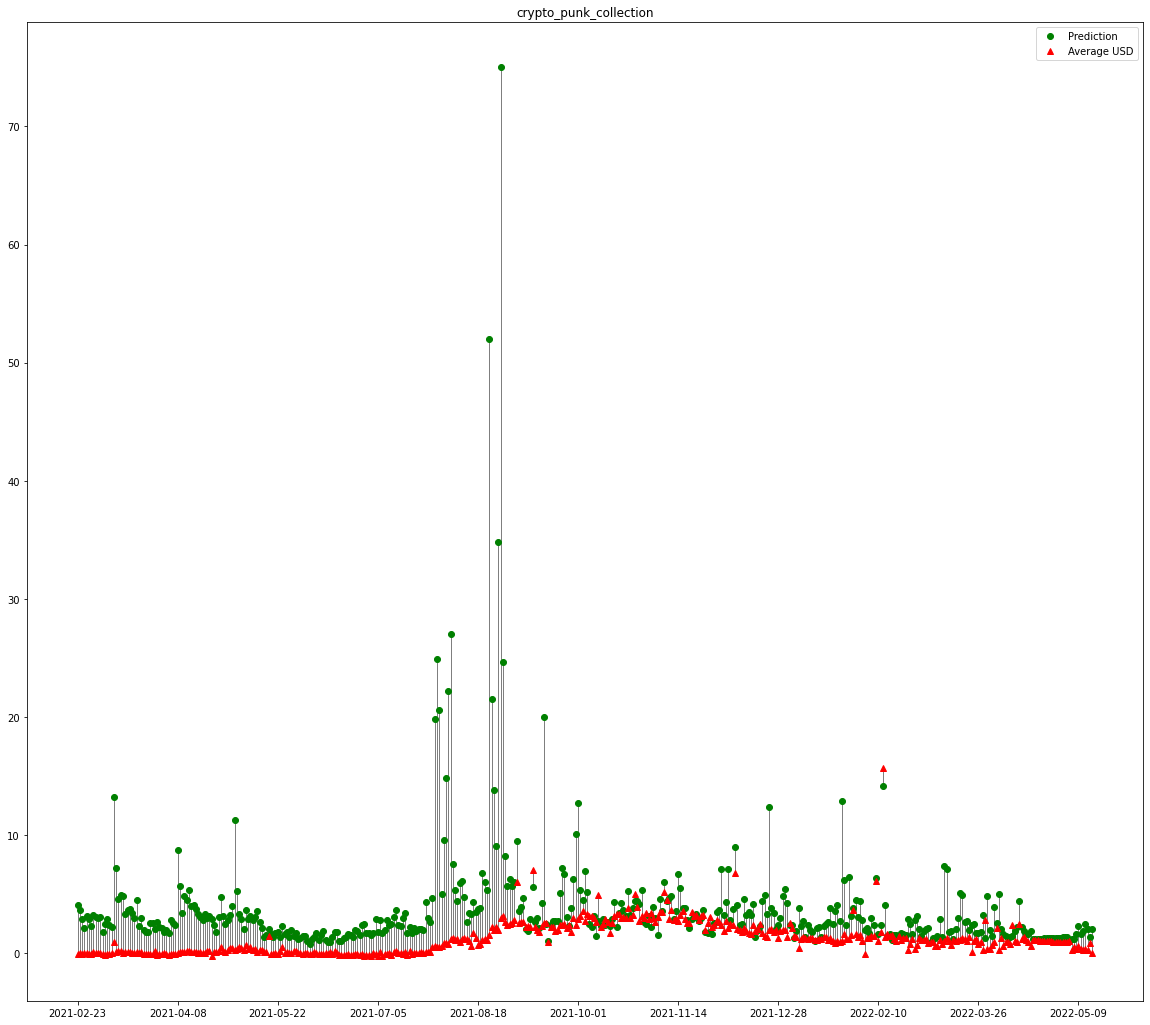

RMSE: 296089.45592531824
Coefficient of Determination: -1.3429289792454715


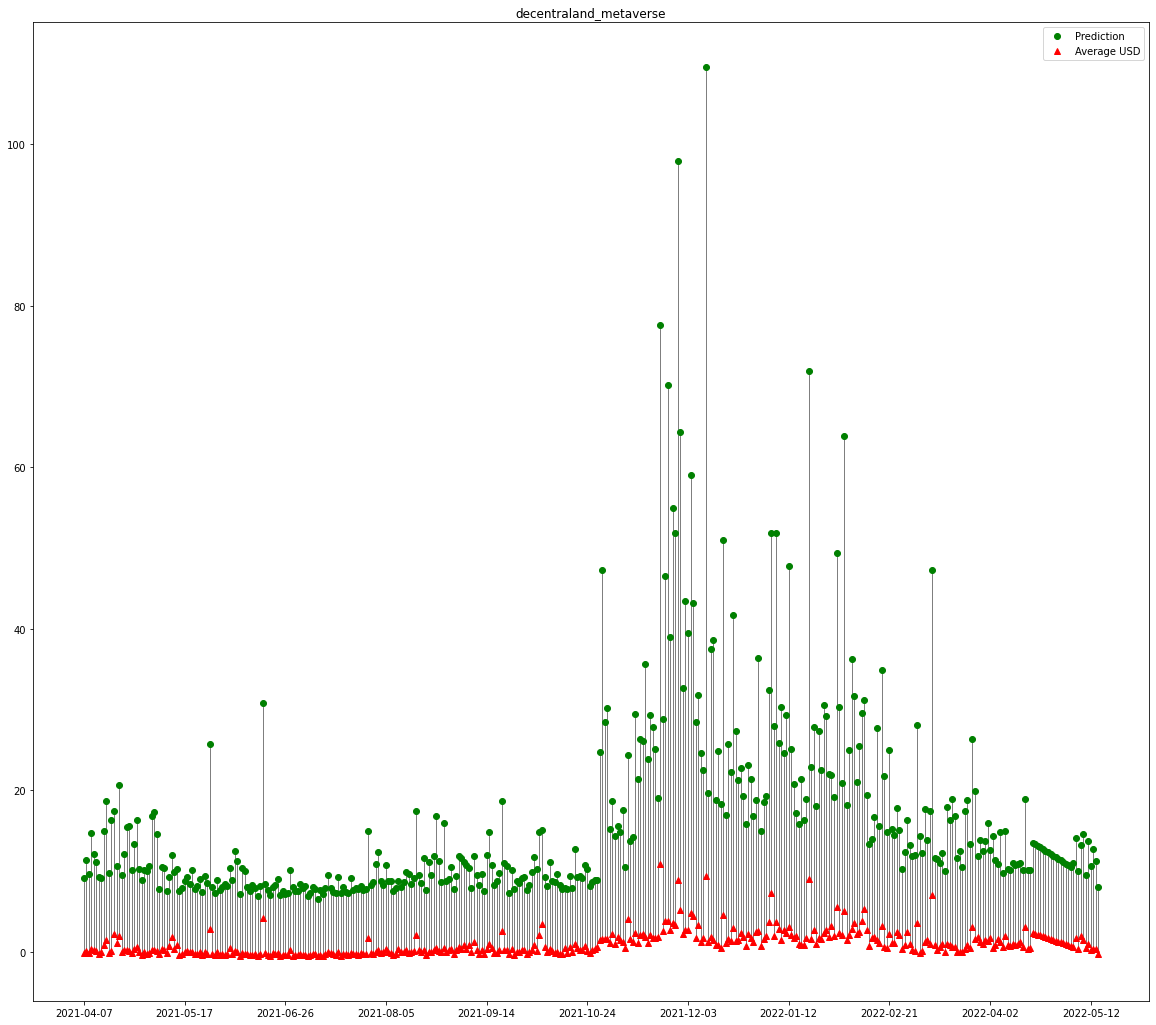

RMSE: 10898.906041804392
Coefficient of Determination: -1.0627346221857423


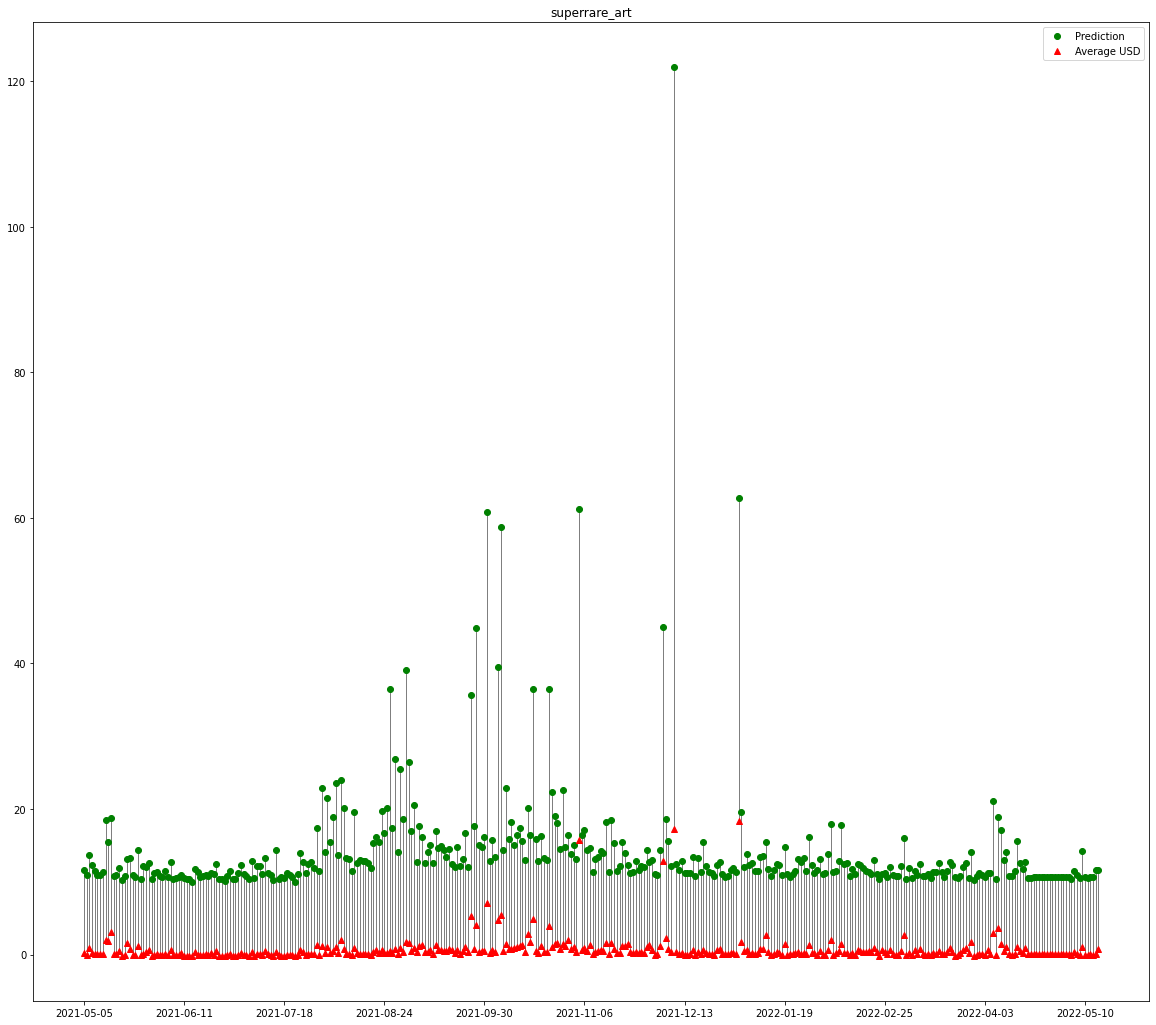

RMSE: 44565.440518897885
Coefficient of Determination: -0.26721958663040013


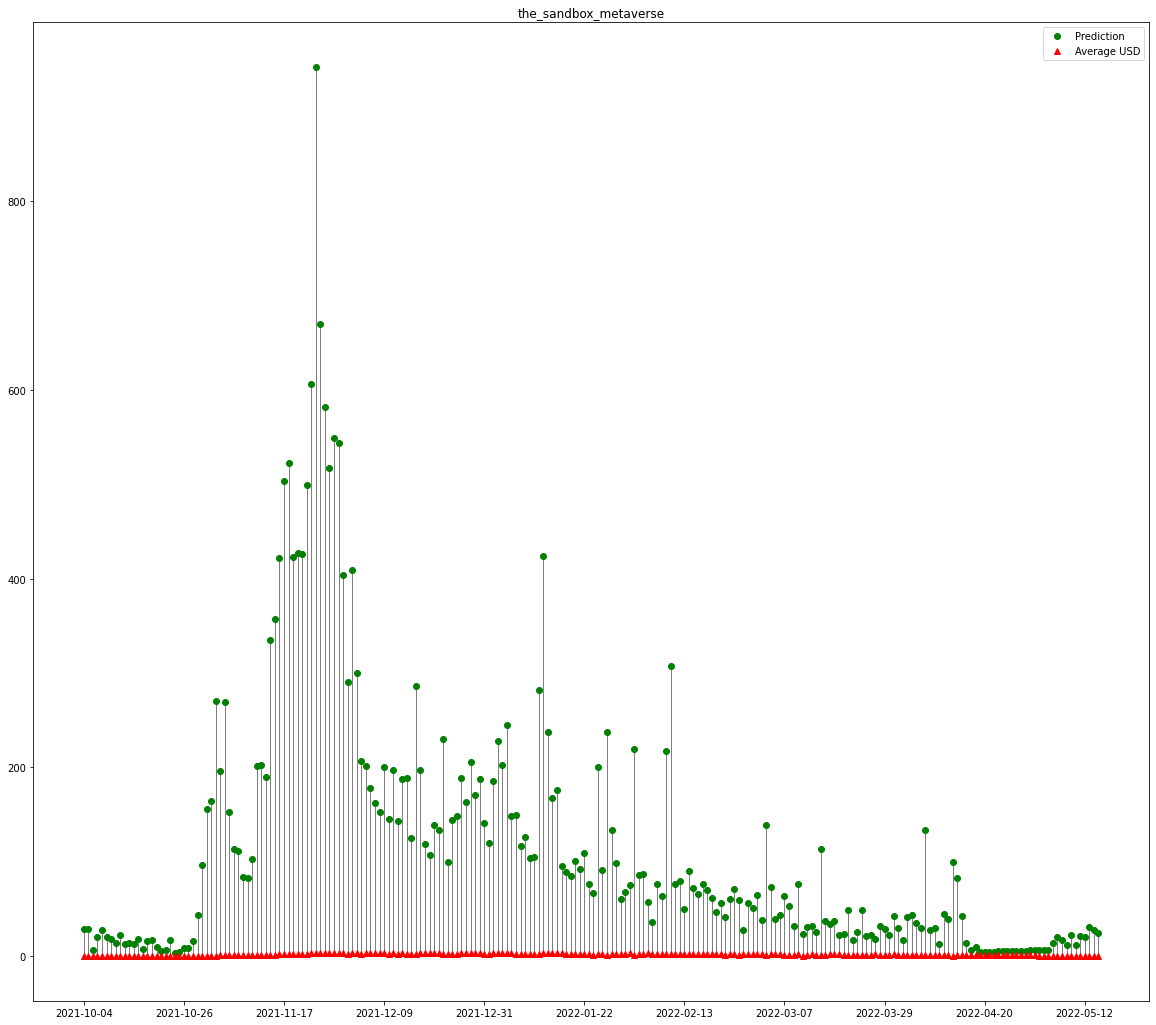

RMSE: 10232.922291236082
Coefficient of Determination: -4.30988627228912


In [23]:
for i in range(n):
  inversed_Y = std_scaler_list[i].inverse_transform(std_X_test[i].join(std_Y_pred_Lasso[i]))
  result = pd.DataFrame(inversed_Y[:,[4]], columns=std_Y_pred_Lasso[i].columns, index=list(std_Y_pred_Lasso[i].index.values))
  result.rename(columns = {'Average USD' : 'predict Average USD'}, inplace = True)
  fig, ax = plt.subplots(figsize=(20,18))
  for j in range(len(result.index)):
    ax.plot([j,j],[result.iloc[j], std_Y_test[i][['Average USD']].iloc[j]], c="k", linewidth=0.5)
  ax.plot(result,'o', label='Prediction', color = 'g')
  ax.plot(std_Y_test[i][['Average USD']],'^', label='Average USD', color = 'r' )
  plt.xticks(range(0,len(result.index),len(result.index)//10))
  plt.legend()
  plt.title(urllist_name[i])
  plt.show()
  print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],result)))
  print('Coefficient of Determination:',r2_score(Y_test[i],result))


In [24]:
std_extended_dataset = []
std_extended_scaler = []
for i in range(n):
  print(extended_dataset[i])
  scaler = StandardScaler()
  std = scaler.fit_transform(extended_dataset[i])
  std_extended_dataset.append(pd.DataFrame(std,columns=extended_dataset[i].columns,index=list(extended_dataset[i].index.values)))
  std_extended_scaler.append(scaler)


            Number of sales  Average USD  Sales USD  Active market wallets  \
2020-11-27           1577.0        32.21   50793.59                  111.0   
2020-11-28            923.0        23.80   21966.60                  184.0   
2020-11-29            324.0        25.57    8285.57                   74.0   
2020-11-30             63.0        39.63    2496.48                   22.0   
2020-12-01             80.0        26.13    2090.09                   20.0   
...                     ...          ...        ...                    ...   
2022-05-11             70.0      2778.43  194489.85                   94.0   
2022-05-12            103.0      7644.51  787384.88                  130.0   
2022-05-13            236.0      1721.54  406283.95                  280.0   
2022-05-14            133.0       986.94  131262.68                  170.0   
2022-05-15            190.0      1292.45  245566.45                  177.0   

            Unique buyers      ETH    NASDAQ     USD  
2020-11-

In [25]:
# e_X_train = []
# e_Y_train = []
# e_X_test = []
# e_Y_test = []
# for i in range(n):
#   # e_train_x, e_test_x,e_train_y,e_test_y = train_test_split(std_extended_dataset[i].drop(columns = ['Average USD']),std_extended_dataset[i][['Average USD']],test_size=0.25, random_state = 42)
#   e_train_x, e_test_x,e_train_y,e_test_y = train_test_split(std_extended_dataset[i].drop(columns = ['Average USD']),std_extended_dataset[i][['Average USD']],test_size=0.25, shuffle = False)
#   e_Y_train.append(e_train_y.sort_index())
#   e_X_train.append(e_train_x.sort_index())
#   e_Y_test.append(e_test_y.sort_index())
#   e_X_test.append(e_test_x.sort_index())
e_X_train = []
e_Y_train = []
e_X_test = []
e_Y_test = []
for i in range(n):
  # e_train_x, e_test_x,e_train_y,e_test_y = train_test_split(std_extended_dataset[i].drop(columns = ['Average USD']),std_extended_dataset[i][['Average USD']],test_size=0.25, random_state = 42)
  e_train_x, e_test_x,e_train_y,e_test_y = train_test_split(extended_dataset[i].drop(columns = ['Average USD']),extended_dataset[i][['Average USD']],test_size=0.25, shuffle = False)
  e_Y_train.append(e_train_y.sort_index())
  e_X_train.append(e_train_x.sort_index())
  e_Y_test.append(e_test_y.sort_index())
  e_X_test.append(e_test_x.sort_index())
  print(std_extended_scaler[i].inverse_transform(e_X_train[i].join(e_Y_train[i])))

[[1.42428647e+06 2.12544335e+08 8.45373591e+08 ... 1.25043529e+07
  1.05321879e+05 2.04180915e+02]
 [8.33872491e+05 9.19204428e+07 1.39955230e+09 ... 1.25043529e+07
  1.05321879e+05 1.75381408e+02]
 [2.93111061e+05 3.46734290e+07 5.64488492e+08 ... 1.25043529e+07
  1.05321879e+05 1.81442660e+02]
 ...
 [2.74152814e+05 2.79899837e+09 2.80397779e+09 ... 1.61257567e+07
  1.09477343e+05 7.65376749e+03]
 [5.20610027e+05 8.26355262e+09 3.50239479e+09 ... 1.60268257e+07
  1.09477343e+05 1.18347299e+04]
 [4.79985212e+05 9.06503065e+09 4.24636073e+09 ... 1.60268257e+07
  1.09477343e+05 1.40649623e+04]]
[[3.86361633e+05 6.73667201e+05 6.56499743e+07 ... 9.14751552e+06
  2.74092103e+05 6.86064278e+02]
 [4.60328213e+05 1.20838728e+06 9.09160167e+07 ... 9.44556909e+06
  2.72766247e+05 9.78394127e+02]
 [4.97311503e+05 6.36134652e+05 1.09865548e+08 ... 9.16862662e+06
  2.73650151e+05 5.24451272e+02]
 ...
 [7.05806461e+07 4.16989153e+08 6.18634873e+09 ... 1.82642767e+07
  2.79395525e+05 2.01190226e+03]

Best alpha using built-in LassoCV: 1420545063.481934
Best score using built-in LassoCV: 0.139417
1729.275958047487
Lasso picked 1 variables and eliminated the other 6 variables


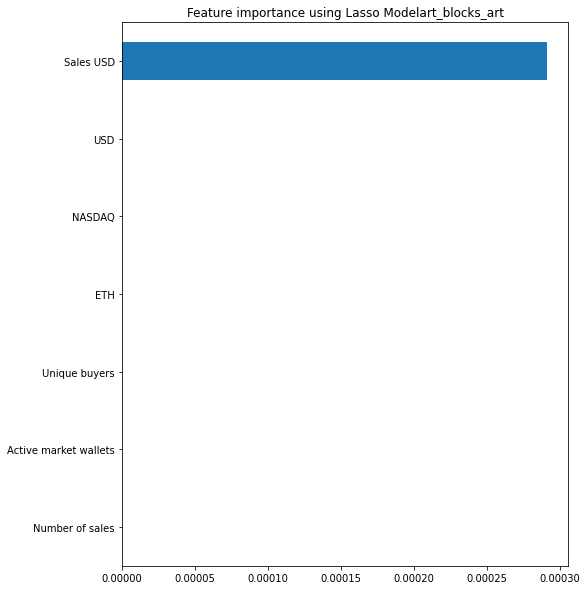

Best alpha using built-in LassoCV: 49035.535694
Best score using built-in LassoCV: -150780.862347
38420.10681044345
Lasso picked 2 variables and eliminated the other 5 variables


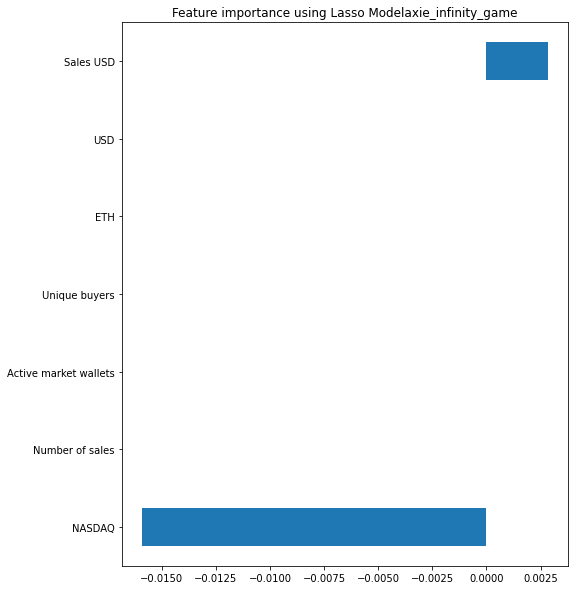

Best alpha using built-in LassoCV: 144588662743.863007
Best score using built-in LassoCV: -5.443885
50756.288240510534
Lasso picked 0 variables and eliminated the other 7 variables


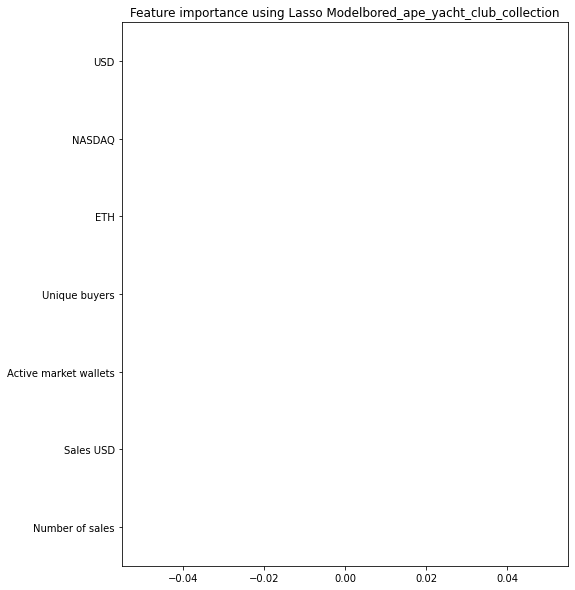

Best alpha using built-in LassoCV: 322724992.544618
Best score using built-in LassoCV: -11.403600
1345.359489072392
Lasso picked 1 variables and eliminated the other 6 variables


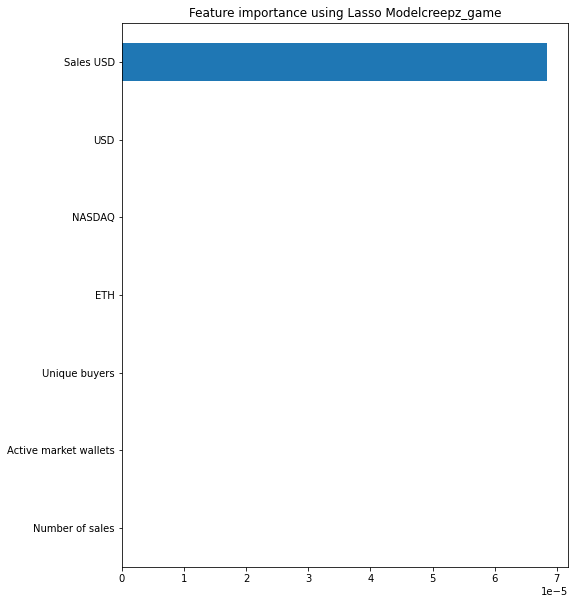

Best alpha using built-in LassoCV: 2009079.305893
Best score using built-in LassoCV: -0.917301
267900.5718668641
Lasso picked 2 variables and eliminated the other 5 variables


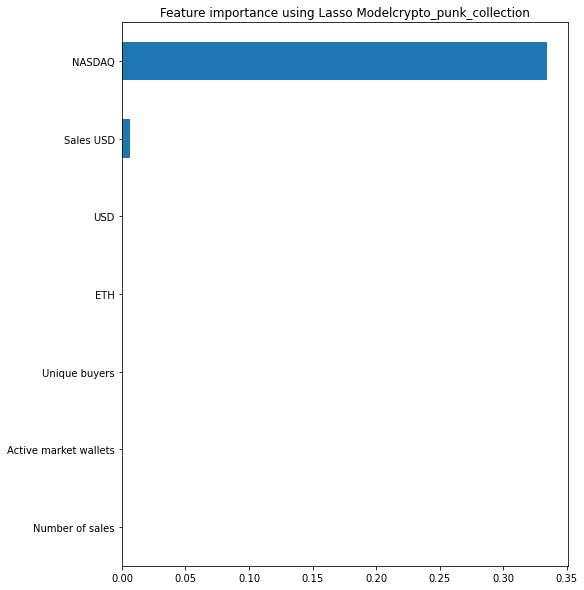

Best alpha using built-in LassoCV: 24730672.869693
Best score using built-in LassoCV: -0.774340
10113.547094993695
Lasso picked 1 variables and eliminated the other 6 variables


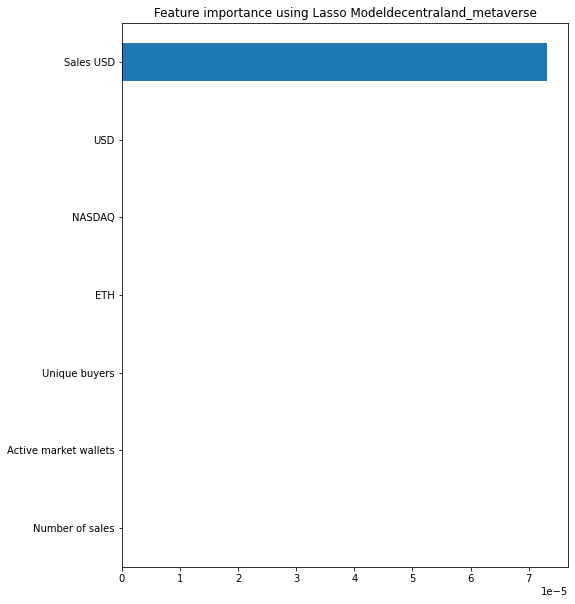

Best alpha using built-in LassoCV: 681846.130256
Best score using built-in LassoCV: 0.342952
32090.077893385675
Lasso picked 2 variables and eliminated the other 5 variables


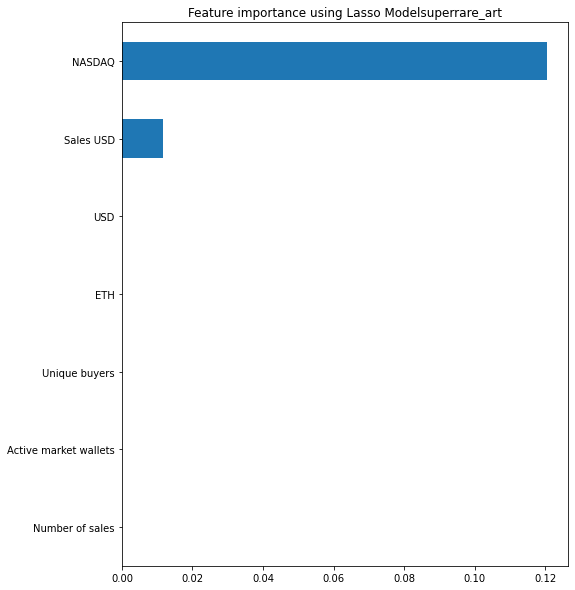

Best alpha using built-in LassoCV: 122346.608708
Best score using built-in LassoCV: -1.328590
6776.470851806446
Lasso picked 3 variables and eliminated the other 4 variables


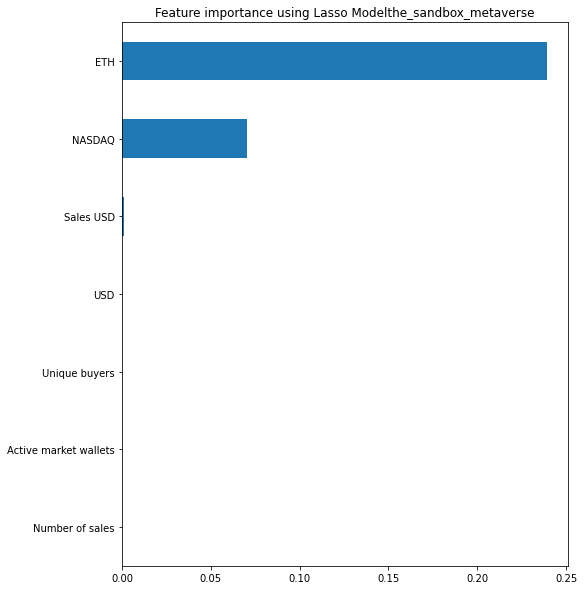

In [26]:

'''
출처 : https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
'''
# model_Lasso = []
# Y_Lasso_pred = []
# alpha = [0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]
# for i in range(n):
#   model_Lasso.append([])
#   Y_Lasso_pred.append([])
#   for j in range(len(alpha)):
#     model_Lasso[i].append(Lasso(alpha = alpha[j]))
#     model_Lasso[i][j].fit(X_train_stdscaled[i],Y_train_stdscaled[i])
#     Y_Lasso_pred[i].append(model_Lasso[i][j].predict(X_test_stdscaled[i]))
e_Y_pred_Lasso = []
e_Y_pred_Lasso_train=[]
for i in range(n):
  reg = LassoCV()
  reg.fit(e_X_train[i],e_Y_train[i])
  print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
  print("Best score using built-in LassoCV: %f" %reg.score(e_X_test[i],e_Y_test[i]))
  print(np.sqrt(mean_squared_error(e_Y_test[i],reg.predict(e_X_test[i]))))
  coef = pd.Series(reg.coef_, index = e_X_test[i].columns)
  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  imp_coef = coef.sort_values()
  matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using Lasso Model"+urllist_name[i])
  plt.show()
  pred = reg.predict(e_X_test[i])
  pred2 = reg.predict(e_X_train[i])
  e_Y_pred_Lasso.append(pd.DataFrame(pred, columns=e_Y_test[i].columns, index=list(e_Y_test[i].index.values)))
  e_Y_pred_Lasso_train.append(pd.DataFrame(pred2, columns=e_Y_train[i].columns, index=list(e_Y_train[i].index.values)))

In [28]:
# for i in range(n):
#   a = Y_train[i].copy()
#   b = Y_test[i].copy()
#   inversed_Y = std_extended_scaler[i].inverse_transform(e_X_test[i].join(e_Y_pred_Lasso[i]))
#   inversed_Y_train = std_extended_scaler[i].inverse_transform(e_X_train[i].join(e_Y_pred_Lasso_train[i]))
#   print(inversed_Y_train)
#   result = pd.DataFrame(inversed_Y[:,[4]], columns=e_Y_pred_Lasso[i].columns, index=list(e_Y_pred_Lasso[i].index.values))
#   result2 = pd.DataFrame(inversed_Y_train[:,[4]], columns=e_Y_pred_Lasso_train[i].columns, index=list(e_Y_pred_Lasso_train[i].index.values))
#   print(result2)
#   fig, ax = plt.subplots(figsize=(20,18))
#   print('RMSE:',np.sqrt(mean_squared_error(Y_test[i],result)))
#   print('Coefficient of Determination:',r2_score(Y_test[i],result))
#   ax.plot(a,label='train actual value',color='g')
#   ax.plot(b,label='test actual value',color='r')
#   ax.plot(result,label='test prediction',color='b')
#   ax.plot(result2,label='train prediction',color='orange')
#   plt.xticks(range(0,len(original_dataset[i].index),len(original_dataset[i].index)//10))
#   plt.legend()
#   plt.title(urllist_name[i])
#   plt.show()

In [29]:
#train and test for EMA
from sklearn.model_selection import train_test_split
train_X_EMA = []
test_X_EMA = []
train_Y_EMA = []
test_Y_EMA = []
for i in range(n):
  # train_EMA_x, test_EMA_x,train_EMA_y,test_EMA_y = train_test_split(ema_dataset[i].drop(columns=['Ema']),ema_dataset[i][['Ema']],test_size=0.2, random_state=42)
  train_EMA_x, test_EMA_x,train_EMA_y,test_EMA_y = train_test_split(ema_dataset[i].drop(columns=['Ema']),ema_dataset[i][['Ema']],test_size=0.25, shuffle=False)
  train_X_EMA.append(train_EMA_x.sort_index())
  test_X_EMA.append(test_EMA_x.sort_index())
  train_Y_EMA.append(train_EMA_y.sort_index())
  test_Y_EMA.append(test_EMA_y.sort_index())
  



In [30]:
for i in range(n):
  print(i)
  print(ema_dataset[i])
  print(train_X_EMA[i])
  print(test_X_EMA[i])
  print(train_Y_EMA[i])
  print(test_Y_EMA[i])

0
            Number of sales  Sales USD  Active market wallets  Unique buyers  \
2020-12-07            131.0    2745.26                   23.0           21.0   
2020-12-08             53.0     971.82                   15.0           13.0   
2020-12-09            120.0    2647.83                   25.0           21.0   
2020-12-10            233.0    4300.51                   32.0           29.0   
2020-12-11             90.0    1711.63                   19.0           16.0   
...                     ...        ...                    ...            ...   
2022-05-11             70.0  194489.85                   94.0           36.0   
2022-05-12            103.0  787384.88                  130.0           66.0   
2022-05-13            236.0  406283.95                  280.0          135.0   
2022-05-14            133.0  131262.68                  170.0           75.0   
2022-05-15            190.0  245566.45                  177.0           93.0   

                ETH    NASDAQ     USD

Best alpha using built-in LassoCV: 678526102.898727
Best score using built-in LassoCV: 0.028498
934.3928054105266
[-0.          0.00022907  0.          0.          0.          0.
  0.        ]
Lasso picked 1 variables and eliminated the other 6 variables


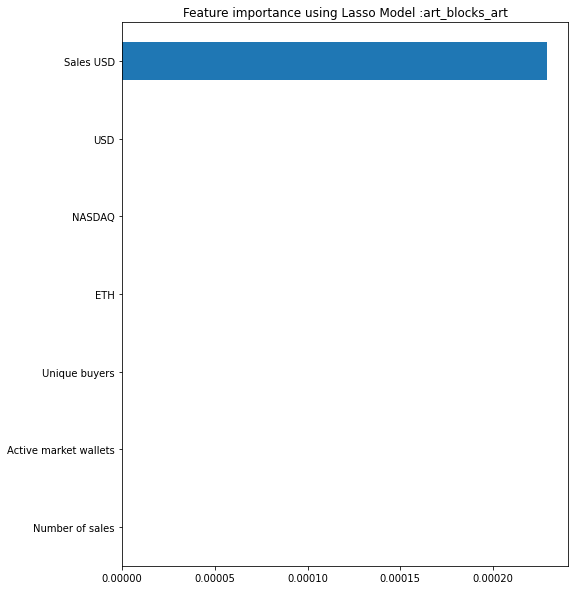

Best alpha using built-in LassoCV: 10753.052293
Best score using built-in LassoCV: -12027.379186
10465.256472109817
[-0.          0.00076379 -0.         -0.          0.05624176  0.01022362
 -0.        ]
Lasso picked 3 variables and eliminated the other 4 variables


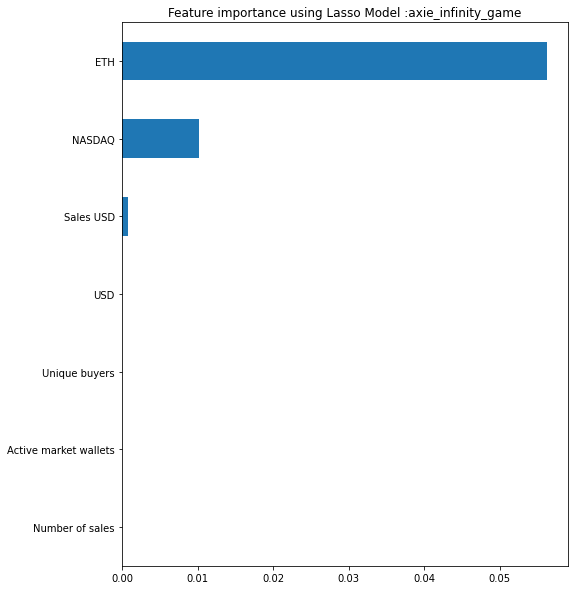

Best alpha using built-in LassoCV: 148280522025.925262
Best score using built-in LassoCV: -12.538062
48971.13952094714
[0.0000000e+00 4.5856804e-19 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]
Lasso picked 1 variables and eliminated the other 6 variables


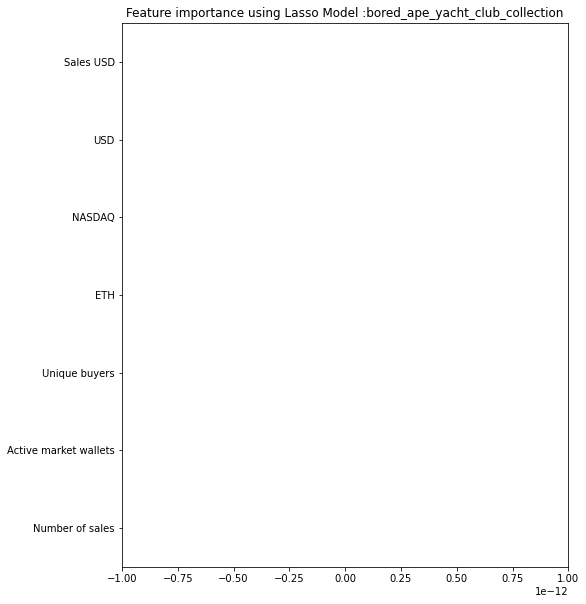

Best alpha using built-in LassoCV: 229698046.946668
Best score using built-in LassoCV: -42.105780
1195.1651511084713
[ 0.00000000e+00  7.58608413e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00]
Lasso picked 1 variables and eliminated the other 6 variables


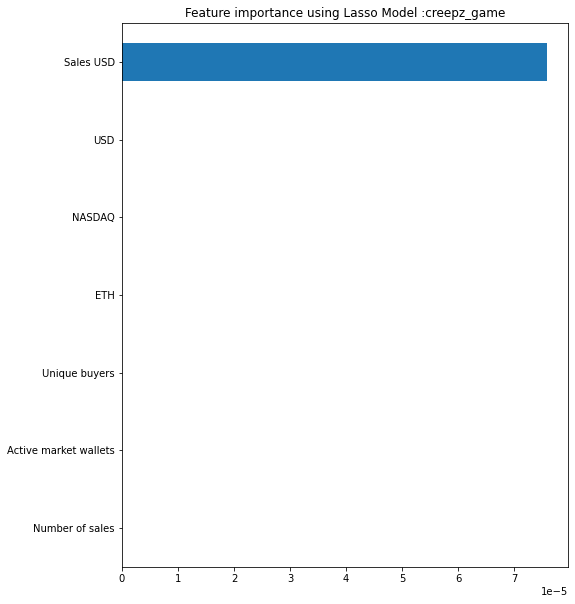

Best alpha using built-in LassoCV: 1919693.702681
Best score using built-in LassoCV: -1.633207
253331.11978357178
[ 0.          0.0044357   0.          0.          0.          0.32366382
 -0.        ]
Lasso picked 2 variables and eliminated the other 5 variables


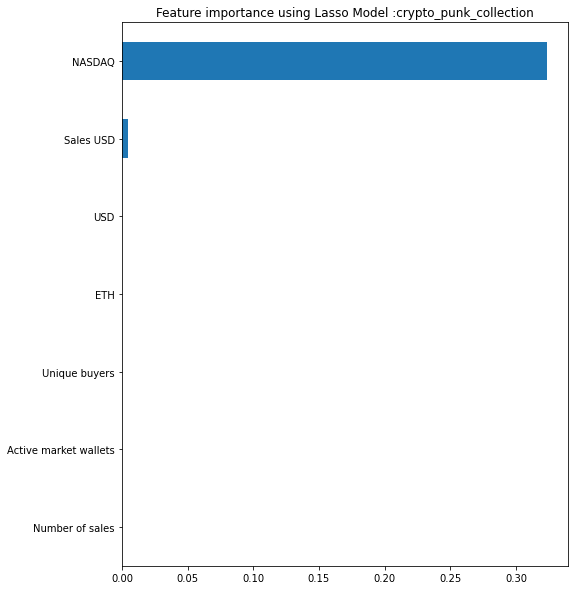

Best alpha using built-in LassoCV: 11017003.863772
Best score using built-in LassoCV: -1.445890
8496.694388611728
[-0.          0.00029282 -0.         -0.          0.         -0.
 -0.        ]
Lasso picked 1 variables and eliminated the other 6 variables


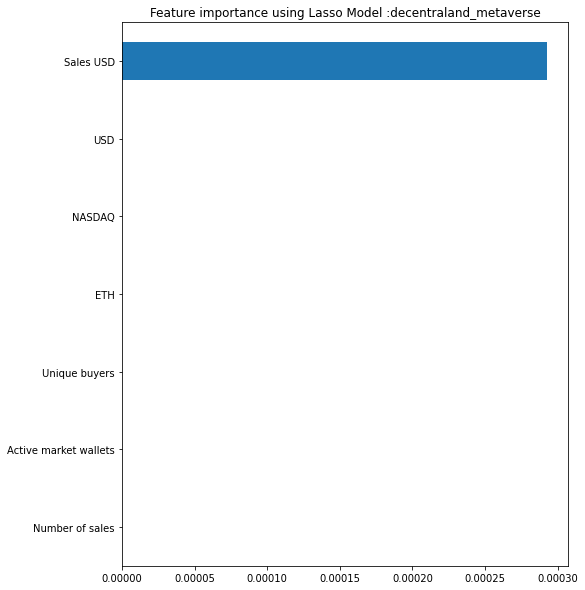

Best alpha using built-in LassoCV: 591216.658095
Best score using built-in LassoCV: -0.466295
19115.81009519403
[-0.          0.00822012 -0.         -0.          0.          0.31758821
 -0.        ]
Lasso picked 2 variables and eliminated the other 5 variables


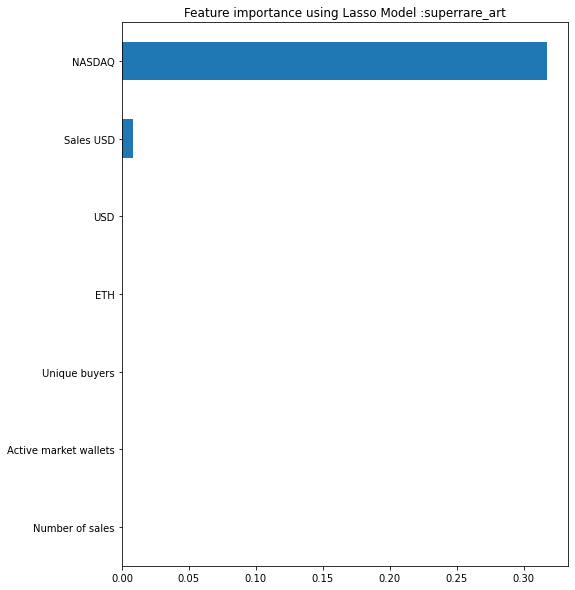

Best alpha using built-in LassoCV: 77729.187621
Best score using built-in LassoCV: -2.765895
8113.0025747702375
[-0.          0.00041795 -0.         -0.          0.38942614  0.04827598
  0.        ]
Lasso picked 3 variables and eliminated the other 4 variables


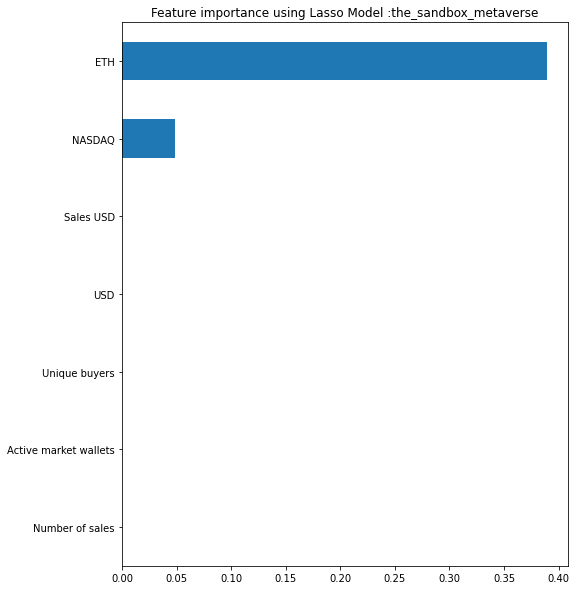

In [31]:
#linear regression
warnings.filterwarnings('ignore')
EMA_Y_pred_Lasso = []
for i in range(n):
  reg = LassoCV()
  reg.fit(train_X_EMA[i],train_Y_EMA[i])
  print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
  print("Best score using built-in LassoCV: %f" %reg.score(test_X_EMA[i],test_Y_EMA[i]))
  print(np.sqrt(mean_squared_error(test_Y_EMA[i],reg.predict(test_X_EMA[i]))))
  print(reg.coef_)
  coef = pd.Series(reg.coef_, index = test_X_EMA[i].columns)
  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  imp_coef = coef.sort_values()
  matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using Lasso Model :"+urllist_name[i])
  plt.show()
  pred = reg.predict(test_X_EMA[i])
  EMA_Y_pred_Lasso.append(pd.DataFrame(pred, columns=test_Y_EMA[i].columns, index=list(test_Y_EMA[i].index.values)))

In [32]:
#std scaler for EMA
std_ema_dataset = []
std_ema_scaler = []
for i in range(n):
  scaler = StandardScaler()
  std = scaler.fit_transform(ema_dataset[i])
  std_ema_dataset.append(pd.DataFrame(std,columns=ema_dataset[i].columns,index=list(ema_dataset[i].index.values)))
  std_ema_scaler.append(scaler)

std_train_X_EMA = []
std_test_X_EMA = []
std_train_Y_EMA = []
std_test_Y_EMA = []
for i in range(n):
  # train_EMA_x, test_EMA_x,train_EMA_y,test_EMA_y = train_test_split(std_ema_dataset[i].drop(columns=['Ema']),std_ema_dataset[i][['Ema']],test_size=0.2, random_state=42)
  train_EMA_x, test_EMA_x,train_EMA_y,test_EMA_y = train_test_split(ema_dataset[i].drop(columns=['Ema']),ema_dataset[i][['Ema']],test_size=0.25, shuffle=False)
  std_train_X_EMA.append(train_EMA_x.sort_index())
  std_test_X_EMA.append(test_EMA_x.sort_index())
  std_train_Y_EMA.append(train_EMA_y.sort_index())
  std_test_Y_EMA.append(test_EMA_y.sort_index())

In [33]:
#lienar regression + Lasso
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
# std_EMA_Y_pred_Lasso = []
# for i in range(n):
#   EMA_reg = LassoCV()
#   EMA_reg.fit(std_train_X_EMA[0],std_train_Y_EMA[i])
#   print("Best alpha using built-in LassoCV: %f" %EMA_reg.alpha_)
#   print("Best score using built-in LassoCV: %f" %EMA_reg.score(std_test_X_EMA[i],std_test_Y_EMA[i]))
#   print(np.sqrt(mean_squared_error(std_test_Y_EMA[i],EMA_reg.predict(std_test_X_EMA[i]))))
#   print(EMA_reg.coef_)
#   coef = pd.Series(EMA_reg.coef_, index = std_test_X_EMA[i].columns)
#   print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#   imp_coef = coef.sort_values()
#   matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
#   imp_coef.plot(kind = "barh")
#   plt.title("Feature importance using Lasso Model : EMA "+urllist_name[i])
#   plt.show()
#   pred = EMA_reg.predict(std_test_X_EMA[i])
#   std_EMA_Y_pred_Lasso.append(pd.DataFrame(pred, columns=std_test_Y_EMA[i].columns, index=list(std_test_Y_EMA[i].index.values)))

In [34]:

# inversed_EMA_Y = e.inverse_transform(EMA_y_predict)
# result = pd.DataFrame(inversed_EMA_Y, columns=EMA_Y_test[0].columns, index=list(EMA_Y_test[0].index.values))
# print(result)
# print(test_set_EMA[0][['Ema']])
# result.rename(columns = {'Ema' : 'predict_Ema'}, inplace = True)
# for_figure=result.join(test_set_EMA[0][['Ema']], how='inner')
# print(for_figure)
# for_figure.plot.line()